#Visualizaciones - Mercado del Cine en EEUU - MCU
Autor: Martin Nicolas Serafini


In [1]:
import pandas as pd # Librería de alto nivel para manipulación y análisis de datos, ideal para trabajar con DataFrames.
import numpy as np # Librería para realizar operaciones numéricas y matemáticas complejas sobre arrays y matrices.
import matplotlib.pyplot as plt # Una librería para crear gráficos estáticos, animados e interactivos.
import matplotlib.ticker as mticker # Permite un control preciso sobre la posición y el formato de las marcas (ticks) en los ejes de un gráfico.
import datetime as dt # Módulo para manejar fechas y horas de manera eficiente.
import seaborn as sns # Una librería de visualización de datos estadísticos basada en Matplotlib, que simplifica la creación de gráficos atractivos e informativos.
import plotly.express as px # Una librería de visualización de alto nivel y fácil de usar para crear gráficos interactivos.
import plotly.graph_objects as go # Una librería de visualización de bajo nivel que ofrece un control detallado sobre los elementos de un gráfico interactivo.
from google.colab import drive # Se utiliza para montar Google Drive y acceder a archivos desde un entorno de Google Colab.
from matplotlib.patches import Patch # Clase para crear parches o formas geométricas simples que se pueden agregar a un gráfico.
from matplotlib.ticker import MultipleLocator # Clase para establecer la ubicación de las marcas a un múltiplo fijo de un valor base.
from matplotlib.ticker import MaxNLocator
from datetime import timedelta
import matplotlib.patches as mpatches # Módulo que contiene varios tipos de parches para crear elementos gráficos personalizados.
from matplotlib.lines import Line2D # Clase para crear líneas que se pueden añadir a un gráfico, a menudo usadas en leyendas personalizadas.
import os # Módulo para interactuar con el sistema operativo, como la gestión de rutas de archivos.
import re # El módulo de expresiones regulares, utilizado para la búsqueda de patrones y manipulación de texto.
import math # Módulo que provee funciones y constantes matemáticas.

In [2]:
# Monto Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## *EEUU - Analisis del Mercado*

### Variacion Precio Promedio Entradas, Cantidad de Tickets Vendidos, Ingreso Medio Hogareño, IPC
* Dato: Tickets vendidos
  * Formato: CSV
  * Fuente:
  * Metodo: Scrapping
* Dato: Precio Promedio Entradas
  * Formato: CSV
  * Fuente:
  * Metodo: Scrapping
* Dato: Ingresos Medios Hogareños
  * Formato: CSV
  * Fuente:
  * Metodo: Scrapping
* Dato: IPC
  * Formato: CSV
  * Fuente:
  * Metodo: Scrapping



In [3]:
# --------------------
# - Carga de Datasets
# --------------------
dfticketsvendidos1995_2025 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_TicketsVendidos1995_2025.csv')
dfindicesanuales1977_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_IndicesAnuales1977_2024.csv')
dfingresoshogares1989_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/Downloaded_Real Median Household Income in the United States 1989_2024 (MEHOINUSA672N).csv')

In [4]:
dfticketsvendidos1995_2024 = dfticketsvendidos1995_2025[(dfticketsvendidos1995_2025['Year'] >= 1995) & (dfticketsvendidos1995_2025['Year'] <= 2024)].copy()
dfticketsvendidos1995_2024 = dfticketsvendidos1995_2024.sort_values(by='Year', ascending=True)
dfindicesanuales1995_2024 = dfindicesanuales1977_2024[(dfindicesanuales1977_2024['year'] >= 1995) & (dfindicesanuales1977_2024['year'] <= 2024)].copy()

dfingresoshogares1989_2024['observation_date'] = pd.to_datetime(dfingresoshogares1989_2024['observation_date']).dt.year
dfingresoshogares1995_2024 = dfingresoshogares1989_2024[(dfingresoshogares1989_2024['observation_date'] >= 1995) & (dfingresoshogares1989_2024['observation_date'] <= 2024)].copy()

In [5]:
# Valores Base desde el Año 1995
base_avg_ticket_price = dfticketsvendidos1995_2024.loc[dfticketsvendidos1995_2024['Year'] == 1995, 'Average Ticket Price'].iloc[0]
base_tickets_sold = dfticketsvendidos1995_2024.loc[dfticketsvendidos1995_2024['Year'] == 1995, 'Tickets Sold'].iloc[0]
base_ipc = dfindicesanuales1995_2024.loc[dfindicesanuales1995_2024['year'] == 1995, 'IPC Todos los ítemes (promedio 1982-1984=100)'].iloc[0]
base_income = dfingresoshogares1995_2024.loc[dfingresoshogares1995_2024['observation_date'] == 1995, 'MEHOINUSA672N'].iloc[0]

# Calculo la variacion porcentual de 'Average Ticket Price' y 'Tickets Sold' con base 1995
dfticketsvendidos1995_2024['Avg_Ticket_Price_Change'] = ((dfticketsvendidos1995_2024['Average Ticket Price'] - base_avg_ticket_price) / base_avg_ticket_price) * 100
dfticketsvendidos1995_2024['Tickets_Sold_Change'] = ((dfticketsvendidos1995_2024['Tickets Sold'] - base_tickets_sold) / base_tickets_sold) * 100
dfindicesanuales1995_2024['IPC_Change'] = ((dfindicesanuales1995_2024['IPC Todos los ítemes (promedio 1982-1984=100)'] - base_ipc) / base_ipc) * 100
dfingresoshogares1995_2024['Income_Change'] = ((dfingresoshogares1995_2024['MEHOINUSA672N'] - base_income) / base_income) * 100

# Seteo la variacion del primer año (1995) en 0
dfticketsvendidos1995_2024.loc[dfticketsvendidos1995_2024['Year'] == 1995, 'Avg_Ticket_Price_Change'] = 0
dfticketsvendidos1995_2024.loc[dfticketsvendidos1995_2024['Year'] == 1995, 'Tickets_Sold_Change'] = 0
dfindicesanuales1995_2024.loc[dfindicesanuales1995_2024['year'] == 1995, 'IPC_Change'] = 0
dfingresoshogares1995_2024.loc[dfingresoshogares1995_2024['observation_date'] == 1995, 'Income_Change'] = 0

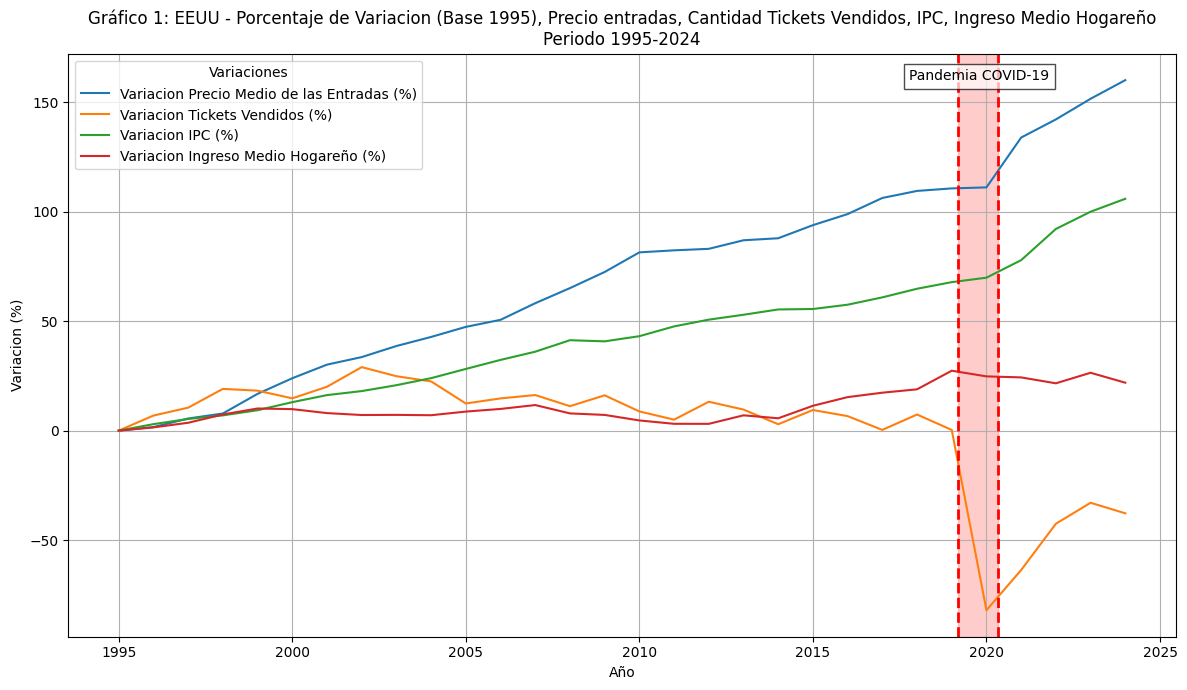

In [6]:
# ----------------------------
# - Combinacion de DataFrames
# ----------------------------

merged_df = dfticketsvendidos1995_2024[['Year', 'Avg_Ticket_Price_Change', 'Tickets_Sold_Change']].merge(
    dfindicesanuales1995_2024[['year', 'IPC_Change']], left_on='Year', right_on='year'
).merge(
    dfingresoshogares1995_2024[['observation_date', 'Income_Change']], left_on='Year', right_on='observation_date'
).drop(columns=['year', 'observation_date'])

# El metodo melt() convierte columnas específicas de un DataFrame en filas
df_long_mpl = merged_df.melt(id_vars=['Year'],
                             value_vars=['Avg_Ticket_Price_Change', 'Tickets_Sold_Change', 'IPC_Change', 'Income_Change'],
                             var_name='Variable',
                             value_name='Percentage Change')

# Renombro las columnas para que en los graficos se muestren en castellano de manera mas simple
df_long_mpl['Variable'] = df_long_mpl['Variable'].replace({
    'Avg_Ticket_Price_Change': 'Variacion Precio Medio de las Entradas (%)',
    'Tickets_Sold_Change': 'Variacion Tickets Vendidos (%)',
    'IPC_Change': 'Variacion IPC (%)',
    'Income_Change': 'Variacion Ingreso Medio Hogareño (%)'
})

plt.figure(figsize=(12, 7))

sns.lineplot(data=df_long_mpl, x='Year', y='Percentage Change', hue='Variable')

# Sombreo el area para mostrar el periodo afectado por la pandemia COVID-19
plt.axvline(x=2019 + (2)/12, color='red', linestyle='--', lw=2)
plt.axvline(x=2020 + (4)/12, color='red', linestyle='--', lw=2)
plt.axvspan(2019 + (2)/12, 2020 + (4)/12, color='red', alpha=0.2)
plt.text(2019 + (2)/12 + (2020 + (4)/12 - (2019 + (2-1)/12)) / 2, 160, 'Pandemia COVID-19',
         horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.title('Gráfico 1: EEUU - Porcentaje de Variacion (Base 1995), Precio entradas, Cantidad Tickets Vendidos, IPC, Ingreso Medio Hogareño\nPeriodo 1995-2024')
plt.xlabel('Año')
plt.ylabel('Variacion (%)')
plt.grid(True)
plt.legend(title='Variaciones')

plt.tight_layout()

plt.show()

### Evolucion de la Cantidad de entradas vendidas por habitante
* Dato: Evolucion de la poblacion de EEUU
  * Formato: CSV
  * Fuente: https://datos.bancomundial.org/


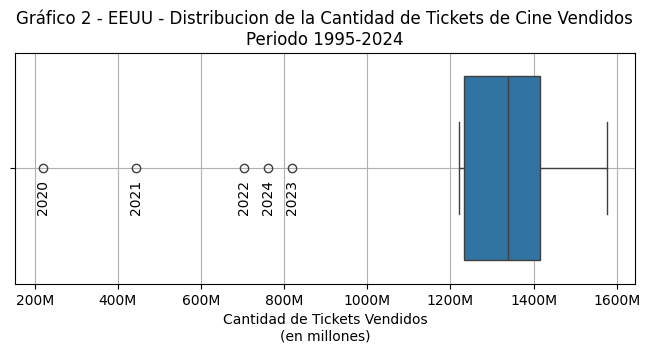

In [7]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=dfticketsvendidos1995_2024, x='Tickets Sold') # Changed y to x for horizontal orientation

plt.title('Gráfico 2 - EEUU - Distribucion de la Cantidad de Tickets de Cine Vendidos\nPeriodo 1995-2024')
plt.xlabel('Cantidad de Tickets Vendidos\n(en millones)') # Changed ylabel to xlabel and added Millions
plt.grid(True)

# Identifico cuartiles y IQR
Q1 = dfticketsvendidos1995_2024['Tickets Sold'].quantile(0.25)
Q3 = dfticketsvendidos1995_2024['Tickets Sold'].quantile(0.75)
IQR = Q3 - Q1

# Defino limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico los outliers
outliers = dfticketsvendidos1995_2024[(dfticketsvendidos1995_2024['Tickets Sold'] < lower_bound) | (dfticketsvendidos1995_2024['Tickets Sold'] > upper_bound)]

# Agrego una anotacion a cada outlier
for index, row in outliers.iterrows():
    plt.text(row['Tickets Sold'], 0.20, str(int(row['Year'])), ha='center', va='bottom', rotation=90) # Converted year to int before converting to string

# Formato de la graduacion de los ejes
formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [8]:
df_population_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/Downloaded_API_SP.POP.TOTL_DS2_es_csv_v2_21827.csv', skiprows=4)

In [9]:
# -----------------------------
# - Filtro informacion de EEUU
# -----------------------------

df_filtered_us = df_population_raw[df_population_raw['Country Name'] == 'Estados Unidos'].copy()
display(df_filtered_us)

Country Name Country Code    Indicator Name Indicator Code  \
251  Estados Unidos          USA  Población, total    SP.POP.TOTL   

            1960         1961         1962         1963         1964  \
251  180671000.0  183691000.0  186538000.0  189242000.0  191889000.0   

            1965  ...         2016         2017         2018         2019  \
251  194303000.0  ...  324353340.0  326608609.0  328529577.0  330226227.0   

            2020         2021         2022         2023         2024  \
251  331577720.0  332099760.0  334017321.0  336806231.0  340110988.0   

     Unnamed: 69  
251          NaN  

[1 rows x 70 columns]

In [10]:
# -----------------------------------------
# - Transpongo los datos del slice de EEUU
# -----------------------------------------

df_population_transposed = df_filtered_us.T
df_population_transposed = df_population_transposed.reset_index()
df_population_transposed.columns = ['Year', 'Population']
df_population_transposed = df_population_transposed.iloc[1:].copy()
display(df_population_transposed.head())

Year        Population
1    Country Code               USA
2  Indicator Name  Población, total
3  Indicator Code       SP.POP.TOTL
4            1960       180671000.0
5            1961       183691000.0

In [11]:
# ----------------------------------------------
# - Corrijo formatos / segmento rango de fechas
# ----------------------------------------------

df_population_transposed['Year'] = pd.to_numeric(df_population_transposed['Year'], errors='coerce')
df_population_transposed = df_population_transposed.dropna(subset=['Year'])
df_population_transposed['Year'] = df_population_transposed['Year'].astype(int)

df_population_transposed['Population'] = pd.to_numeric(df_population_transposed['Population'], errors='coerce')
df_population_transposed = df_population_transposed.dropna(subset=['Population'])

dfpopulation1995_2024 = df_population_transposed[(df_population_transposed['Year'] >= 1995) & (df_population_transposed['Year'] <= 2024)].copy()

In [12]:
# Reseteo los indices
dfpopulation1995_2024.reset_index(drop=True, inplace=True)

In [13]:
# Ordeno los DF por año para evitar discrepancias
dfticketsvendidos1995_2024 = dfticketsvendidos1995_2024.sort_values(by='Year').reset_index(drop=True)
dfpopulation1995_2024 = dfpopulation1995_2024.sort_values(by='Year').reset_index(drop=True)

# Cequeo que coincidan
if not dfticketsvendidos1995_2024['Year'].equals(dfpopulation1995_2024['Year']):
    print("Los datos de la columna Years en dfticketsvendidos1995_2024 y dfpopulation1995_2024 no coinciden. Revisar los datos.")
else:
    # Calculo 'Entradas por Habitante'
    entradas_por_habitante = dfticketsvendidos1995_2024['Tickets Sold'] / dfpopulation1995_2024['Population']

    # Creo un nuevo DF
    dfentradasporhabitante1995_2024 = pd.DataFrame({
        'Año': dfticketsvendidos1995_2024['Year'],
        'Entradas por Habitante': entradas_por_habitante
    })

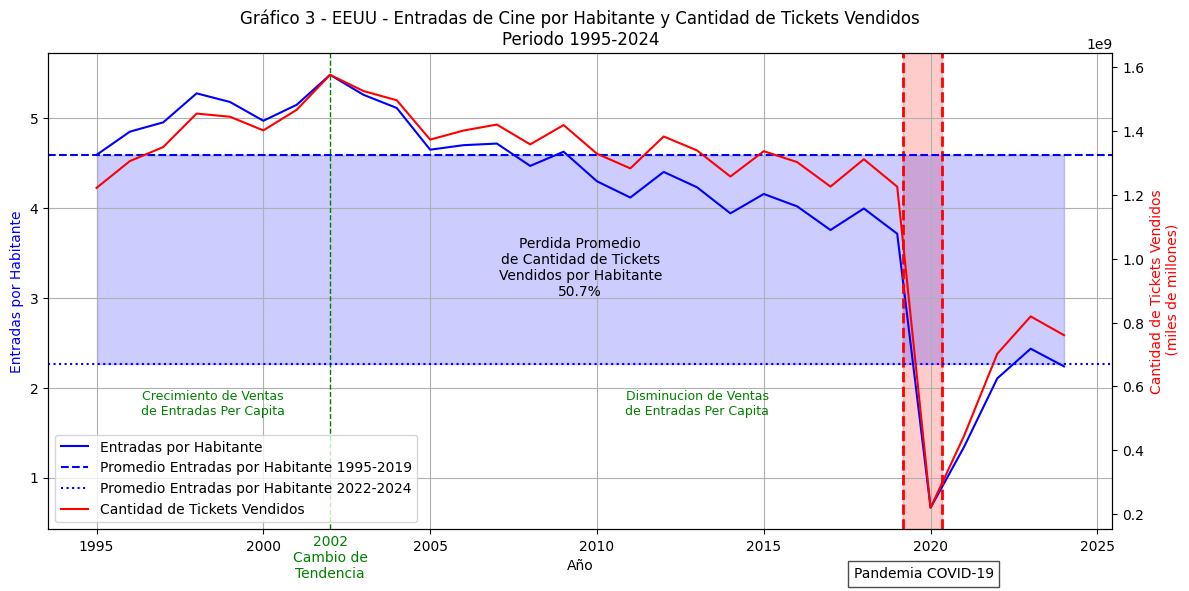

In [14]:
# Creo una figura con un eje y secundario
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Grafica 'Entradas por Habitante'  en el eje y principal
sns.lineplot(data=dfentradasporhabitante1995_2024, x='Año', y='Entradas por Habitante', ax=ax1, label='Entradas por Habitante', color='blue', legend=False)

# Grafica 'Tickets Sold' en el eje y secundario
sns.lineplot(data=dfticketsvendidos1995_2024, x='Year', y='Tickets Sold', ax=ax2, label='Cantidad de Tickets Vendidos', color='red', legend=False)

ax1.set_title('Gráfico 3 - EEUU - Entradas de Cine por Habitante y Cantidad de Tickets Vendidos\nPeriodo 1995-2024')
ax1.set_xlabel('Año')
ax1.set_ylabel('Entradas por Habitante', color='blue')
ax2.set_ylabel('Cantidad de Tickets Vendidos\n (miles de millones)', color='red')

ax1.grid(True)

# Resalto el area para mostrar el periodo afectado por la pandemia COVID-19
ax1.axvline(x=2019 + (2)/12, color='red', linestyle='--', lw=2)
ax1.axvline(x=2020 + (4)/12, color='red', linestyle='--', lw=2)
ax1.axvspan(2019 + (2)/12, 2020 + (4)/12, color='red', alpha=0.2)

ax1.axvline(x=2002, color='green', linestyle='--', lw=1)


# Anotaciones de fechas relevantes
plt.text(2019 + (2)/12 + (2020 + (4)/12 - (2019 + (2-1)/12)) / 2, ax1.get_ylim()[1] * 0.9, 'Pandemia COVID-19',
         horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.text(2002, ax1.get_ylim()[1] * 1.9, '2002\nCambio de\nTendencia',
         horizontalalignment='center', fontsize=10, color='green')
ax1.text(((1995+2002) / 2), 1.7, 'Crecimiento de Ventas\nde Entradas Per Capita',horizontalalignment='center', fontsize=9,color ='green')
ax1.text(((2002+2024) / 2), 1.7, 'Disminucion de Ventas\nde Entradas Per Capita',horizontalalignment='center', fontsize=9,color ='green')

# Calculo el promedio de 'Entradas por Habitante' de 1995-2019 y 2022-2024
avg_entradas_1995_2019 = dfentradasporhabitante1995_2024[(dfentradasporhabitante1995_2024['Año'] >= 1995) & (dfentradasporhabitante1995_2024['Año'] <= 2019)]['Entradas por Habitante'].mean()
avg_entradas_2022_2024 = dfentradasporhabitante1995_2024[(dfentradasporhabitante1995_2024['Año'] >= 2022) & (dfentradasporhabitante1995_2024['Año'] <= 2024)]['Entradas por Habitante'].mean()

# Agrego lineas horizontales para graficarlos
ax1.axhline(y=avg_entradas_1995_2019, color='blue', linestyle='--', lw=1.5, label='Promedio Entradas por Habitante 1995-2019')
ax1.axhline(y=avg_entradas_2022_2024, color='blue', linestyle=':', lw=1.5, label='Promedio Entradas por Habitante 2022-2024')

# Sombreo el area intermedia
ax1.fill_between(dfentradasporhabitante1995_2024['Año'], avg_entradas_1995_2019, avg_entradas_2022_2024, color='blue', alpha=0.2)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower left')
texto_grafico = f'Perdida Promedio\nde Cantidad de Tickets\nVendidos por Habitante\n{((avg_entradas_1995_2019-avg_entradas_2022_2024)/avg_entradas_1995_2019)*100:.1f}%'
ax2.text(0.5, 0.55, texto_grafico, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
plt.tight_layout()
plt.show()

### Evolucion de la Taquilla del Cine (Ajustada por Inflación)

In [15]:
dfrankingcine200_1977_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_RankingCine200.csv')
dfrankingcine200_1977_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8849 entries, 0 to 8848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           8849 non-null   int64  
 1   Rank           8849 non-null   int64  
 2   Release Group  8849 non-null   object 
 3   Worldwide      8849 non-null   float64
 4   Domestic       8849 non-null   float64
 5   Foreign        8849 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 414.9+ KB


In [16]:
dfIndicesAnuales1977_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_IndicesAnuales1977_2024.csv')
dfPrecioEntradas1977_2025 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_PrecioEntradas1977_2025.csv')
dfIndicesAnuales1977_2024.info(), dfPrecioEntradas1977_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   year                                                                     48 non-null     int64  
 1   IPC Todos los ítemes (promedio 1982-1984=100)                            48 non-null     float64
 2   IPC Todos los ítemes menos alimentos y energía (promedio 1982-1984=100)  48 non-null     float64
 3   IPP Bienes terminados (promedio 1982=100)                                48 non-null     float64
 4   IPP  Todos los commodities (promedio 1982=100)                           48 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dty

(None, None)

In [17]:
ipc2024 = float(dfIndicesAnuales1977_2024['IPC Todos los ítemes (promedio 1982-1984=100)'].iloc[-1])

In [18]:
# Hago un merge() por la columna Year
dfrankingcine200_1977_2024 = pd.merge(dfrankingcine200_1977_2024, dfPrecioEntradas1977_2025[['Year', 'Price']], on='Year', how='left')

# Calculo 'tickets_sold' dividiendo 'Domestic' y 'Price'
dfrankingcine200_1977_2024['tickets_sold'] = (dfrankingcine200_1977_2024['Domestic'] / dfrankingcine200_1977_2024['Price']).astype(int)


In [19]:
dfrankingcine200_1977_2024 = pd.merge(dfrankingcine200_1977_2024, dfIndicesAnuales1977_2024[['year', 'IPC Todos los ítemes (promedio 1982-1984=100)']], left_on='Year', right_on='year')
dfrankingcine200_1977_2024['coeficiente']=ipc2024/dfrankingcine200_1977_2024['IPC Todos los ítemes (promedio 1982-1984=100)']
dfrankingcine200_1977_2024['Domestic_Inflac']=dfrankingcine200_1977_2024['Domestic']*dfrankingcine200_1977_2024['coeficiente']
dfrankingcine200_1977_2024.drop(columns=['year', 'coeficiente','IPC Todos los ítemes (promedio 1982-1984=100)'], inplace=True)

In [20]:
df = dfrankingcine200_1977_2024.copy()

# Filtro por rango de años
df = df[(df["Year"] >= 1977) & (df["Year"] <= 2024)]

# Ordeno por año y Domestic_Inflac (descendente)
df = df.sort_values(["Year", "Domestic_Inflac"], ascending=[True, False])

# Tomo top 10 por año
dfrankingcine10_1977_2024 = (
    df.groupby("Year")
      .head(10)   # conserva todas las columnas
      .copy()
)

# Creo columna Rank (1 a 10 dentro de cada año)
dfrankingcine10_1977_2024["Rank"] = (
    dfrankingcine10_1977_2024.groupby("Year").cumcount() + 1
)

# Aseguro Rank como int
dfrankingcine10_1977_2024["Rank"] = dfrankingcine10_1977_2024["Rank"].astype(int)


In [21]:
# Agrupo por 'Domestic_Inflac' y 'tickets_sold'
df_total_data_200 = dfrankingcine200_1977_2024.groupby('Year')[['Domestic_Inflac', 'tickets_sold','Domestic']].sum().reset_index()
df_total_data_10 = dfrankingcine10_1977_2024.groupby('Year')[['Domestic_Inflac', 'tickets_sold','Domestic']].sum().reset_index()

In [22]:
dfHomesSusciptedStreaming = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/AI_Generated_%_Homes_with_at_least_1_suscription.csv')

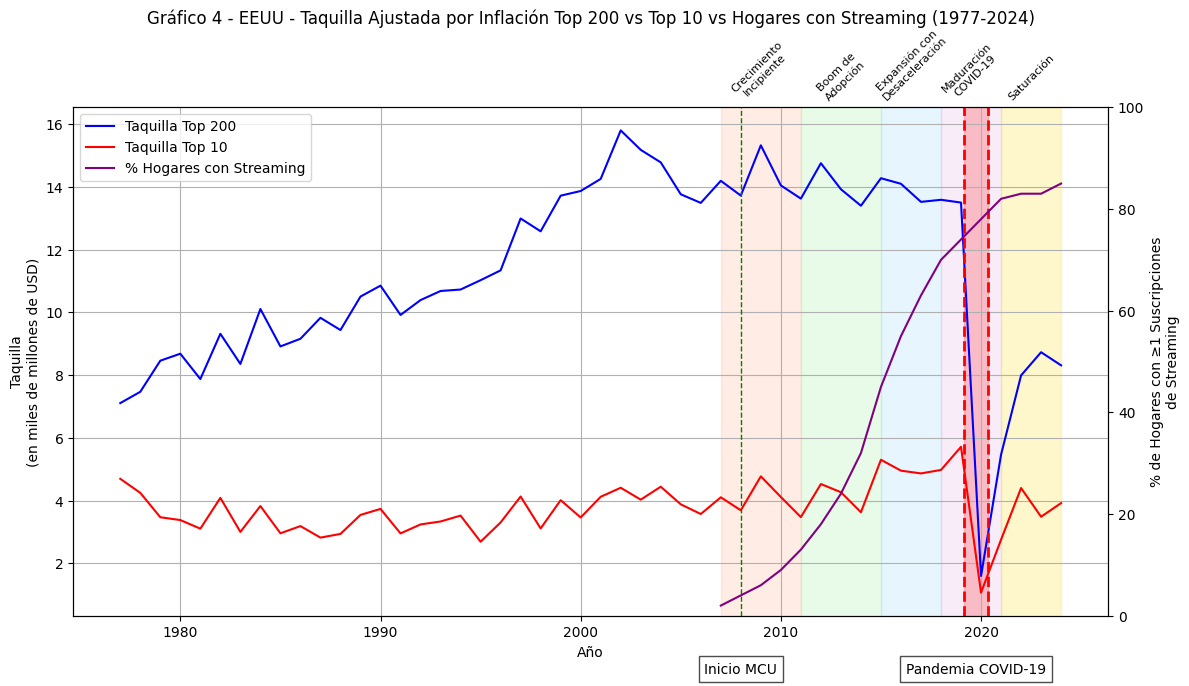

In [23]:
# Colores para los periodos
colores_periodos = ['#FFA07A', '#90EE90', '#87CEFA', '#DDA0DD', '#FFD700']  # puedes cambiar a gusto

periodos = [
    (2007, 2011, "Crecimiento\nIncipiente"),
    (2011, 2015, "Boom de\nAdopción"),
    (2015, 2018, "Expansión con\nDesaceleración"),
    (2018, 2021, "Maduración\nCOVID-19"),
    (2021, 2024, "Saturación"),
]

# --- Figura y ejes ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# --- Taquilla (eje izquierdo) ---
sns.lineplot(data=df_total_data_200, x='Year', y='Domestic_Inflac', ax=ax1, label='Taquilla Top 200', color='blue')
sns.lineplot(data=df_total_data_10, x='Year', y='Domestic_Inflac', ax=ax1, label='Taquilla Top 10', color='red')

ax1.set_title('Gráfico 4 - EEUU - Taquilla Ajustada por Inflación Top 200 vs Top 10 vs Hogares con Streaming (1977-2024)', pad=60)
ax1.set_xlabel('Año')
ax1.set_ylabel('Taquilla\n(en miles de millones de USD)')
ax1.grid(True)

formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e9))
ax1.yaxis.set_major_formatter(formatter)

# --- Streaming (eje derecho) ---
ax2 = ax1.twinx()
sns.lineplot(data=dfHomesSusciptedStreaming, x='Año', y='%_de_hogares', ax=ax2, label='% Hogares con Streaming', color='purple')
ax2.set_ylabel('% de Hogares con ≥1 Suscripciones\nde Streaming')
ax2.set_ylim(0, 100)

# --- Sombreado de periodos ---
for i, (start, end, label) in enumerate(periodos):
    ax1.axvspan(start, end, color=colores_periodos[i], alpha=0.2)
    y_text = ax1.get_ylim()[1] * 1.01  # colocar texto justo arriba del gráfico
    ax1.text((start+end)/2, y_text, label, ha='center', va='bottom', fontsize=8, rotation=45)

# --- Líneas verticales y anotaciones ---
ax1.axvline(x=2008, color='green', linestyle='--', lw=1)
ax1.text(2008, -1500000000, 'Inicio MCU', horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

ax1.axvline(x=2019 + (2)/12, color='red', linestyle='--', lw=2)
ax1.axvline(x=2020 + (4)/12, color='red', linestyle='--', lw=2)
ax1.axvspan(2019 + (2)/12, 2020 + (4)/12, color='red', alpha=0.2)
ax1.text(2019 + (2)/12 + (2020 + (4)/12 - (2019 + (2)/12)) / 2, -1500000000,
         'Pandemia COVID-19', horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# --- Leyendas combinadas ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.legend_.remove()

plt.tight_layout()
plt.show()


In [24]:
df_total_data = pd.merge(df_total_data_200[['Year', 'Domestic_Inflac']],
                         df_total_data_10[['Year', 'Domestic_Inflac']],
                         on='Year',
                         suffixes=('_200', '_10'))

df_total_data = df_total_data.rename(columns={'Domestic_Inflac_200': 'Domestic_Inflac_200',
                                              'Domestic_Inflac_10': 'Domestic_Inflac_10'})

df_total_data['Relevancia_Top_10'] = df_total_data['Domestic_Inflac_10'] / df_total_data['Domestic_Inflac_200']

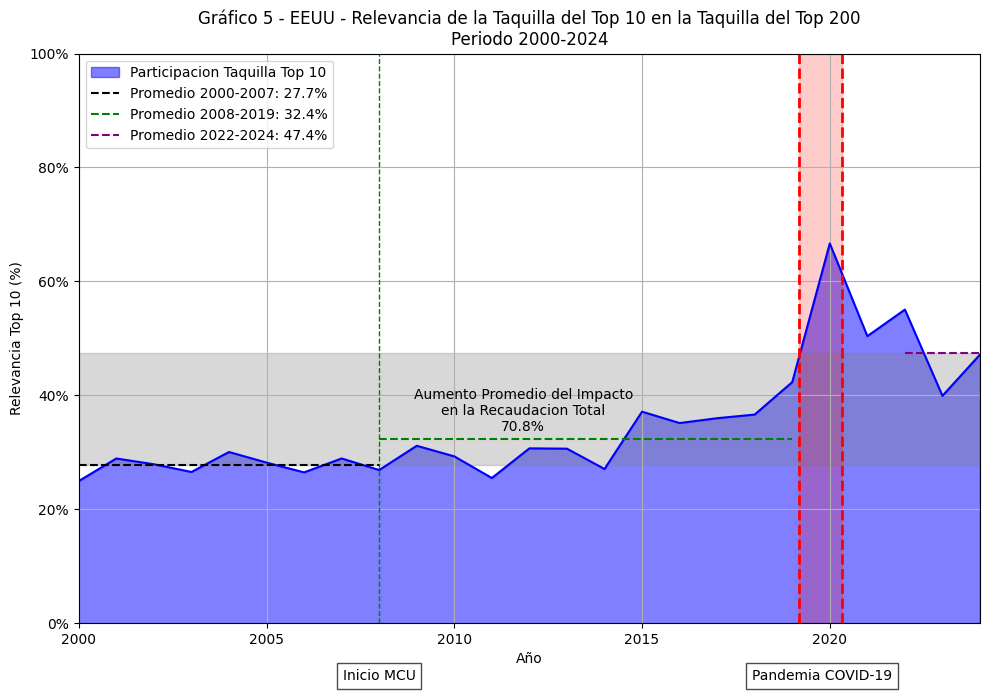

In [25]:
# Filtro datos a partir del 2000
df_filtered = df_total_data[df_total_data['Year'] >= 2000].copy()

# Calcula los promedios de los periodos
avg_relevance_2000_2007 = df_filtered[(df_filtered['Year'] >= 2000) & (df_filtered['Year'] <= 2007)]['Relevancia_Top_10'].mean()
avg_relevance_2008_2019 = df_filtered[(df_filtered['Year'] >= 2008) & (df_filtered['Year'] <= 2019)]['Relevancia_Top_10'].mean()
avg_relevance_2022_2024 = df_filtered[(df_filtered['Year'] >= 2022) & (df_filtered['Year'] <= 2024)]['Relevancia_Top_10'].mean()

# Calculo el minimo y maximo de los promedios para poder sombrear
min_avg_relevance = min(avg_relevance_2000_2007, avg_relevance_2008_2019, avg_relevance_2022_2024)
max_avg_relevance = max(avg_relevance_2000_2007, avg_relevance_2008_2019, avg_relevance_2022_2024)

# Genero el grafico
plt.figure(figsize=(10, 7))
plt.fill_between(df_filtered['Year'], df_filtered['Relevancia_Top_10'], color='blue', alpha=0.5, label='Participacion Taquilla Top 10')
plt.plot(df_filtered['Year'], df_filtered['Relevancia_Top_10'], color='blue') # Agrego una linea en la parte superior del area sombreada

# Lineas con los promedios
plt.hlines(y=avg_relevance_2000_2007, xmin=2000, xmax=2008, color='black', linestyle='--', lw=1.5, label=f'Promedio 2000-2007: {avg_relevance_2000_2007:.1%}')
plt.hlines(y=avg_relevance_2008_2019, xmin=2008, xmax=2019, color='green', linestyle='--', lw=1.5, label=f'Promedio 2008-2019: {avg_relevance_2008_2019:.1%}')
plt.hlines(y=avg_relevance_2022_2024, xmin=2022, xmax=2024, color='purple', linestyle='--', lw=1.5, label=f'Promedio 2022-2024: {avg_relevance_2022_2024:.1%}')

# Sombreado entre los valores minimos y maximos de los promedios
plt.fill_between(df_filtered['Year'], min_avg_relevance, max_avg_relevance, color='gray', alpha=0.3)


# Titulos del grafico y ejes
plt.title('Gráfico 5 - EEUU - Relevancia de la Taquilla del Top 10 en la Taquilla del Top 200\nPeriodo 2000-2024')
plt.xlabel('Año')
plt.ylabel('Relevancia Top 10 (%)')

# Escalas y formato de los ejes
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
plt.ylim(0, 1)
plt.xlim(2000, 2024)

# Grafico referencias
plt.axvline(x=2019 + (2)/12, color='red', linestyle='--', lw=2)
plt.axvline(x=2020 + (4)/12, color='red', linestyle='--', lw=2)
plt.axvspan(2019 + (2)/12, 2020 + (4)/12, color='red', alpha=0.2)
plt.text(2019 + (2)/12 + (2020 + (4)/12 - (2019 + (2-1)/12)) / 2, -0.1, 'Pandemia COVID-19',
         horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.axvline(x=2008, color='green', linestyle='--', lw=1)
plt.text(2008, -0.1, 'Inicio MCU',
         horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

texto_grafico = f'Aumento Promedio del Impacto\nen la Recaudacion Total\n{((max_avg_relevance-min_avg_relevance)/min_avg_relevance)*100:.1f}%'
plt.text(0.43, 0.4, texto_grafico, horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
# Calculo top 5 años por taquilla ajustada
top5_years_revenue = df_total_data_200.nlargest(5, 'Domestic_Inflac').copy()
top5_years_revenue['Domestic_Inflac_Millions'] = top5_years_revenue['Domestic_Inflac'] / 1_000_000

# Calculo top 5 años por tickets vendidos
top5_years_tickets = df_total_data_200.nlargest(5, 'tickets_sold').copy()
top5_years_tickets['tickets_sold_Millions'] = top5_years_tickets['tickets_sold'] / 1_000_000

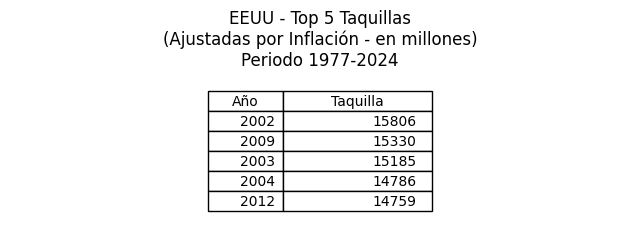

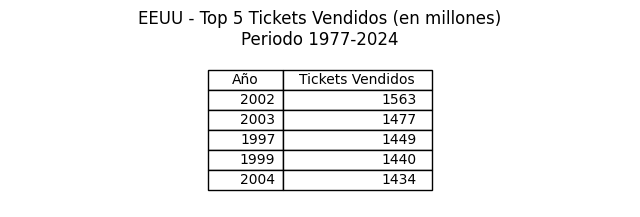

In [27]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
ax.set_title('EEUU - Top 5 Taquillas\n(Ajustadas por Inflación - en millones)\nPeriodo 1977-2024', fontsize=12)

table_revenue = ax.table(cellText=top5_years_revenue[['Year', 'Domestic_Inflac_Millions']].values,
                         colLabels=['Año', 'Taquilla'],
                         loc='center',colWidths=[0.1,0.2])

table_revenue.auto_set_font_size(False)
table_revenue.set_fontsize(10)
table_revenue.scale(1.2, 1.2)

# Formateo para que los muestren enteros
for i in range(len(top5_years_revenue) + 1):
    for j in range(len(top5_years_revenue.columns)):
        if j == 1 and i > 0: # Formato primera columna (excluido encabezado)
            table_revenue[i, j].get_text().set_text(f"{float(table_revenue[i, j].get_text().get_text()):.0f}")
        if j == 0 and i > 0: # Formato 2° columna (excluido encabezado)
            table_revenue[i, j].get_text().set_text(f"{float(table_revenue[i, j].get_text().get_text()):.0f}")


plt.show()

fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
ax.set_title('EEUU - Top 5 Tickets Vendidos (en millones)\nPeriodo 1977-2024', fontsize=12)

table_tickets = ax.table(cellText=top5_years_tickets[['Year', 'tickets_sold_Millions']].values,
                         colLabels=['Año', 'Tickets Vendidos'],
                         loc='center',colWidths=[0.1,0.2])

table_tickets.auto_set_font_size(False)
table_tickets.set_fontsize(10)
table_tickets.scale(1.2, 1.2)

# Formateo para que los muestren enteros
for i in range(len(top5_years_tickets) + 1):
    for j in range(len(top5_years_tickets.columns)):
         if j == 1 and i > 0: # Formato primera columna (excluido encabezado)
            table_tickets[i, j].get_text().set_text(f"{float(table_tickets[i, j].get_text().get_text()):.0f}")
         if j == 0 and i > 0: # Formato 2° columna (excluido encabezado)
            table_tickets[i, j].get_text().set_text(f"{float(table_tickets[i, j].get_text().get_text()):.0f}")


plt.show()

In [28]:
# Calculo el total del top 10
df_top10_yearly_total = dfrankingcine10_1977_2024.groupby('Year')['Domestic_Inflac'].sum().reset_index()
df_top10_yearly_total = df_top10_yearly_total.rename(columns={'Domestic_Inflac': 'Top10_Yearly_Total_Inflac'})

# Filtro años 2000 al 2024
df_top10_yearly_total = df_top10_yearly_total[(df_top10_yearly_total['Year'] >= 2000) & (df_top10_yearly_total['Year'] <= 2024)].copy()

In [29]:
# Calculo el % de contribucion al total del Top 10
df_top10_percentage = pd.merge(dfrankingcine10_1977_2024, df_top10_yearly_total[['Year', 'Top10_Yearly_Total_Inflac']], on='Year', how='left')
df_top10_percentage['Domestic_Inflac_Percentage'] = (df_top10_percentage['Domestic_Inflac'] / df_top10_percentage['Top10_Yearly_Total_Inflac']) * 100

# Filtro años 2000 a 2024
df_top10_percentage = df_top10_percentage[(df_top10_percentage['Year'] >= 2000) & (df_top10_percentage['Year'] <= 2024)].copy()

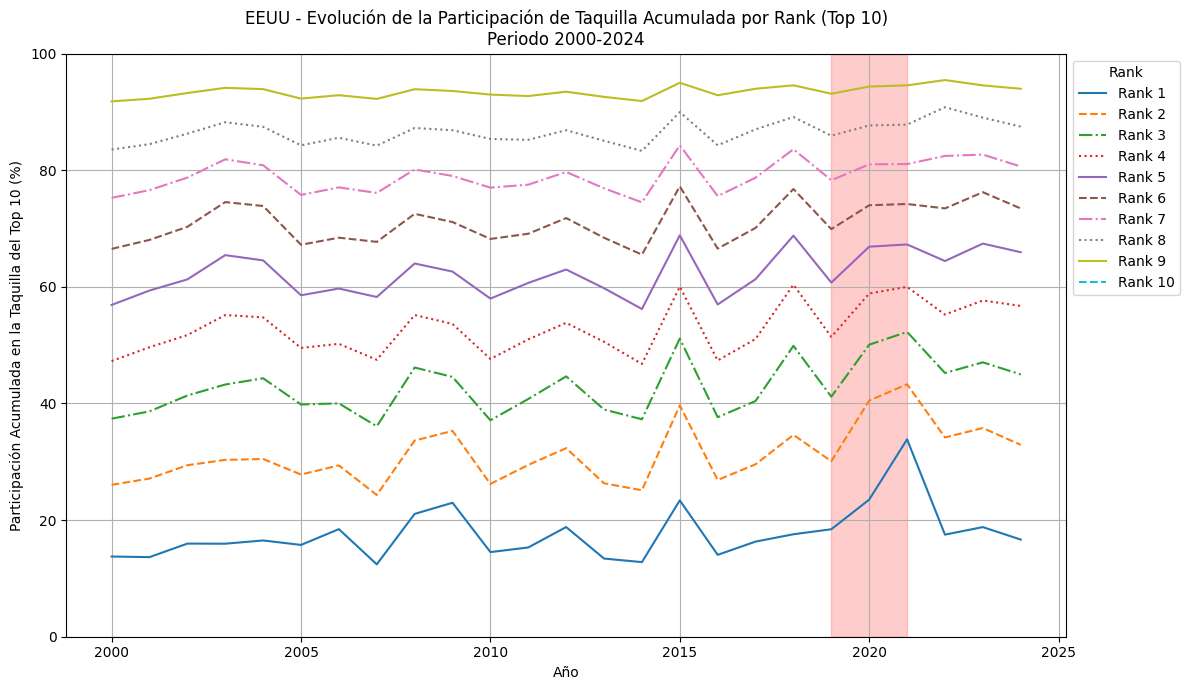

In [30]:
# Calculo Percentages Acumulativos
# Ordeno por año para evitar errores
df_top10_percentage_sorted = df_top10_percentage.sort_values(by=['Year', 'Rank'])

# Calcula el acumulativo para cada año
df_top10_percentage_sorted['Cumulative_Percentage'] = df_top10_percentage_sorted.groupby('Year')['Domestic_Inflac_Percentage'].cumsum()

plt.figure(figsize=(12, 7))

colors = sns.color_palette('tab10', 10)
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

for rank in range(1, 11):
    rank_data = df_top10_percentage_sorted[df_top10_percentage_sorted['Rank'] == rank]
    sns.lineplot(data=rank_data, x='Year', y='Cumulative_Percentage', color=colors[rank-1], linestyle=linestyles[rank-1], label=f'Rank {rank}')

plt.title('EEUU - Evolución de la Participación de Taquilla Acumulada por Rank (Top 10)\nPeriodo 2000-2024')
plt.xlabel('Año')
plt.ylabel('Participación Acumulada en la Taquilla del Top 10 (%)')

plt.axvspan(2019, 2021, color='red', alpha=0.2)

# limites del eje Y entre 0-100%
plt.ylim(0, 100)

plt.grid(True)

plt.legend(title='Rank', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [31]:
# Hago un pivot para transformarlo en tabla
pivot_table = df_top10_percentage.pivot_table(index='Year', columns='Rank', values='Domestic_Inflac_Percentage').fillna(0)

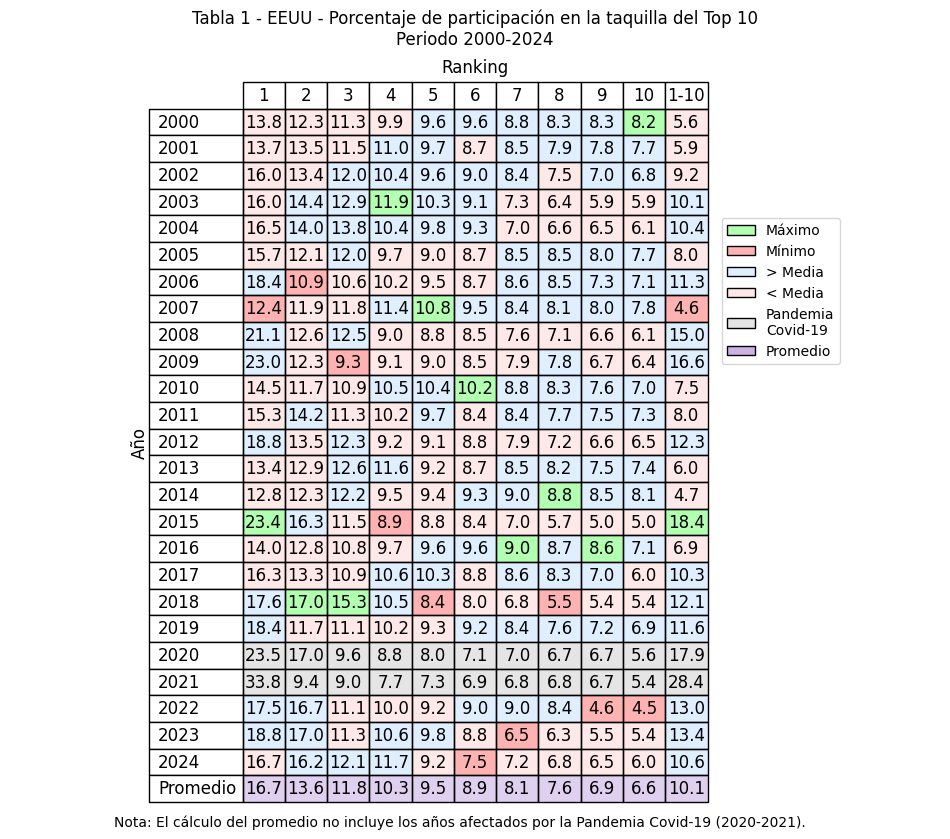

In [32]:
# --- Filas de años a ignorar para la media ---
años_ignorar = [2020, 2021]

# --- Creo nueva columna Diferencia 1-10 ---
pivot_table_with_diff = pivot_table.copy()
pivot_table_with_diff['1-10'] = (pivot_table_with_diff[pivot_table_with_diff.columns[0]] - pivot_table_with_diff[pivot_table_with_diff.columns[-1]])

# --- Calculo media ignorando 2020 y 2021 ---
mean_row = pivot_table_with_diff[~pivot_table_with_diff.index.isin(años_ignorar)].mean()
mean_row.name = 'Promedio'

# --- Agrego fila de promedio ---
pivot_table_with_diff = pd.concat([pivot_table_with_diff, mean_row.to_frame().T])

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")

# Creo la tabla
tabla = ax.table(
    cellText=pivot_table_with_diff.round(1).values,
    rowLabels=pivot_table_with_diff.index,
    colLabels=pivot_table_with_diff.columns,
    loc="center",
    cellLoc="center"
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(0.5, 1.6)

# --- Sombreo celdas ---
for j, col in enumerate(pivot_table_with_diff.columns):
    col_values = pivot_table_with_diff[col].values
    mean_val = col_values[-1]  # fila Promedio

    # --- Identifico índices válidos para máximo/mínimo (excluyendo años ignorados y Promedio) ---
    valid_idx = [i for i in range(len(col_values)-1) if pivot_table_with_diff.index[i] not in años_ignorar]
    valid_values = col_values[valid_idx]

    max_idx = valid_idx[np.argmax(valid_values)]
    min_idx = valid_idx[np.argmin(valid_values)]

    # --- Sombreo celdas ---
    for i, val in enumerate(col_values):
        cell = tabla[(i+1, j)]  # +1 porque fila 0 son encabezados

        if pivot_table_with_diff.index[i] in años_ignorar:
            cell.set_facecolor((0.8, 0.8, 0.8, 0.5))  # gris para años ignorados
        elif i == len(col_values)-1:  # fila Promedio
            cell.set_facecolor((0.6, 0.4, 0.8, 0.3))  # violeta
        elif i == max_idx:
            cell.set_facecolor((0, 1, 0, 0.3))  # verde máximo
        elif i == min_idx:
            cell.set_facecolor((1, 0, 0, 0.3))  # rojo mínimo
        elif j == len(pivot_table_with_diff.columns)-1:  # columna '1-10'
            if val > mean_val:
                cell.set_facecolor((0.6, 0.8, 1, 0.3))  # azul claro > media
            else:
                cell.set_facecolor((1, 0.7, 0.7, 0.3))  # salmón < media
        elif val > mean_val:
            cell.set_facecolor((0.6, 0.8, 1, 0.3))  # azul claro > media
        else:
            cell.set_facecolor((1, 0.7, 0.7, 0.3))  # salmón < media


# --- Título y encabezados ---
ax.set_title(
    "Tabla 1 - EEUU - Porcentaje de participación en la taquilla del Top 10\nPeriodo 2000-2024",
    fontsize=12, pad=20, y=1.3
)
ax.text(0.5, 1.31, "Ranking", transform=ax.transAxes, ha="center", va="center", fontsize=12)
ax.text(0.14, 0.5, "Año", transform=ax.transAxes, ha="center", va="center", fontsize=12, rotation=90)

# --- Leyenda ---
legend_elements = [
    Patch(facecolor=(0, 1, 0, 0.3), edgecolor='k', label='Máximo'),
    Patch(facecolor=(1, 0, 0, 0.3), edgecolor='k', label='Mínimo'),
    Patch(facecolor=(0.6, 0.8, 1, 0.3), edgecolor='k', label='> Media'),
    Patch(facecolor=(1, 0.7, 0.7, 0.3), edgecolor='k', label='< Media'),
    Patch(facecolor=(0.8, 0.8, 0.8, 0.5), edgecolor='k', label='Pandemia\nCovid-19'),
    Patch(facecolor=(0.6, 0.4, 0.8, 0.5), edgecolor='k', label='Promedio')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(.9, 1))

fig.text(
    0.5, -0.15,  # posición horizontal centrada, vertical cerca del borde inferior
    "Nota: El cálculo del promedio no incluye los años afectados por la Pandemia Covid-19 (2020-2021).",
    ha='center', va='bottom', fontsize=10, color='black'
)


plt.show()


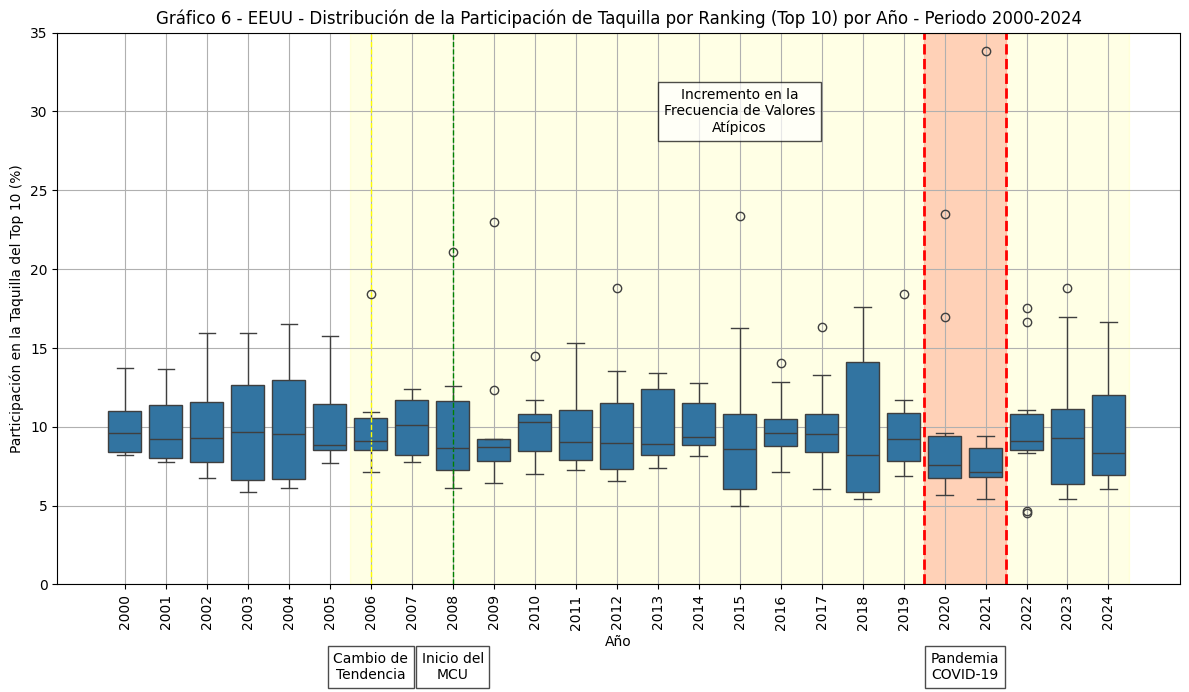

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top10_percentage, x='Year', y='Domestic_Inflac_Percentage')

plt.title('Gráfico 6 - EEUU - Distribución de la Participación de Taquilla por Ranking (Top 10) por Año - Periodo 2000-2024')
plt.xlabel('Año')
plt.ylabel('Participación en la Taquilla del Top 10 (%)')
plt.ylim(0, 35)
plt.grid(True)
plt.xticks(rotation=90)

year_list = sorted(df_top10_percentage['Year'].unique().tolist())

# --- sombreado pandemia ---
if 2020 in year_list and 2021 in year_list:
    x_pos_2020 = year_list.index(2020)
    x_pos_2021 = year_list.index(2021)
    plt.axvline(x=x_pos_2020 - 0.5, color='red', linestyle='--', lw=2)
    plt.axvline(x=x_pos_2021 + 0.5, color='red', linestyle='--', lw=2)
    plt.axvspan(x_pos_2020 - 0.5, x_pos_2021 + 0.5, color='red', alpha=0.2)
    plt.text((x_pos_2020 + x_pos_2021) / 2, -6, 'Pandemia\nCOVID-19',
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# --- inicio MCU ---
if 2008 in year_list:
    x_pos_2008 = year_list.index(2008)
    plt.axvline(x=x_pos_2008, color='green', linestyle='--', lw=1)
    plt.text(x_pos_2008, -6, 'Inicio del\nMCU',
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# --- cambio de tendencia 2006 + sombreado desde 2006 ---
if 2006 in year_list:
    x_pos_2006 = year_list.index(2006)
    plt.axvline(x=x_pos_2006, color='yellow', linestyle='--', lw=1)
    plt.text(x_pos_2006, -6, 'Cambio de\nTendencia',
             ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    # sombreado desde 2006 hasta último año
    x_pos_last = len(year_list) - 1
    plt.axvspan(x_pos_2006 - 0.5, x_pos_last + 0.5, color='yellow', alpha=0.1)

    # texto centrado entre 2006 y último año
    texto_grafico = "Incremento en la\nFrecuencia de Valores\nAtípicos"
    x_center = (x_pos_2006 + x_pos_last) / 2
    plt.text(x_center, 30, texto_grafico, ha='center', va='center',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


In [34]:
# Agrupo y calculo Q1, Q3, e IQR para 'Domestic_Inflac_Percentage'
yearly_quartiles = df_top10_percentage.groupby('Year')['Domestic_Inflac_Percentage'].quantile([0.25, 0.75]).unstack()
yearly_quartiles = yearly_quartiles.rename(columns={0.25: 'Q1', 0.75: 'Q3'})
yearly_quartiles['IQR'] = yearly_quartiles['Q3'] - yearly_quartiles['Q1']


In [35]:
# combino DF
df_merged_outliers = pd.merge(df_top10_percentage, yearly_quartiles, on='Year', how='left')

# Calculo limites para los outliers
df_merged_outliers['lower_bound'] = df_merged_outliers['Q1'] - 1.5 * df_merged_outliers['IQR']
df_merged_outliers['upper_bound'] = df_merged_outliers['Q3'] + 1.5 * df_merged_outliers['IQR']

# Filtro por outlier
outliers_df = df_merged_outliers[(df_merged_outliers['Domestic_Inflac_Percentage'] < df_merged_outliers['lower_bound']) |
                                 (df_merged_outliers['Domestic_Inflac_Percentage'] > df_merged_outliers['upper_bound'])].copy()


In [36]:
# Categoriza el tipo de outlier
outliers_df['Outlier_Category'] = np.where(outliers_df['Domestic_Inflac_Percentage'] > outliers_df['upper_bound'],
                                           'Superior al Maximo',
                                           'Inferior al Minimo')

In [37]:
# Selecciono las columnas de la tabla
outlier_table = outliers_df[['Year', 'Release Group', 'Outlier_Category']].copy()

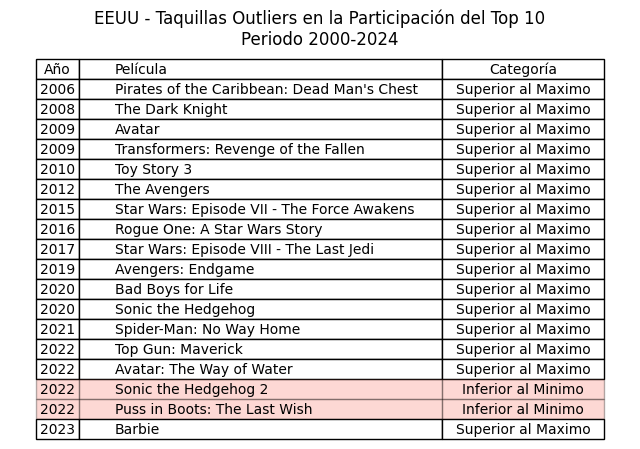

In [38]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')

# Creo la tabla
table = ax.table(cellText=outlier_table[['Year', 'Release Group', 'Outlier_Category']].values,
                 colLabels=['Año', 'Película', 'Categoría'],
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Ajusto ancho de columnas
table.auto_set_column_width([0, 1, 2]) # Uso auto_set_column_width con los in dices de las columnas

# Alineacion de la columna
for i in range(len(outlier_table) + 1):
    table[i, 1].set_text_props(ha='left') # Alineacion de la columna 'Película'


# Resalto 'Outlier_Category' es 'Inferior al Minimo'
for i in range(len(outlier_table)):
    if outlier_table.iloc[i]['Outlier_Category'] == 'Inferior al Minimo':
        for j in range(len(outlier_table.columns)):
            table[i + 1, j].set_facecolor('salmon')
            table[i + 1, j].set_alpha(0.3)

plt.title('EEUU - Taquillas Outliers en la Participación del Top 10\nPeriodo 2000-2024', fontsize=12, y=1.35)
plt.show()

### Analisis de lanzamientos por estudio

In [39]:
dfLanzamientosPorEstudio1995_2025 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_LanzamientosPorEstudio1995_2025.csv')

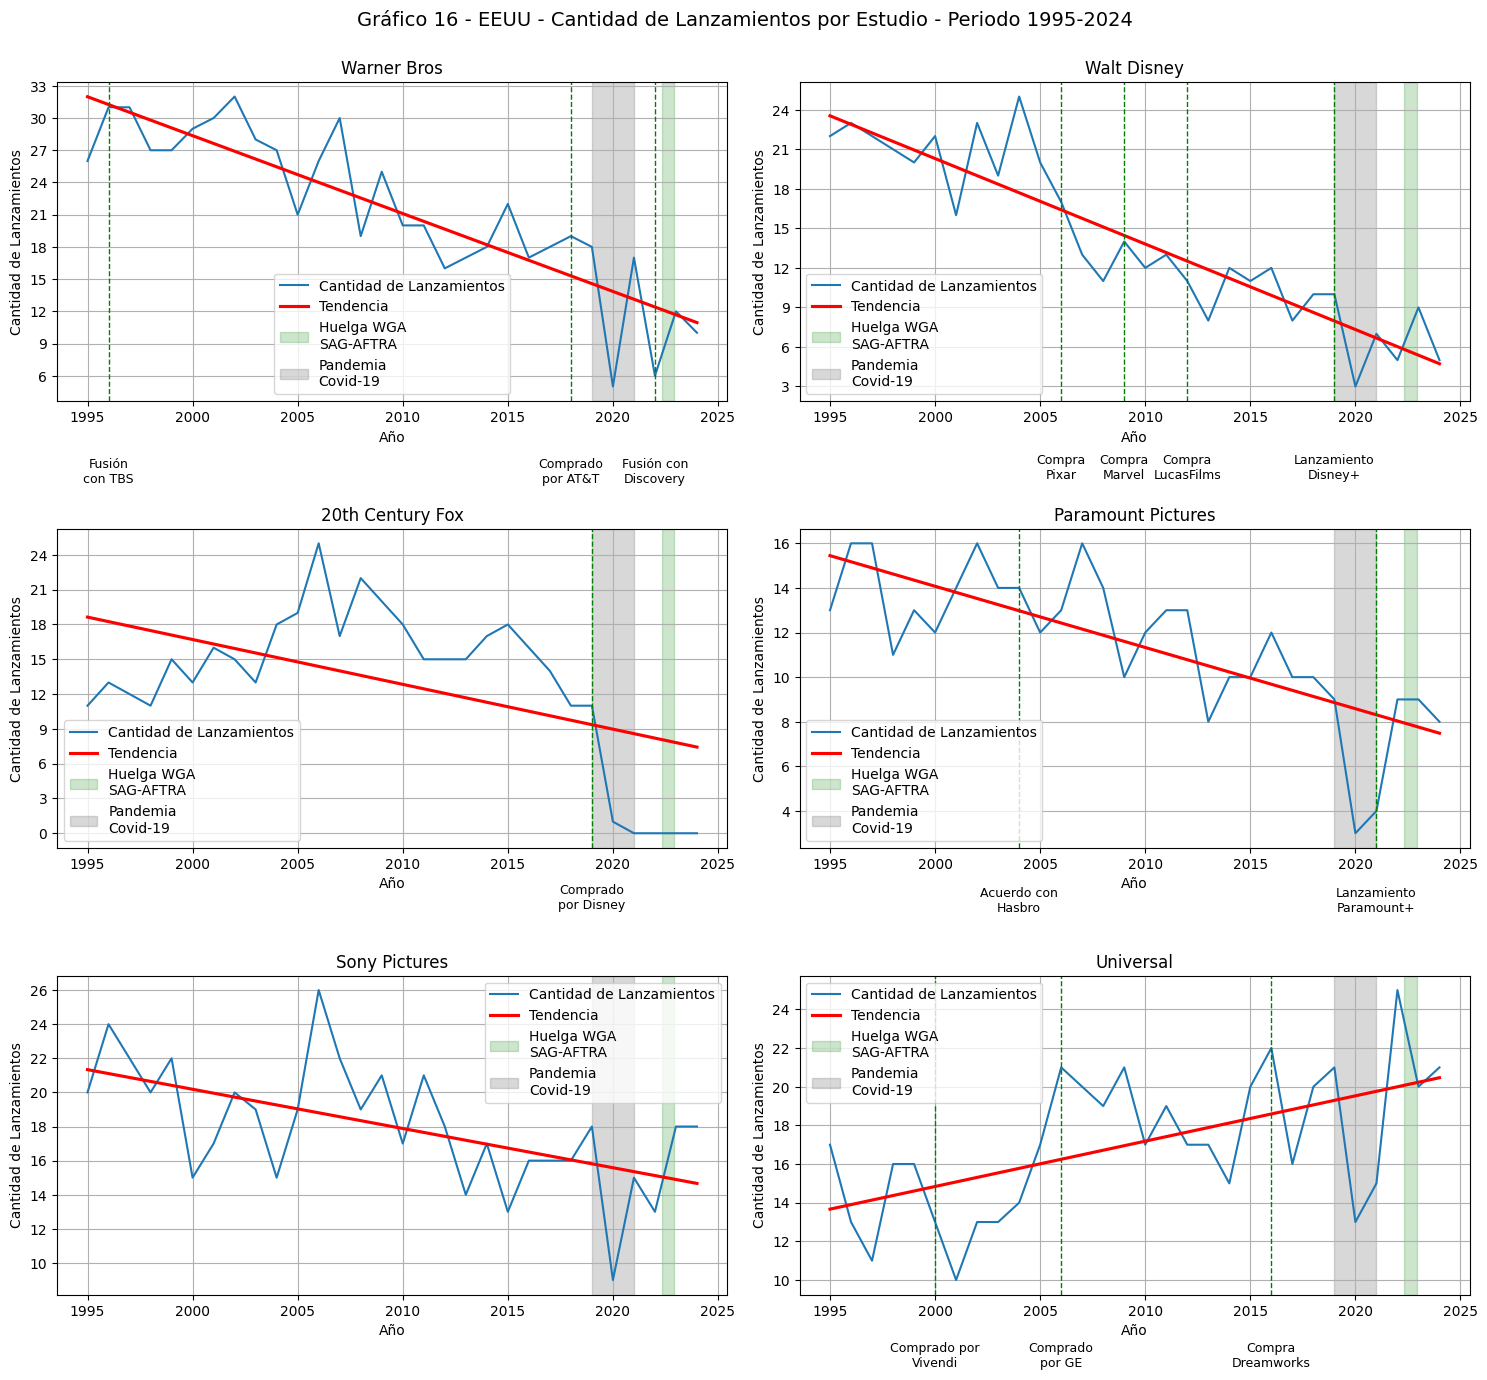

In [40]:
# Filtrar el DataFrame para el periodo 1995-2024
df_filtered_releases = dfLanzamientosPorEstudio1995_2025[
    (dfLanzamientosPorEstudio1995_2025['Year'] >= 1995) &
    (dfLanzamientosPorEstudio1995_2025['Year'] <= 2024)
].copy()

# Defino las columnas (estudios) a graficar
columns_to_plot = ['Warner Bros', 'Walt Disney', '20th Century Fox',
                   'Paramount Pictures', 'Sony Pictures', 'Universal']

# Defino cantidad de filas y columnas para los subplots
n_columns = 2
n_rows = (len(columns_to_plot) + n_columns - 1) // n_columns

# Creo los subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Título general del gráfico
fig.suptitle('Gráfico 16 - EEUU - Cantidad de Lanzamientos por Estudio - Periodo 1995-2024', fontsize=14,y=0.95)

# Grafico cada estudio con su línea y tendencia
for i, column in enumerate(columns_to_plot):
    # Línea principal de lanzamientos
    sns.lineplot(data=df_filtered_releases, x='Year', y=column, ax=axes[i], label='Cantidad de Lanzamientos')

    # Línea de tendencia (regresión lineal)
    sns.regplot(data=df_filtered_releases, x='Year', y=column, ax=axes[i],
                scatter=False, ci=None, color='red', label='Tendencia')

    axes[i].axvspan((2023-(1/12*8)),(2023-(1/12*1)), color='green', alpha=0.2, label='Huelga WGA\nSAG-AFTRA')

    # Eventos destacados según estudio
    if column == "Walt Disney":
        axes[i].axvline(x=2019, color='green', linestyle='--', lw=1)
        axes[i].text(2019, -4., 'Lanzamiento\nDisney+', ha='center', fontsize=9)
        axes[i].axvline(x=2006, color='green', linestyle='--', lw=1)
        axes[i].text(2006, -4., 'Compra\nPixar', ha='center', fontsize=9)
        axes[i].axvline(x=2009, color='green', linestyle='--', lw=1)
        axes[i].text(2009, -4., 'Compra\nMarvel', ha='center', fontsize=9)
        axes[i].axvline(x=2012, color='green', linestyle='--', lw=1)
        axes[i].text(2012, -4., 'Compra\nLucasFilms', ha='center', fontsize=9)

    if column == "20th Century Fox":
        axes[i].axvline(x=2019, color='green', linestyle='--', lw=1)
        axes[i].text(2019, -6.5, 'Comprado\npor Disney', ha='center', fontsize=9)

    if column == "Paramount Pictures":
        axes[i].axvline(x=2021, color='green', linestyle='--', lw=1)
        axes[i].text(2021, -0.5, 'Lanzamiento\nParamount+', ha='center', fontsize=9)
        axes[i].axvline(x=2004, color='green', linestyle='--', lw=1)
        axes[i].text(2004, -0.5, 'Acuerdo con\nHasbro', ha='center', fontsize=9)

    if column == "Warner Bros":
        axes[i].axvline(x=2022, color='green', linestyle='--', lw=1)
        axes[i].text(2022, -4., 'Fusión con\nDiscovery', ha='center', fontsize=9)
        axes[i].axvline(x=2018, color='green', linestyle='--', lw=1)
        axes[i].text(2018, -4., 'Comprado\npor AT&T', ha='center', fontsize=9)
        axes[i].axvline(x=1996, color='green', linestyle='--', lw=1)
        axes[i].text(1996, -4., 'Fusión\ncon TBS', ha='center', fontsize=9)

    if column == "Universal":
        axes[i].axvline(x=2000, color='green', linestyle='--', lw=1)
        axes[i].text(2000, 5.5, 'Comprado por\nVivendi', ha='center', fontsize=9)
        axes[i].axvline(x=2006, color='green', linestyle='--', lw=1)
        axes[i].text(2006, 5.5, 'Comprado\npor GE', ha='center', fontsize=9)
        axes[i].axvline(x=2016, color='green', linestyle='--', lw=1)
        axes[i].text(2016, 5.5, 'Compra\nDreamworks', ha='center', fontsize=9)

    # Sombreado pandemia Covid-19 (2019-2021)
    axes[i].axvspan(2019, 2021, color='gray', alpha=0.3, label='Pandemia\nCovid-19')

    # Ajustes de cada subplot
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Cantidad de Lanzamientos')
    axes[i].grid(True)
    axes[i].legend()
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))  # Escala Y en enteros

# Oculto subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusto diseño para evitar solapamiento
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


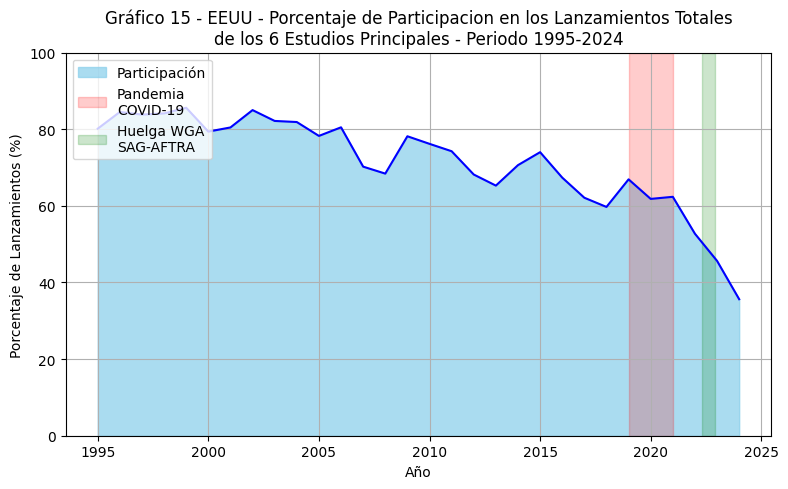

In [41]:
# Filtro el DF entre 1995 y 2024
df_filtered_releases = dfLanzamientosPorEstudio1995_2025[(dfLanzamientosPorEstudio1995_2025['Year'] >= 1995) & (dfLanzamientosPorEstudio1995_2025['Year'] <= 2024)].copy()

# Calculo el total de estrenos
df_filtered_releases['Total Releases'] = df_filtered_releases['Total Major 6'] + df_filtered_releases['Total Other Studios']

# Calculo la participaciond de 'Total Major 6'
df_filtered_releases['Major 6 Percentage'] = (df_filtered_releases['Total Major 6'] / df_filtered_releases['Total Releases']) * 100

plt.figure(figsize=(8, 5))
plt.fill_between(df_filtered_releases['Year'], df_filtered_releases['Major 6 Percentage'], color='skyblue', alpha=0.7, label='Participación')

# Agrego un lineplot para darle mas visibilidad al area
sns.lineplot(data=df_filtered_releases, x='Year', y='Major 6 Percentage', color='blue')

# Sombreo el periodo de la pandemia COVID-19
plt.axvspan(2019, 2021, color='red', alpha=0.2, label='Pandemia\nCOVID-19')

plt.axvspan((2023-(1/12*8)),(2023-(1/12*1)), color='green', alpha=0.2, label='Huelga WGA\nSAG-AFTRA')

plt.title('Gráfico 15 - EEUU - Porcentaje de Participacion en los Lanzamientos Totales\nde los 6 Estudios Principales - Periodo 1995-2024')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Lanzamientos (%)')

# Seteo la graduacion del eje y entre 0-100%
plt.ylim(0, 100)

plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Analisis por Dia - Taquilla Top 10 (Ajustada por Inflacion) y Venta de entradas

#### Analisis de la Taquilla del Top 10 ajustada por inflacion por tipo de dia

In [42]:
dfTaquillaDiariaTop10_1989_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_RecaudacionDiaria10.csv')

In [43]:
dfTaquillaDiariaTop10_1989_2024 = pd.merge(dfTaquillaDiariaTop10_1989_2024, dfIndicesAnuales1977_2024[['year', 'IPC Todos los ítemes (promedio 1982-1984=100)']], left_on='Year', right_on='year')
dfTaquillaDiariaTop10_1989_2024['coeficiente']=ipc2024/dfTaquillaDiariaTop10_1989_2024['IPC Todos los ítemes (promedio 1982-1984=100)']
dfTaquillaDiariaTop10_1989_2024['Top_10_Inflac']=dfTaquillaDiariaTop10_1989_2024['Top_10_Gross']*dfTaquillaDiariaTop10_1989_2024['coeficiente']
dfTaquillaDiariaTop10_1989_2024['#1_Gross_Inflac']=dfTaquillaDiariaTop10_1989_2024['#1_Gross']*dfTaquillaDiariaTop10_1989_2024['coeficiente']
dfTaquillaDiariaTop10_1989_2024.drop(columns=['year', 'coeficiente','IPC Todos los ítemes (promedio 1982-1984=100)'], inplace=True)

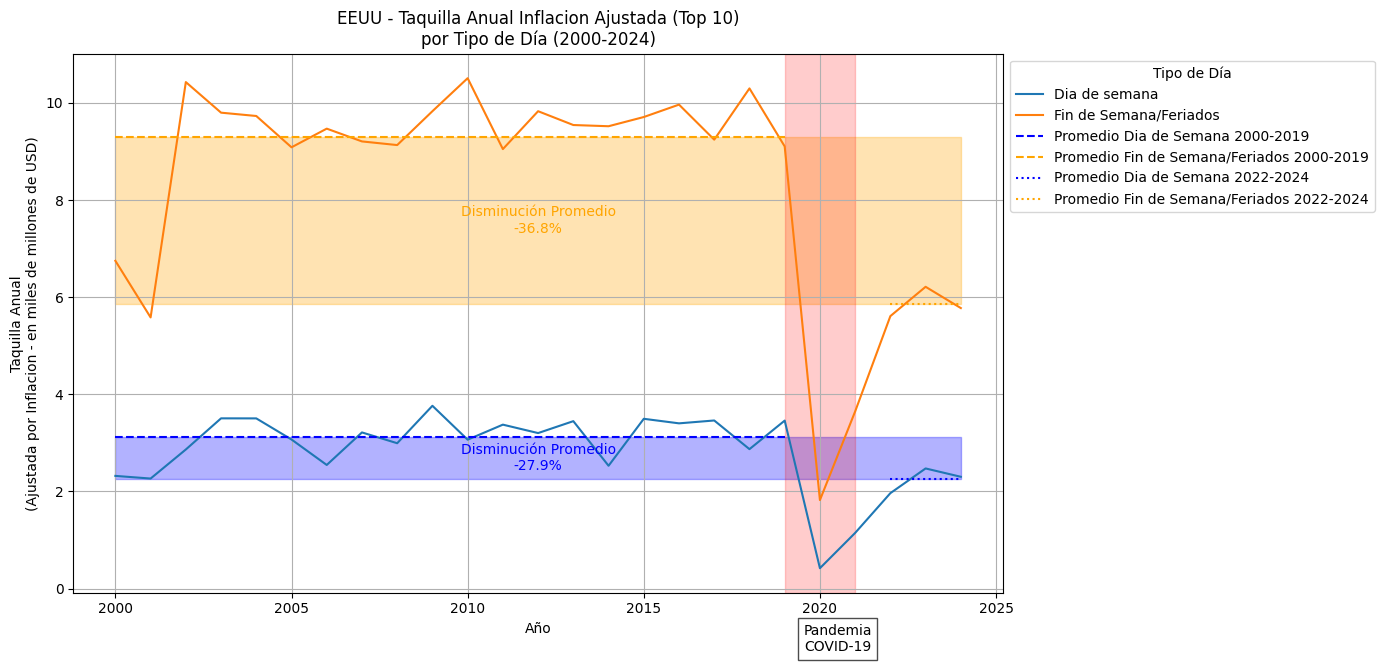

In [44]:
# Filtro los datos entre el 2000 y el 2024
df_filtered_daily = dfTaquillaDiariaTop10_1989_2024[(dfTaquillaDiariaTop10_1989_2024['Year'] >= 2000) & (dfTaquillaDiariaTop10_1989_2024['Year'] <= 2024)].copy()

# Categorizo entre 'Dia de semana' y 'Fin de Semana/Feriados'
df_filtered_daily['Event_Category'] = df_filtered_daily['Event_Primary'].apply(lambda x: 'Dia de semana' if x == 'Normal' else 'Fin de Semana/Feriados')

# Calculo la suma anual de 'Top_10_Inflac' para cada categoria de dia
df_yearly_inflac = df_filtered_daily.groupby(['Year', 'Event_Category'])['Top_10_Inflac'].sum().reset_index()

# Calculo promedios de 'Top_10_Inflac' para cada categoria de los periodos 2000-2019 y 2022-2024
avg_inflac_2000_2019_weekday = df_yearly_inflac[(df_yearly_inflac['Year'] >= 2000) & (df_yearly_inflac['Year'] <= 2019) & (df_yearly_inflac['Event_Category'] == 'Dia de semana')]['Top_10_Inflac'].mean()
avg_inflac_2000_2019_weekend = df_yearly_inflac[(df_yearly_inflac['Year'] >= 2000) & (df_yearly_inflac['Year'] <= 2019) & (df_yearly_inflac['Event_Category'] == 'Fin de Semana/Feriados')]['Top_10_Inflac'].mean()
avg_inflac_2022_2024_weekday = df_yearly_inflac[(df_yearly_inflac['Year'] >= 2022) & (df_yearly_inflac['Year'] <= 2024) & (df_yearly_inflac['Event_Category'] == 'Dia de semana')]['Top_10_Inflac'].mean()
avg_inflac_2022_2024_weekend = df_yearly_inflac[(df_yearly_inflac['Year'] >= 2022) & (df_yearly_inflac['Year'] <= 2024) & (df_yearly_inflac['Event_Category'] == 'Fin de Semana/Feriados')]['Top_10_Inflac'].mean()

# Calculo el % de variacion promedio
perc_weekday = ((avg_inflac_2022_2024_weekday - avg_inflac_2000_2019_weekday) / avg_inflac_2000_2019_weekday) * 100
perc_weekend = ((avg_inflac_2022_2024_weekend - avg_inflac_2000_2019_weekend) / avg_inflac_2000_2019_weekend) * 100

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_yearly_inflac, x='Year', y='Top_10_Inflac', hue='Event_Category')

# Lineas horizontales para los promedios
plt.hlines(y=avg_inflac_2000_2019_weekday, xmin=2000, xmax=2019, color='blue', linestyle='--', lw=1.5, label=f'Promedio Dia de Semana 2000-2019')
plt.hlines(y=avg_inflac_2000_2019_weekend, xmin=2000, xmax=2019, color='orange', linestyle='--', lw=1.5, label=f'Promedio Fin de Semana/Feriados 2000-2019')
plt.hlines(y=avg_inflac_2022_2024_weekday, xmin=2022, xmax=2024, color='blue', linestyle=':', lw=1.5, label=f'Promedio Dia de Semana 2022-2024')
plt.hlines(y=avg_inflac_2022_2024_weekend, xmin=2022, xmax=2024, color='orange', linestyle=':', lw=1.5, label=f'Promedio Fin de Semana/Feriados 2022-2024')

# Sombreo las areas entre promedios
plt.fill_between([2000, 2024], avg_inflac_2000_2019_weekday, avg_inflac_2022_2024_weekday, color='blue', alpha=0.3)
plt.fill_between([2000, 2024], avg_inflac_2000_2019_weekend, avg_inflac_2022_2024_weekend, color='orange', alpha=0.3)

# Sombreo periodo pandemia COVID-19
plt.axvspan(2019, 2021, color='red', alpha=0.2)
plt.text(2020.5, plt.ylim()[0] * 15, 'Pandemia\nCOVID-19', horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Texto dentro de cada área sombreada
plt.text(2012, (avg_inflac_2000_2019_weekday + avg_inflac_2022_2024_weekday) / 2,
         f'Disminución Promedio\n{perc_weekday:.1f}%', color='blue',
         fontsize=10, ha='center', va='center')

plt.text(2012, (avg_inflac_2000_2019_weekend + avg_inflac_2022_2024_weekend) / 2,
         f'Disminución Promedio\n{perc_weekend:.1f}%', color='orange',
         fontsize=10, ha='center', va='center')

plt.title('EEUU - Taquilla Anual Inflacion Ajustada (Top 10)\npor Tipo de Día (2000-2024)')
plt.xlabel('Año')
plt.ylabel('Taquilla Anual\n(Ajustada por Inflacion - en miles de millones de USD)')
plt.grid(True)
plt.legend(title='Tipo de Día', bbox_to_anchor=(1, 1), loc='upper left')

# Formato del eje y en millones
formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e9))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

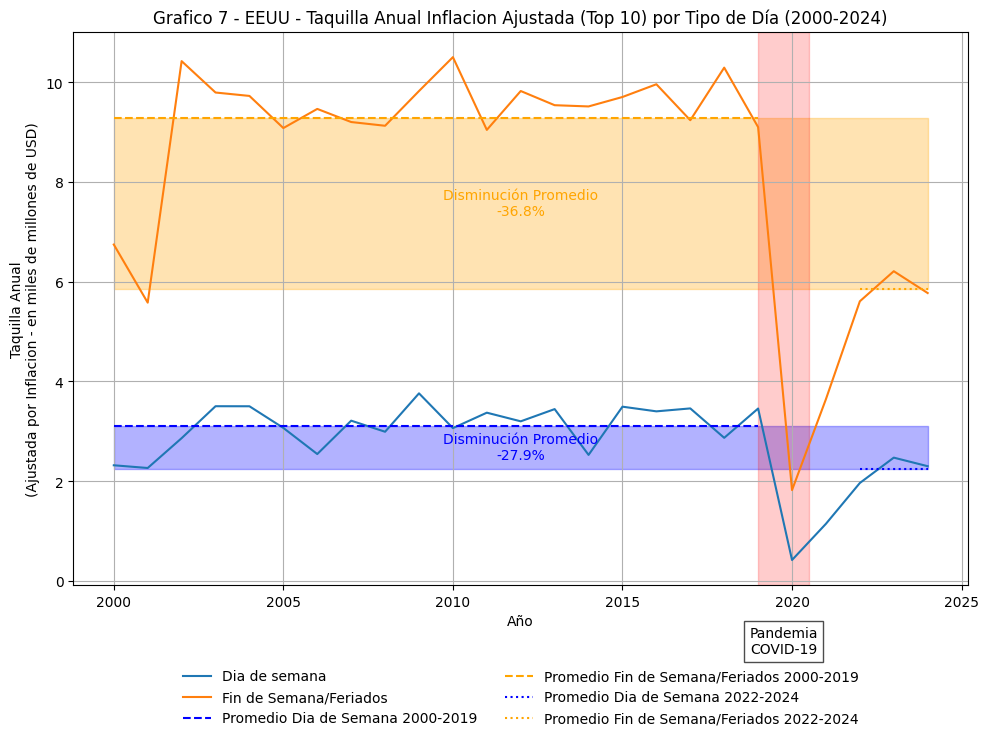

In [45]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_yearly_inflac, x='Year', y='Top_10_Inflac', hue='Event_Category')

# Líneas horizontales para los promedios
plt.hlines(y=avg_inflac_2000_2019_weekday, xmin=2000, xmax=2019, color='blue', linestyle='--', lw=1.5, label=f'Promedio Dia de Semana 2000-2019')
plt.hlines(y=avg_inflac_2000_2019_weekend, xmin=2000, xmax=2019, color='orange', linestyle='--', lw=1.5, label=f'Promedio Fin de Semana/Feriados 2000-2019')
plt.hlines(y=avg_inflac_2022_2024_weekday, xmin=2022, xmax=2024, color='blue', linestyle=':', lw=1.5, label=f'Promedio Dia de Semana 2022-2024')
plt.hlines(y=avg_inflac_2022_2024_weekend, xmin=2022, xmax=2024, color='orange', linestyle=':', lw=1.5, label=f'Promedio Fin de Semana/Feriados 2022-2024')

# Sombreo las áreas entre promedios
plt.fill_between([2000, 2024], avg_inflac_2000_2019_weekday, avg_inflac_2022_2024_weekday, color='blue', alpha=0.3)
plt.fill_between([2000, 2024], avg_inflac_2000_2019_weekend, avg_inflac_2022_2024_weekend, color='orange', alpha=0.3)

# Sombreo periodo pandemia COVID-19
plt.axvspan(2019, 2020.5, color='red', alpha=0.2)
plt.text(((2019+2020.5)/2), plt.ylim()[0] * 17, 'Pandemia\nCOVID-19', horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Texto dentro de cada área sombreada
plt.text(2012, (avg_inflac_2000_2019_weekday + avg_inflac_2022_2024_weekday) / 2,
         f'Disminución Promedio\n{perc_weekday:.1f}%', color='blue',
         fontsize=10, ha='center', va='center')

plt.text(2012, (avg_inflac_2000_2019_weekend + avg_inflac_2022_2024_weekend) / 2,
         f'Disminución Promedio\n{perc_weekend:.1f}%', color='orange',
         fontsize=10, ha='center', va='center')

plt.title('Grafico 7 - EEUU - Taquilla Anual Inflacion Ajustada (Top 10) por Tipo de Día (2000-2024)')
plt.xlabel('Año')
plt.ylabel('Taquilla Anual\n(Ajustada por Inflacion - en miles de millones de USD)')
plt.grid(True)

# --- Ajuste de leyenda abajo en 2 columnas ---
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.13),
           ncol=2,
           frameon=False)

# Formato del eje Y en miles de millones
formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e9))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Dejo espacio abajo para la leyenda
plt.show()


#### Impacto de los Atentados del 11/9, Comparativa con Año Anterior y Posterior

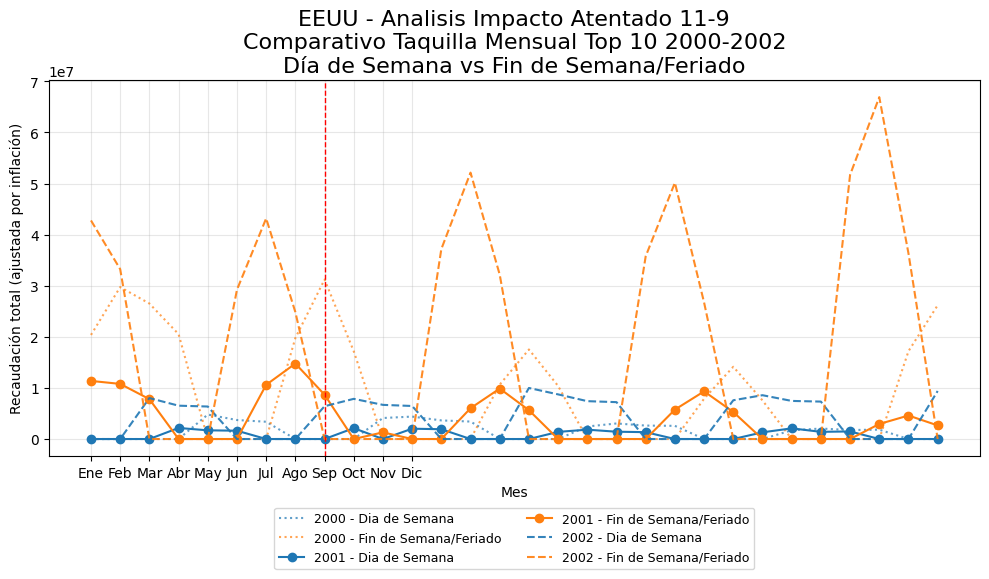

In [48]:
# ============================
# Función para procesar septiembre de un año
# ============================
def procesar_septiembre(df, anio):
    dft = df.copy()
    dft["Date_Normalized"] = pd.to_datetime(dft["Date_Normalized"])
    dft = dft[(dft["Date_Normalized"].dt.year == anio) &
              (dft["Date_Normalized"].dt.month == 9)]
    dft["DayNum"] = dft["Date_Normalized"].dt.day

    # Clasificación días
    dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday"]
    def clasificar(row):
        day = row["Day"]
        event = row["Event_Primary"]
        if day in dias_semana and (event == "World Cup" or event == "Normal" or event == "Olympics"):
            return "Dia de Semana"
        else:
            return "Fin de Semana/Feriado"
    dft["Categoria"] = dft.apply(clasificar, axis=1)

    # Agregación diaria
    df_daily = dft.groupby(["DayNum","Categoria"], as_index=False).agg(Total_Taquilla=("Top_10_Inflac","sum"))
    df_pivot = df_daily.pivot(index="DayNum", columns="Categoria", values="Total_Taquilla").fillna(0)
    return df_pivot

# ============================
# Procesar los tres años
# ============================
df2000 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2000)
df2001 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2001)
df2002 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2002)

# ============================
# Gráfico
# ============================
plt.figure(figsize=(10,6))

# Definir estilos
estilos = {
    2000: {"linestyle": ":", "alpha": 0.7},
    2001: {"linestyle": "-", "alpha": 1.0},
    2002: {"linestyle": "--", "alpha": 0.9}
}

# Colores fijos para cada categoría
colores = {"Dia de Semana": "tab:blue", "Fin de Semana/Feriado": "tab:orange"}

# Graficar
for anio, dfp in zip([2000,2001,2002], [df2000,df2001,df2002]):
    for cat in dfp.columns:
        plt.plot(
            dfp.index, dfp[cat],
            label=f"{anio} - {cat}",
            color=colores[cat],
            linestyle=estilos[anio]["linestyle"],
            alpha=estilos[anio]["alpha"],
            marker="o" if anio == 2001 else None
        )

# ============================
# Formato gráfico
# ============================
plt.title("EEUU - Analisis Impacto Atentado 11-9\nComparativo Taquilla Mensual Top 10 2000-2002\nDía de Semana vs Fin de Semana/Feriado", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Recaudación total (ajustada por inflación)")
plt.xticks(range(1,13), [
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic"
])
plt.grid(alpha=0.3)

# Línea vertical para septiembre
plt.axvline(x=9, color="red", linestyle="--", linewidth=1)
#plt.text(9.05, plt.ylim()[1]*0.95, "Septiembre", color="red", fontsize=9, rotation=90, va="top")

# Leyenda debajo del gráfico
plt.legend(ncol=2, fontsize=9, loc="upper center", bbox_to_anchor=(0.5, -0.12))

plt.tight_layout()
plt.show()


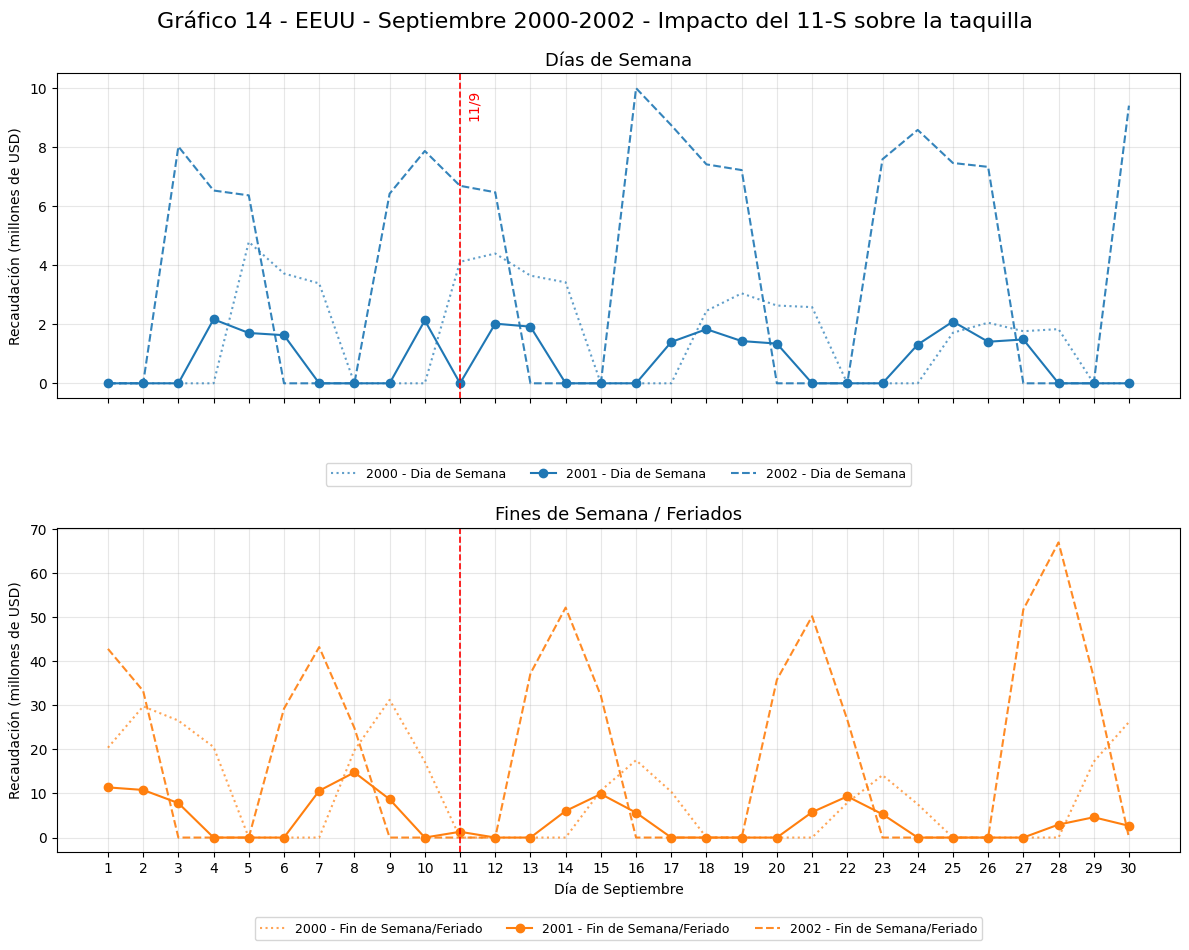

In [49]:
# ============================
# Función para procesar septiembre de un año
# ============================
def procesar_septiembre(df, anio):
    dft = df.copy()
    dft["Date_Normalized"] = pd.to_datetime(dft["Date_Normalized"])
    dft = dft[(dft["Date_Normalized"].dt.year == anio) &
              (dft["Date_Normalized"].dt.month == 9)]
    dft["DayNum"] = dft["Date_Normalized"].dt.day

    # Clasificación días
    dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday"]
    def clasificar(row):
        day = row["Day"]
        event = row["Event_Primary"]
        if day in dias_semana and (event == "World Cup" or event == "Normal" or event == "Olympics"):
            return "Dia de Semana"
        else:
            return "Fin de Semana/Feriado"
    dft["Categoria"] = dft.apply(clasificar, axis=1)

    # Agregación diaria
    df_daily = dft.groupby(["DayNum","Categoria"], as_index=False).agg(Total_Taquilla=("Top_10_Inflac","sum"))
    df_pivot = df_daily.pivot(index="DayNum", columns="Categoria", values="Total_Taquilla").fillna(0)
    return df_pivot

# ============================
# Procesar cada año
# ============================
df_sep2000 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2000)
df_sep2001 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2001)
df_sep2002 = procesar_septiembre(dfTaquillaDiariaTop10_1989_2024, 2002)

# ============================
# Gráfico separado en 2 subplots
# ============================
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10), sharex=True)

estilos = {
    2000: {"linestyle": ":", "alpha": 0.7},
    2001: {"linestyle": "-", "alpha": 1.0},
    2002: {"linestyle": "--", "alpha": 0.9}
}
colores = {"Dia de Semana":"tab:blue", "Fin de Semana/Feriado":"tab:orange"}

# ----------------------------
# Subplot 1 - Día de Semana
# ----------------------------
for anio, dfp in zip([2000,2001,2002], [df_sep2000, df_sep2001, df_sep2002]):
    if "Dia de Semana" in dfp.columns:
        ax1.plot(
            dfp.index, dfp["Dia de Semana"]/1_000_000,
            label=f"{anio} - Dia de Semana",
            color=colores["Dia de Semana"],
            linestyle=estilos[anio]["linestyle"],
            alpha=estilos[anio]["alpha"],
            marker="o" if anio==2001 else None
        )

ax1.set_title("Días de Semana", fontsize=13)
ax1.set_ylabel("Recaudación (millones de USD)")
ax1.grid(alpha=0.3)
ax1.set_xticks(range(1,31))
ax1.axvline(x=11, color="red", linestyle="--", linewidth=1.2)
ax1.text(11.2, ax1.get_ylim()[1]*0.95, "11/9", color="red", fontsize=10, rotation=90, va="top")
ax1.legend(ncol=3, fontsize=9, loc="upper center", bbox_to_anchor=(0.5, -0.18))

# ----------------------------
# Subplot 2 - Fin de Semana/Feriado
# ----------------------------
for anio, dfp in zip([2000,2001,2002], [df_sep2000, df_sep2001, df_sep2002]):
    if "Fin de Semana/Feriado" in dfp.columns:
        ax2.plot(
            dfp.index, dfp["Fin de Semana/Feriado"]/1_000_000,
            label=f"{anio} - Fin de Semana/Feriado",
            color=colores["Fin de Semana/Feriado"],
            linestyle=estilos[anio]["linestyle"],
            alpha=estilos[anio]["alpha"],
            marker="o" if anio==2001 else None
        )

ax2.set_title("Fines de Semana / Feriados", fontsize=13)
ax2.set_xlabel("Día de Septiembre")
ax2.set_ylabel("Recaudación (millones de USD)")
ax2.set_xticks(range(1,31))
ax2.grid(alpha=0.3)
ax2.axvline(x=11, color="red", linestyle="--", linewidth=1.2)
ax2.legend(ncol=3, fontsize=9, loc="upper center", bbox_to_anchor=(0.5, -0.18))

# ============================
# Título general
# ============================
fig.suptitle("Gráfico 14 - EEUU - Septiembre 2000-2002 - Impacto del 11-S sobre la taquilla", fontsize=16, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



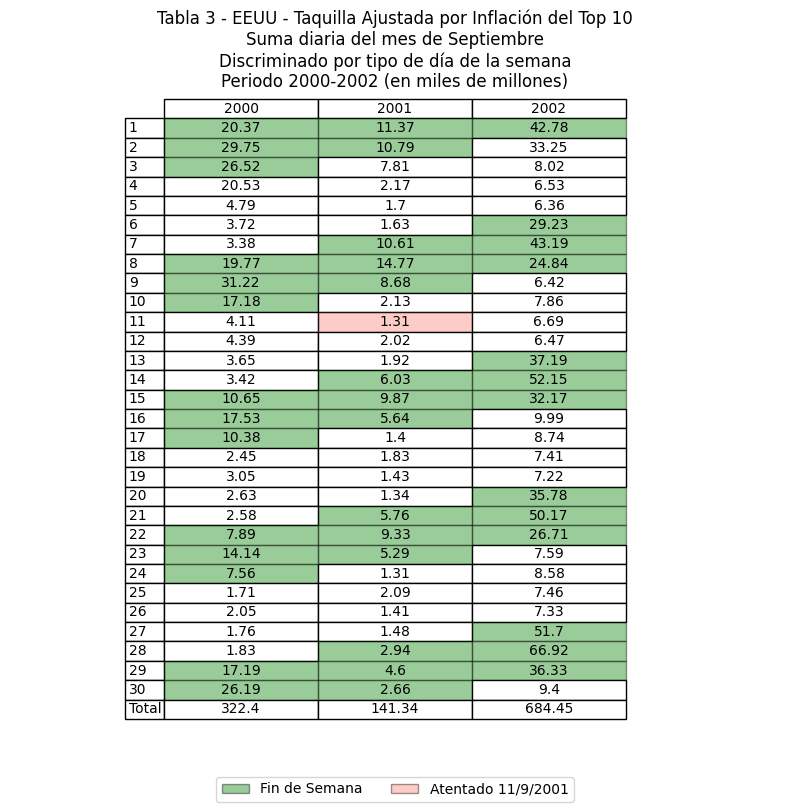

In [50]:
# ============================
# Filtra septiembre 2000-2002
# ============================
dfTaquillaDiariaTop10_1989_2024["Date_Normalized"] = pd.to_datetime(dfTaquillaDiariaTop10_1989_2024["Date_Normalized"])

df_sep = dfTaquillaDiariaTop10_1989_2024[
    (dfTaquillaDiariaTop10_1989_2024["Date_Normalized"].dt.year.isin([2000, 2001, 2002])) &
    (dfTaquillaDiariaTop10_1989_2024["Date_Normalized"].dt.month == 9)
].copy()

df_sep["Year"] = df_sep["Date_Normalized"].dt.year
df_sep["DayNum"] = df_sep["Date_Normalized"].dt.day

# ============================
# Agrupa suma diaria
# ============================
df_table = df_sep.groupby(["DayNum", "Year"], as_index=False).agg(Total_Gross=("Top_10_Inflac", "sum"))

# Pivot
df_pivot = df_table.pivot(index="DayNum", columns="Year", values="Total_Gross").fillna(0)

# Escala a miles de millones
df_pivot = df_pivot / 1_000_000
df_pivot.columns = [str(col) for col in df_pivot.columns]

# Agrega fila de totales
df_pivot.loc["Total"] = df_pivot.sum()

# ============================
# Crea figura para la tabla
# ============================
fig, ax = plt.subplots(figsize=(8, 0.5 + 0.25* len(df_pivot)))
ax.axis("off")

# Convierte a lista para table
cell_data = df_pivot.round(2).values.tolist()
row_labels = df_pivot.index.tolist()
col_labels = df_pivot.columns.tolist()

# ============================
# Crea tabla principal
# ============================
the_table = ax.table(cellText=cell_data,
                     rowLabels=row_labels,
                     colLabels=col_labels,
                     cellLoc='center',
                     loc='center')

# Ajustar tamaño de las columnas y filas
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(0.6, 1.2)  # ancho x alto

# ============================
# Sombreado según condiciones
# ============================
dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday"]
for i, row in enumerate(row_labels):
    for j, col in enumerate(col_labels):
        cell = the_table[i+1, j]  # +1 por cabecera
        # Sombrear 11/9/2001 en salmon
        if row == 11 and col == "2001":
            cell.set_facecolor("salmon")
            cell.set_alpha(0.4)
        # Sombrear en verde si ese día no es Normal
        cond = df_sep[
            (df_sep["DayNum"] == row) &
            (df_sep["Year"] == int(col)) &
            (~df_sep["Day"].isin(dias_semana))
        ]
        if not cond.empty:
            cell.set_facecolor("green")
            cell.set_alpha(0.4)

# ============================
# Título
# ============================
plt.title("Tabla 3 - EEUU - Taquilla Ajustada por Inflación del Top 10\nSuma diaria del mes de Septiembre\nDiscriminado por tipo de día de la semana\nPeriodo 2000-2002 (en miles de millones)",
          fontsize=12, pad=10)

# ============================
# Leyenda al estilo gráfico
# ============================
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.4, label='Fin de Semana'),
    Patch(facecolor='salmon', edgecolor='black', alpha=0.4, label='Atentado 11/9/2001')
]

ax.legend(handles=legend_elements, loc='lower center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout()
plt.show()


#### Promedio de entradas vendidas del Top 10 por año por día de la semana feriado

$$
Barra (𝑎ñ𝑜) = \frac{Tickets Vendidos}{Cantidad de Feriados / Fechas Especiales}
$$

Línea de tendencia = regresión solo con los años en que sí hubo feriados/eventos en ese día.

Si un año no hubo feriado, directamente no se grafica punto para la línea (evita que el promedio la no ocurrencia castigue al promedio).

In [51]:
# Combino los DF por la columna Year
dfTaquillaDiariaTop10_1989_2024 = pd.merge(dfTaquillaDiariaTop10_1989_2024, dfPrecioEntradas1977_2025[['Year', 'Price']], on='Year', how='left')

# Calculo 'tickets_sold' para 'Top_10_Gross' y '#1_Gross'
dfTaquillaDiariaTop10_1989_2024['Top_10_tickets_sold'] = (dfTaquillaDiariaTop10_1989_2024['Top_10_Gross'] / dfTaquillaDiariaTop10_1989_2024['Price']).astype(int)
dfTaquillaDiariaTop10_1989_2024['#1_tickets_sold'] = (dfTaquillaDiariaTop10_1989_2024['#1_Gross'] / dfTaquillaDiariaTop10_1989_2024['Price']).astype(int)


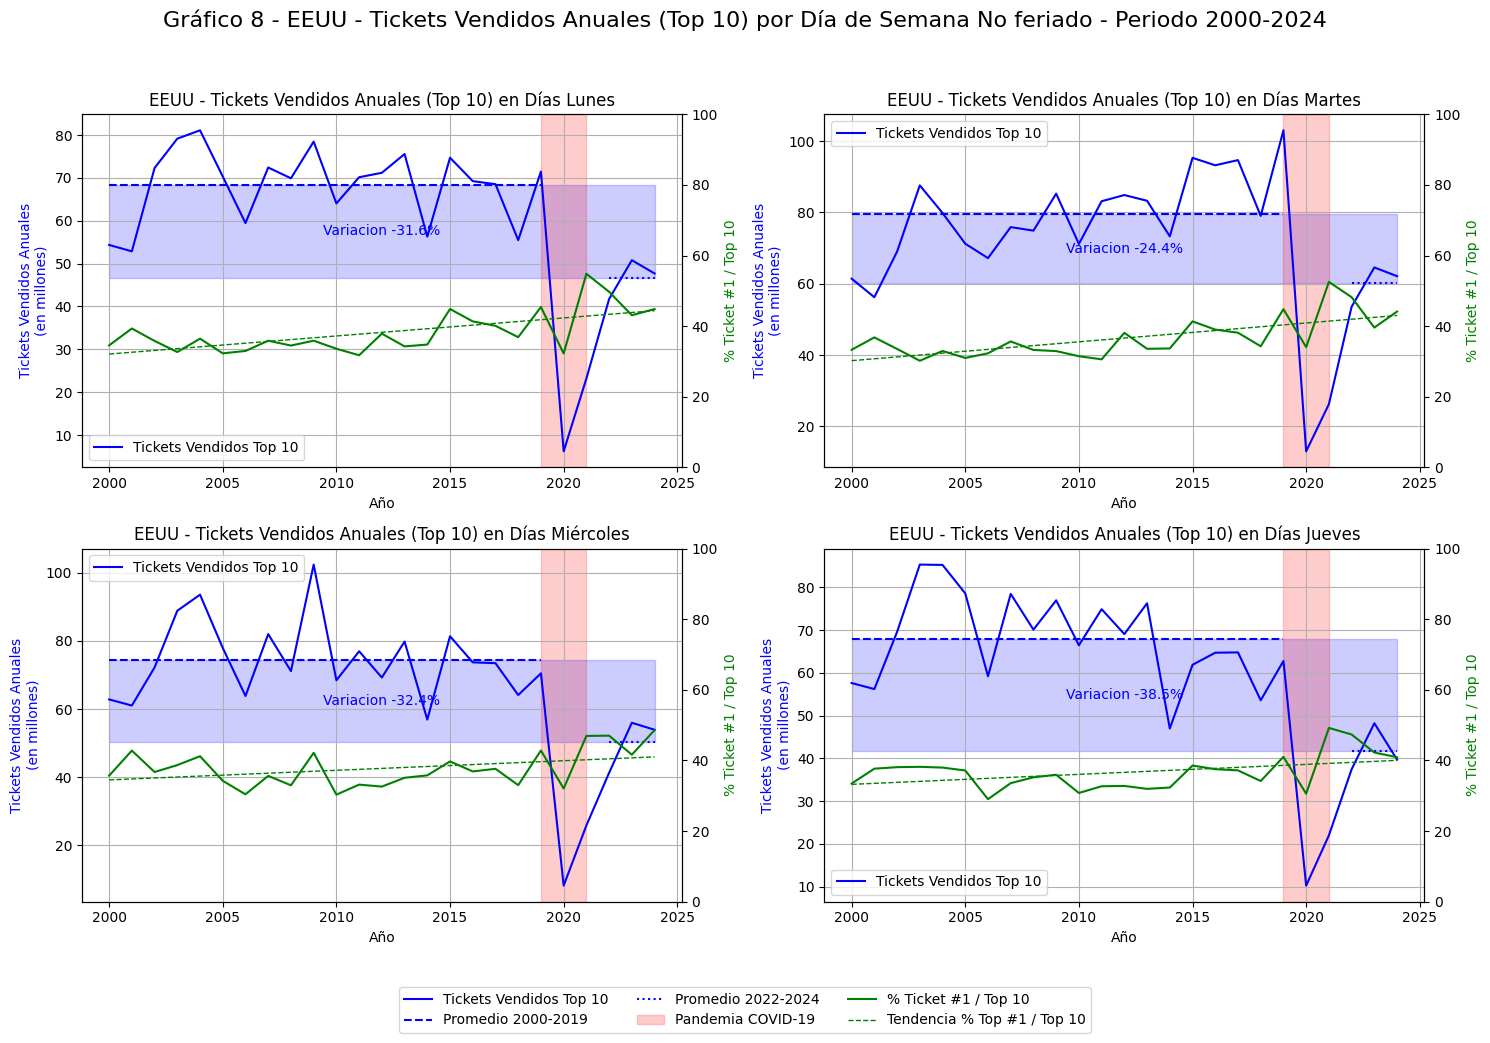

In [52]:
# Filtro los datos entre el 2000 y el 2024
df_filtered_daily = dfTaquillaDiariaTop10_1989_2024[(dfTaquillaDiariaTop10_1989_2024['Year'] >= 2000) & (dfTaquillaDiariaTop10_1989_2024['Year'] <= 2024)].copy()

# Filtro por dia de la semana ('Monday', 'Tuesday', 'Wednesday', 'Thursday') con valor 'Normal' en primary_event y  NaN en secondary_event
weekdays_to_plot = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
spanish_day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves']


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Aplico Flatten() al array de ejes para facilitar la iteracion

fig.suptitle('Gráfico 8 - EEUU - Tickets Vendidos Anuales (Top 10) por Día de Semana No feriado - Periodo 2000-2024', fontsize=16)

all_lines = []
all_labels = []

for i, day in enumerate(weekdays_to_plot):
    df_day = df_filtered_daily[(df_filtered_daily['Day'] == day) &
                               (df_filtered_daily['Event_Primary'] == 'Normal') &
                               (df_filtered_daily['Event_Secondary'].isna())].copy()

    # Calculo suma anual de 'Top_10_tickets_sold' y '#1_tickets_sold' para el dia
    df_yearly_tickets = df_day.groupby('Year')[['Top_10_tickets_sold', '#1_tickets_sold']].sum().reset_index()

    # Calculo el % para #1_tickets_sold respecto a Top_10_tickets_sold
    df_yearly_tickets['#1_Percentage'] = (df_yearly_tickets['#1_tickets_sold'] / df_yearly_tickets['Top_10_tickets_sold']) * 100


    # Calculo promedio 'Top_10_tickets_sold' para 2000-2019 y 2022-2024
    avg_tickets_2000_2019 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2000) & (df_yearly_tickets['Year'] <= 2019)]['Top_10_tickets_sold'].mean()
    avg_tickets_2022_2024 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2022) & (df_yearly_tickets['Year'] <= 2024)]['Top_10_tickets_sold'].mean()

    # Calculo variacion % para Top_10_tickets_sold
    if avg_tickets_2000_2019 != 0:
        perc_change = ((avg_tickets_2022_2024 - avg_tickets_2000_2019) / avg_tickets_2000_2019) * 100
    else:
        perc_change = 0

    # Creo eje Y secundario
    ax2 = axes[i].twinx()

    # Plot de 'Top_10_tickets_sold' en el eje Y principal
    line1 = sns.lineplot(data=df_yearly_tickets, x='Year', y='Top_10_tickets_sold', ax=axes[i], label='Tickets Vendidos Top 10', color='blue')

    # Plot de '#1_Percentage' en el eje Y secundario
    line2 = sns.lineplot(data=df_yearly_tickets, x='Year', y='#1_Percentage', ax=ax2, label='% Ticket #1 / Top 10', color='green')


    # Agrego lineas horizontales para los promedios
    line3 = axes[i].hlines(y=avg_tickets_2000_2019, xmin=2000, xmax=2019, color='blue', linestyle='--', lw=1.5, label=f'Promedio 2000-2019')
    line4 = axes[i].hlines(y=avg_tickets_2022_2024, xmin=2022, xmax=2024, color='blue', linestyle=':', lw=1.5, label=f'Promedio 2022-2024')

    # Sombreo el area entre las lineas de promedios
    axes[i].fill_between([2000, 2024], avg_tickets_2000_2019, avg_tickets_2022_2024, color='blue', alpha=0.2)

    # Sombreo el periodo de la pandemia COVID-19
    patch = axes[i].axvspan(2019, 2021, color='red', alpha=0.2, label='Pandemia COVID-19')

    # Linea de tendencia de la participacion de la pelicula #1
    line_trend = sns.regplot(
    data=df_yearly_tickets,
    x='Year',
    y='#1_Percentage',
    ax=ax2,
    scatter=False,
    ci=None,
    color='green',
    label='Tendencia % Top #1 / Top 10',
    line_kws={"linestyle": "--", "linewidth": 1}
    )

    # Agrego texto con la variacion % centrado en el area
    axes[i].text(2012, (avg_tickets_2000_2019 + avg_tickets_2022_2024) / 2,
             f'Variacion {perc_change:.1f}%', color='blue',
             fontsize=10, ha='center', va='center')


    axes[i].set_title(f'EEUU - Tickets Vendidos Anuales (Top 10) en Días {spanish_day_names[i]}')
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Tickets Vendidos Anuales\n(en millones)', color='blue')
    ax2.set_ylabel('% Ticket #1 / Top 10', color='green')

    # seteo rango del eje Y secundario
    ax2.set_ylim(0, 100)


    axes[i].grid(True)

    # Seteo formato del eje Y principal
    formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))
    axes[i].yaxis.set_major_formatter(formatter)

    # Preparo los datos de las referencias y sus etiquetas
    lines1, labels1 = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    # Solo agrega 1 etiqueta a las referencias generales
    for handle, label in zip(lines1 + lines2, labels1 + labels2):
      if label not in all_labels:
        all_lines.append(handle)
        all_labels.append(label)

    ax2.legend_.remove() # Remove the duplicate legend from the second axis


# cuadro de referencias unico
fig.legend(all_lines, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Ajusto el layout para prevenir el solapamiento entre titulo y etiquetas
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjusto rect para hacer espacio para el titulo y las referencias
plt.show()

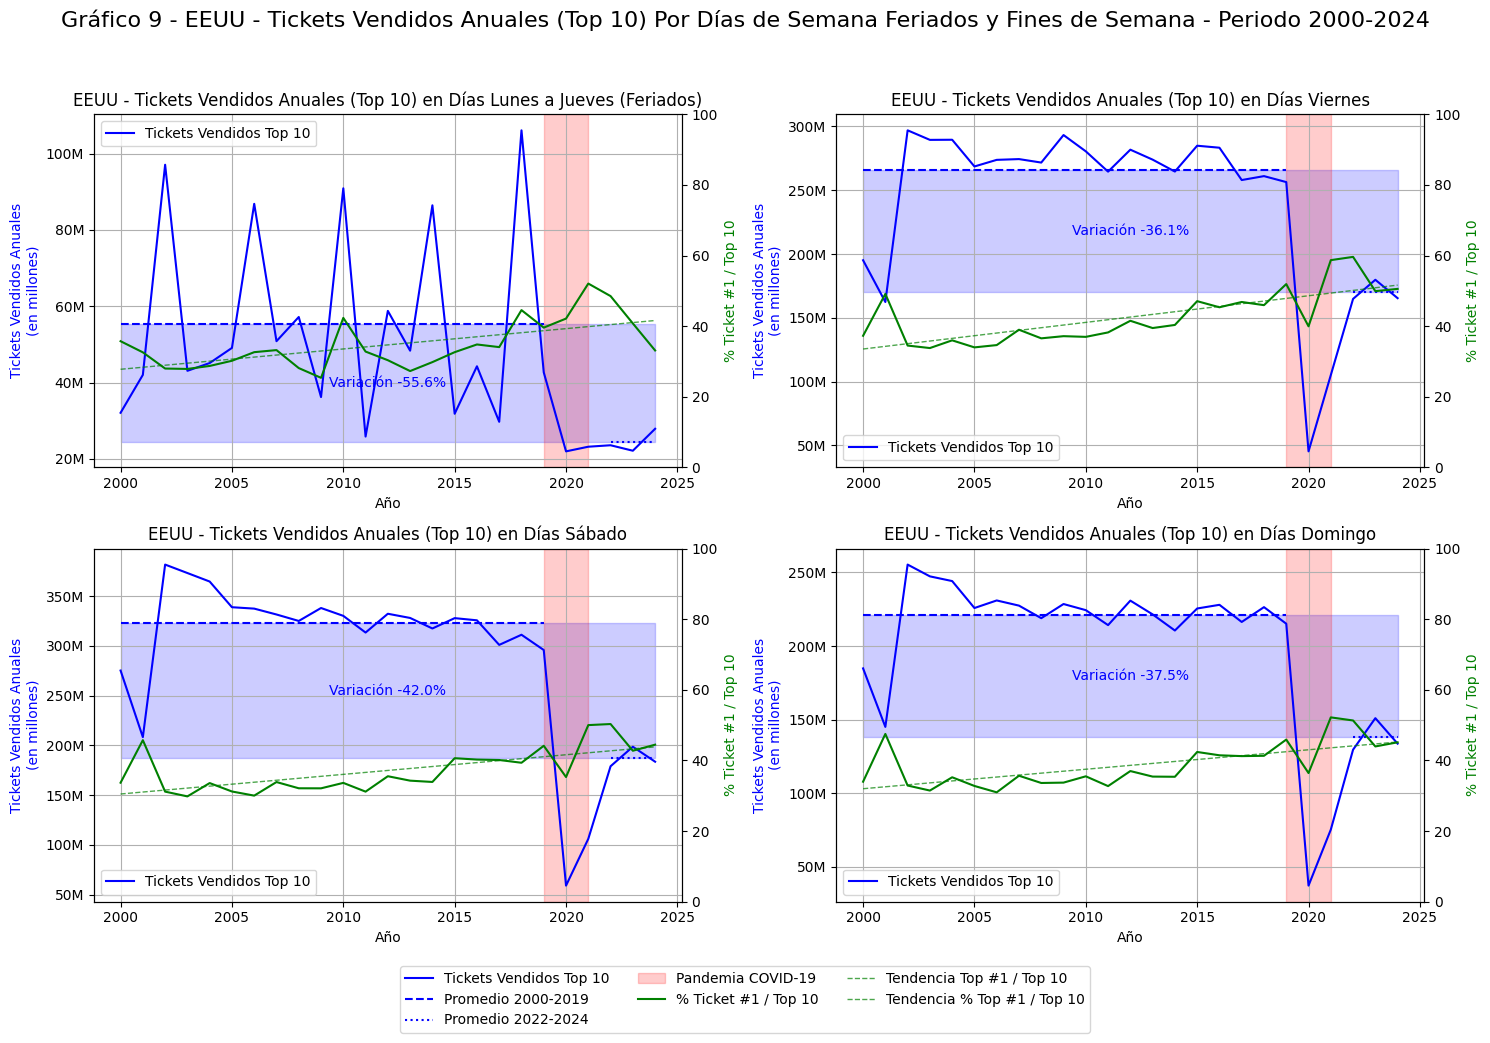

In [53]:
# --- Definiciones ---
weekdays_group = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
weekend_days = ['Friday', 'Saturday', 'Sunday']
spanish_day_names = {
    'weekdays': 'Lunes a Jueves (Feriados)',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

fig.suptitle('Gráfico 9 - EEUU - Tickets Vendidos Anuales (Top 10) Por Días de Semana Feriados y Fines de Semana - Periodo 2000-2024', fontsize=16)

all_lines = []
all_labels = []

# Lunes a Jueves agrupados (solo especiales/feriados)
df_weekdays = df_filtered_daily[(df_filtered_daily['Day'].isin(weekdays_group)) &
                                (~((df_filtered_daily['Event_Primary'] == 'Normal') &
                                   (df_filtered_daily['Event_Secondary'].isna())))].copy()

df_yearly_tickets = df_weekdays.groupby('Year')[['Top_10_tickets_sold', '#1_tickets_sold']].sum().reset_index()
df_yearly_tickets['#1_Percentage'] = (df_yearly_tickets['#1_tickets_sold'] / df_yearly_tickets['Top_10_tickets_sold']) * 100

# Promedios
avg_tickets_2000_2019 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2000) & (df_yearly_tickets['Year'] <= 2019)]['Top_10_tickets_sold'].mean()
avg_tickets_2022_2024 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2022) & (df_yearly_tickets['Year'] <= 2024)]['Top_10_tickets_sold'].mean()
perc_change = ((avg_tickets_2022_2024 - avg_tickets_2000_2019) / avg_tickets_2000_2019) * 100 if avg_tickets_2000_2019 != 0 else 0

ax = axes[0]
ax2 = ax.twinx()

sns.lineplot(data=df_yearly_tickets, x='Year', y='Top_10_tickets_sold', ax=ax, label='Tickets Vendidos Top 10', color='blue')
sns.lineplot(data=df_yearly_tickets, x='Year', y='#1_Percentage', ax=ax2, label='% Ticket #1 / Top 10', color='green')

ax.hlines(y=avg_tickets_2000_2019, xmin=2000, xmax=2019, color='blue', linestyle='--', lw=1.5, label='Promedio 2000-2019')
ax.hlines(y=avg_tickets_2022_2024, xmin=2022, xmax=2024, color='blue', linestyle=':', lw=1.5, label='Promedio 2022-2024')
ax.fill_between([2000, 2024], avg_tickets_2000_2019, avg_tickets_2022_2024, color='blue', alpha=0.2)

ax.axvspan(2019, 2021, color='red', alpha=0.2, label='Pandemia COVID-19')

sns.regplot(
    data=df_yearly_tickets, x='Year', y='#1_Percentage', ax=ax2,
    scatter=False, ci=None, color='green',
    label='Tendencia Top #1 / Top 10',
    line_kws={"linestyle": "--", "linewidth": 1, "alpha": 0.7}
)

ax.text(2012, (avg_tickets_2000_2019 + avg_tickets_2022_2024) / 2,
        f'Variación {perc_change:.1f}%', color='blue', fontsize=10, ha='center', va='center')

ax.set_title(f'EEUU - Tickets Vendidos Anuales (Top 10) en Días {spanish_day_names['weekdays']}')
ax.set_xlabel('Año')
ax.set_ylabel('Tickets Vendidos Anuales\n(en millones)', color='blue')
ax2.set_ylabel('% Ticket #1 / Top 10', color='green')
ax2.set_ylim(0, 100)
ax.grid(True)

formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6))
ax.yaxis.set_major_formatter(formatter)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
for handle, label in zip(lines1 + lines2, labels1 + labels2):
    if label not in all_labels:
        all_lines.append(handle)
        all_labels.append(label)
ax2.legend_.remove()


# Fines de semana (un subplot cada uno)
for j, day in enumerate(weekend_days, start=1):
    df_day = df_filtered_daily[df_filtered_daily['Day'] == day].copy()

    df_yearly_tickets = df_day.groupby('Year')[['Top_10_tickets_sold', '#1_tickets_sold']].sum().reset_index()
    df_yearly_tickets['#1_Percentage'] = (df_yearly_tickets['#1_tickets_sold'] / df_yearly_tickets['Top_10_tickets_sold']) * 100

    avg_tickets_2000_2019 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2000) & (df_yearly_tickets['Year'] <= 2019)]['Top_10_tickets_sold'].mean()
    avg_tickets_2022_2024 = df_yearly_tickets[(df_yearly_tickets['Year'] >= 2022) & (df_yearly_tickets['Year'] <= 2024)]['Top_10_tickets_sold'].mean()
    perc_change = ((avg_tickets_2022_2024 - avg_tickets_2000_2019) / avg_tickets_2000_2019) * 100 if avg_tickets_2000_2019 != 0 else 0

    ax = axes[j]
    ax2 = ax.twinx()

    sns.lineplot(data=df_yearly_tickets, x='Year', y='Top_10_tickets_sold', ax=ax, label='Tickets Vendidos Top 10', color='blue')
    sns.lineplot(data=df_yearly_tickets, x='Year', y='#1_Percentage', ax=ax2, label='% Ticket #1 / Top 10', color='green')

    ax.hlines(y=avg_tickets_2000_2019, xmin=2000, xmax=2019, color='blue', linestyle='--', lw=1.5, label='Promedio 2000-2019')
    ax.hlines(y=avg_tickets_2022_2024, xmin=2022, xmax=2024, color='blue', linestyle=':', lw=1.5, label='Promedio 2022-2024')
    ax.fill_between([2000, 2024], avg_tickets_2000_2019, avg_tickets_2022_2024, color='blue', alpha=0.2)

    ax.axvspan(2019, 2021, color='red', alpha=0.2, label='Pandemia COVID-19')

    sns.regplot(
        data=df_yearly_tickets, x='Year', y='#1_Percentage', ax=ax2,
        scatter=False, ci=None, color='green',
        label='Tendencia % Top #1 / Top 10',
        line_kws={"linestyle": "--", "linewidth": 1, "alpha": 0.7}
    )

    ax.text(2012, (avg_tickets_2000_2019 + avg_tickets_2022_2024) / 2,
            f'Variación {perc_change:.1f}%', color='blue', fontsize=10, ha='center', va='center')

    #ax.set_title(spanish_day_names[day])
    ax.set_title(f'EEUU - Tickets Vendidos Anuales (Top 10) en Días {spanish_day_names[day]}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Tickets Vendidos Anuales\n(en millones)', color='blue')
    ax2.set_ylabel('% Ticket #1 / Top 10', color='green')
    ax2.set_ylim(0, 100)
    ax.grid(True)

    ax.yaxis.set_major_formatter(formatter)

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    for handle, label in zip(lines1 + lines2, labels1 + labels2):
        if label not in all_labels:
            all_lines.append(handle)
            all_labels.append(label)
    ax2.legend_.remove()

# --- Leyenda general ---
fig.legend(all_lines, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


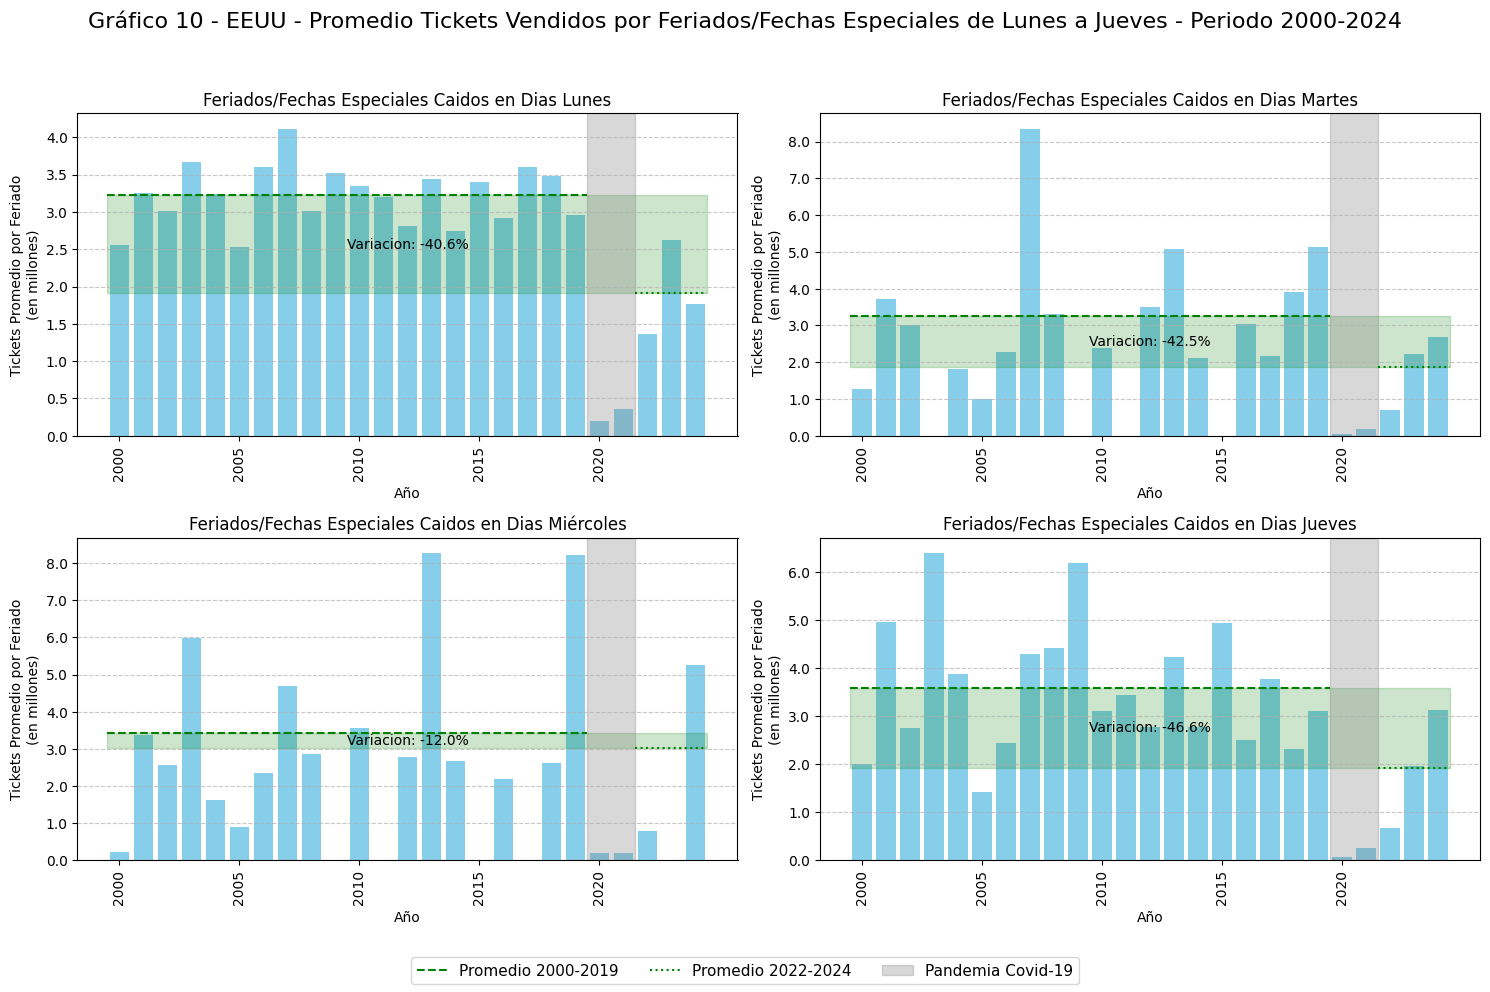

In [54]:
# --- Días de Lunes a Viernes ---
weekdays_group = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
spanish_day_names = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves'
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

fig.suptitle('Gráfico 10 - EEUU - Promedio Tickets Vendidos por Feriados/Fechas Especiales de Lunes a Jueves - Periodo 2000-2024', fontsize=16)

for i, day in enumerate(weekdays_group):
    ax = axes[i]

    # Filtro solo feriados/eventos de ese día
    df_day = df_filtered_daily[(df_filtered_daily['Day'] == day) &
                               (~((df_filtered_daily['Event_Primary'] == 'Normal') &
                                  (df_filtered_daily['Event_Secondary'].isna())))].copy()

    if df_day.empty:
        ax.set_title(f'{spanish_day_names[day]} - Sin datos')
        ax.axis('off')
        continue

    # Agrupo por año
    df_yearly = df_day.groupby('Year').agg(
        total_tickets=('Top_10_tickets_sold', 'sum'),
        n_events=('Day', 'count')
    ).reset_index()
    df_yearly['avg_per_event'] = df_yearly['total_tickets'] / df_yearly['n_events']

    # --- Barras manuales ---
    ax.bar(df_yearly['Year'], df_yearly['avg_per_event'], color='skyblue')

    # --- Líneas de promedio ---
    avg_2000_2019 = df_yearly[(df_yearly['Year'] >= 2000) & (df_yearly['Year'] <= 2019)]['avg_per_event'].mean()
    avg_2022_2024 = df_yearly[(df_yearly['Year'] >= 2022) & (df_yearly['Year'] <= 2024)]['avg_per_event'].mean()

    ax.hlines(y=avg_2000_2019, xmin=1999.5, xmax=2019.5, color='green', linestyle='--', lw=1.5, label='Promedio 2000-2019')
    ax.hlines(y=avg_2022_2024, xmin=2021.5, xmax=2024.5,color='green', linestyle=':', lw=1.5, label='Promedio 2022-2024')

    # Sombreado área entre promedios
    ax.fill_between([1999.5, 2024.5], avg_2000_2019, avg_2022_2024, color='green', alpha=0.2)

    # Texto diferencia
    if not np.isnan(avg_2000_2019) and not np.isnan(avg_2022_2024):
        varPromedios = ((avg_2022_2024 - avg_2000_2019)/avg_2000_2019)*100
        ax.text((2000+2024)/2, (avg_2000_2019 + avg_2022_2024)/2,
                f"Variacion: {varPromedios:.1f}%",
                ha='center', va='center', fontsize=10, color='black')

    # Sombreado pandemia 2020-2021
    ax.axvspan(2019.5, 2021.5, color='gray', alpha=0.3, label='Pandemia Covid-19' if i==0 else "")

    # --- Formato ejes ---
    ax.set_title(f'Feriados/Fechas Especiales Caidos en Dias {spanish_day_names[day]}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Tickets Promedio por Feriado\n(en millones)')

    formatter = mticker.FuncFormatter(lambda x, _: '{:.1f}'.format(x / 1e6))
    ax.yaxis.set_major_formatter(formatter)

    # Ticks del eje X cada 5 años
    xticks = np.arange(2000, 2025, 5)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=90)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Elimino subplot vacío si queda
if len(axes) > len(weekdays_group):
    axes[-1].axis('off')

# --- Legend global ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=11)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

#### Analisis del Impacto de los lanzamientos relevantes de streaming (14 dias antes y despues de la fecha) en la taquillña del Top 10

In [55]:
dfTaquillaDiariaTop10_1989_2024["Date_Normalized"] = pd.to_datetime(
    dfTaquillaDiariaTop10_1989_2024["Date_Normalized"],
    errors="coerce",   # pone NaT si no puede parsear
    dayfirst=False      # ajusta según el formato de tus fechas
)

In [56]:
estrenos_streaming_data = [
    {"Year":2019,"Nombre":"Stranger Things (S3)","Service":"Netflix","Release":"2019-07-04"},
    {"Year":2022,"Nombre":"Stranger Things (S4 P1)","Service":"Netflix","Release":"2022-05-27"},
    {"Year":2022,"Nombre":"Stranger Things (S4 P2)","Service":"Netflix","Release":"2022-07-01"},
    {"Year":2019,"Nombre":"The Crown (S3)","Service":"Netflix","Release":"2019-11-17"},
    {"Year":2022,"Nombre":"The Crown (S5)","Service":"Netflix","Release":"2022-11-09"},
    {"Year":2023,"Nombre":"The Crown (S6 P1)","Service":"Netflix","Release":"2023-11-16"},
    {"Year":2023,"Nombre":"The Crown (S6 P2)","Service":"Netflix","Release":"2023-12-14"},
    {"Year":2022,"Nombre":"Wednesday","Service":"Netflix","Release":"2022-11-23"},
    {"Year":2022,"Nombre":"Bridgerton (S2)","Service":"Netflix","Release":"2022-03-25"},
    {"Year":2024,"Nombre":"Bridgerton (S3)","Service":"Netflix","Release":"2024-05-16"},
    {"Year":2022,"Nombre":"Dahmer","Service":"Netflix","Release":"2022-09-21"},
    {"Year":2024,"Nombre":"Squid Game (S2)","Service":"Netflix","Release":"2024-12-26"}
]
# Crea DataFrame
dfestrenosStreaming = pd.DataFrame(estrenos_streaming_data)
dfestrenosStreaming['Release'] = pd.to_datetime(dfestrenosStreaming['Release'], errors="coerce")

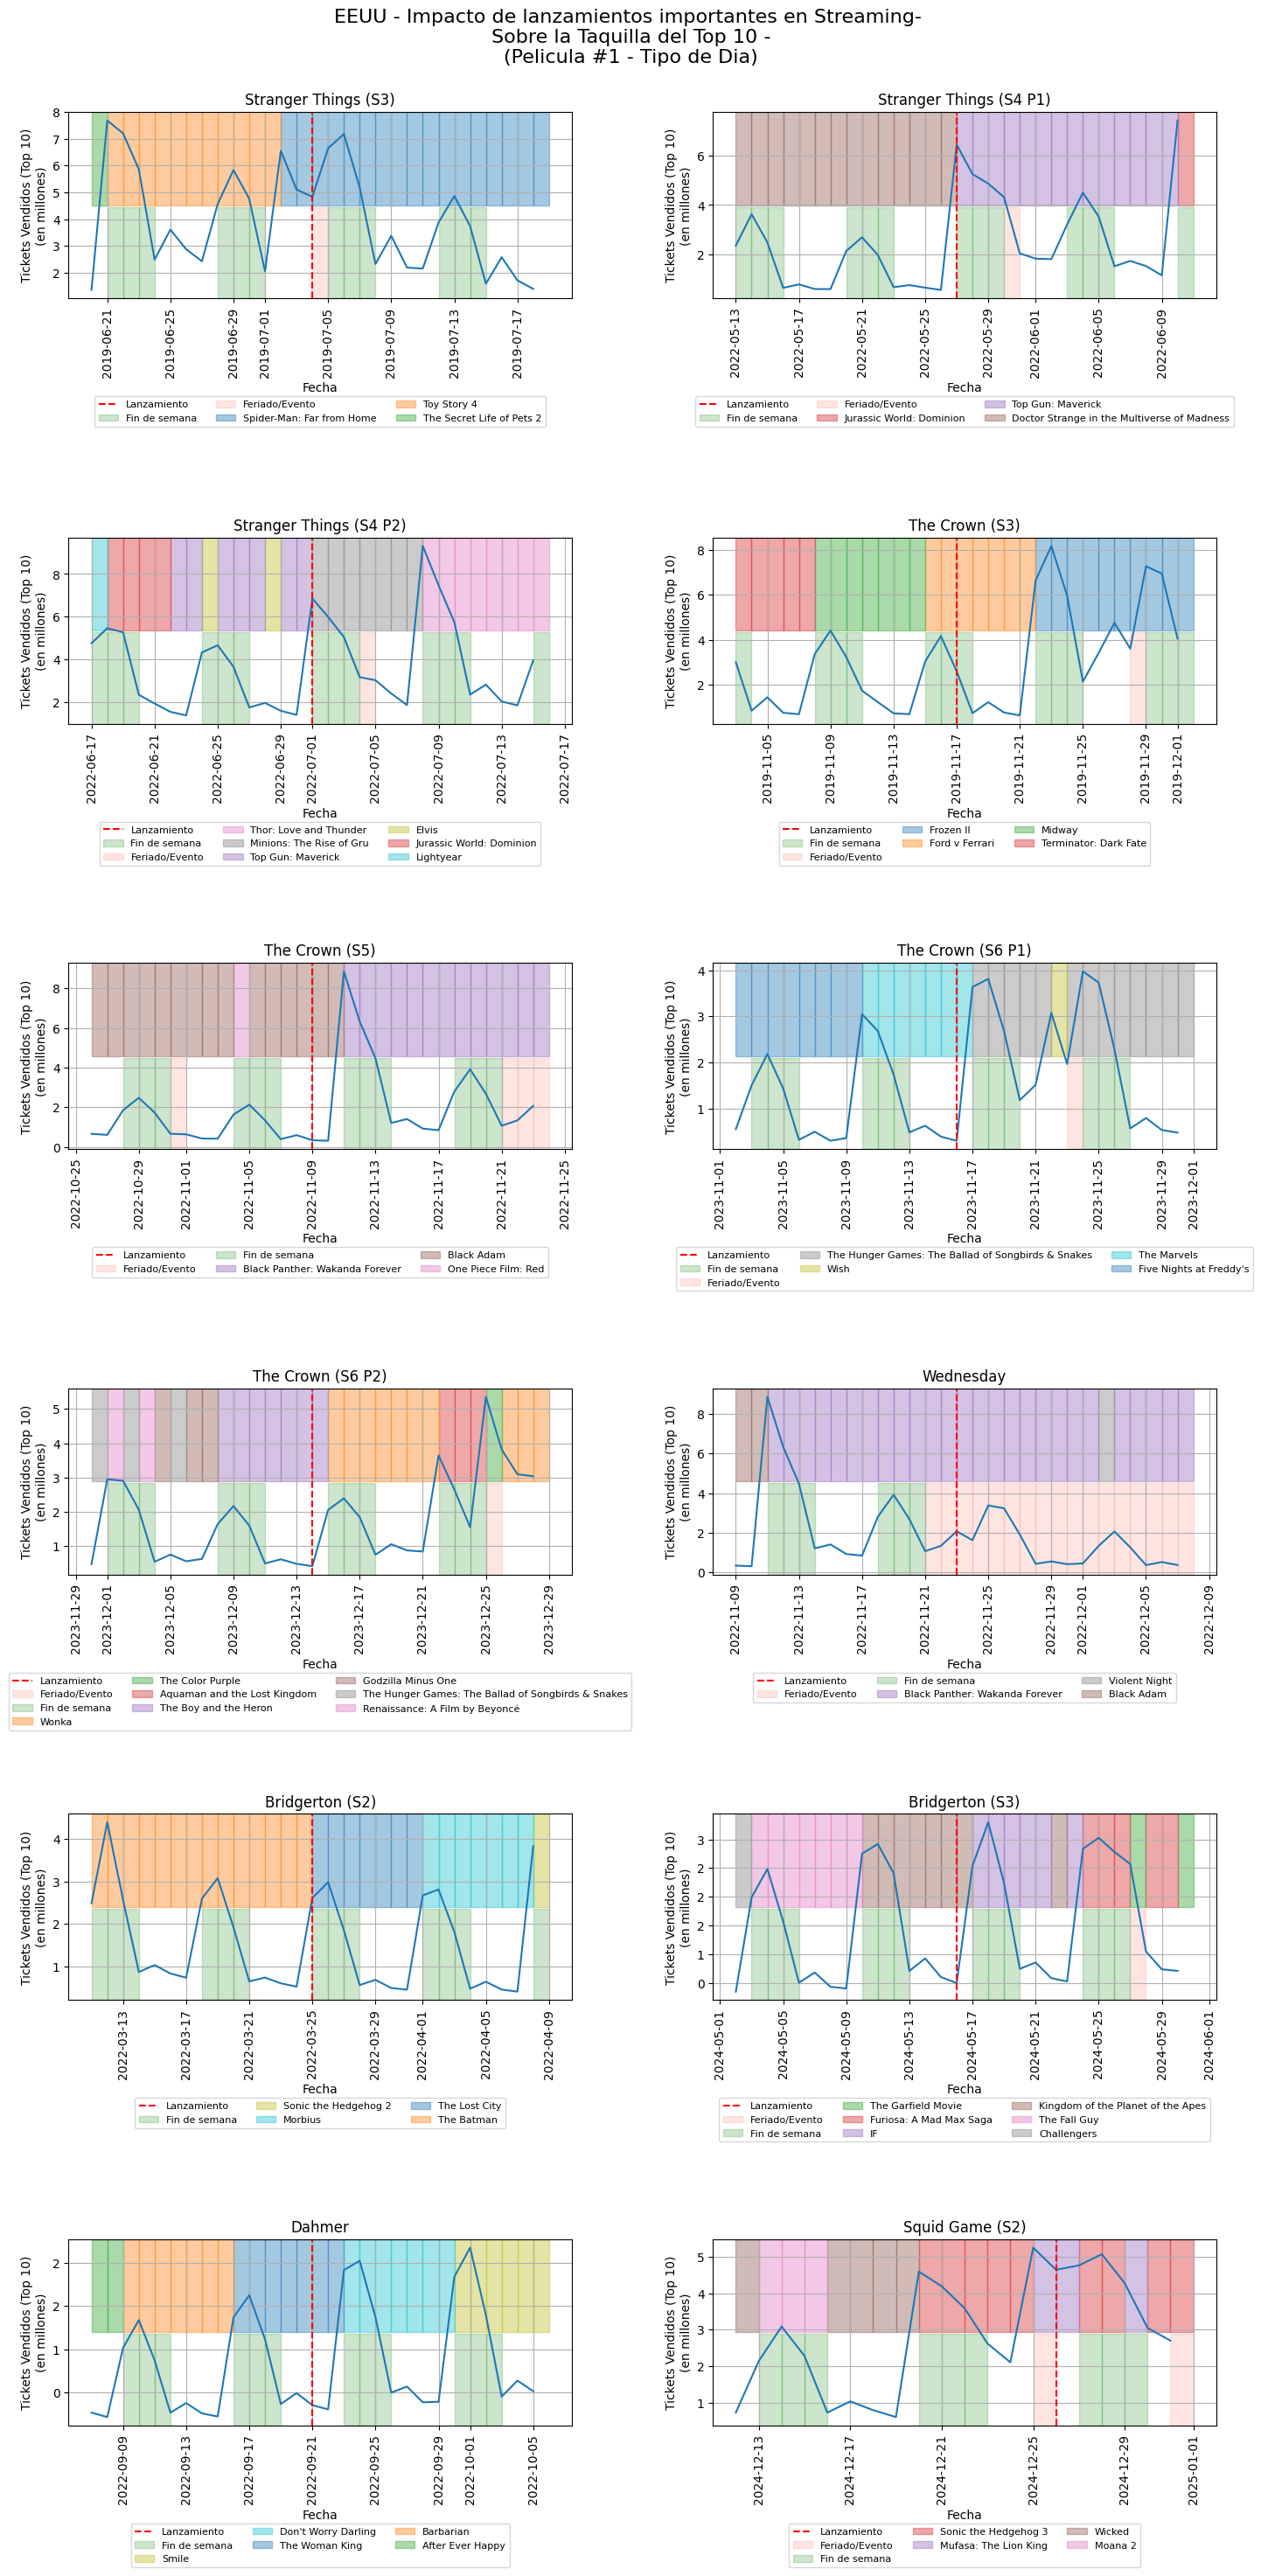

In [57]:
# Cantidad de lanzamientos
n = len(dfestrenosStreaming)

# Crea figura con 2 gráficos por fila
fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(15, 5 * ((n + 1) // 2)))
axes = axes.flatten()

# Paleta de colores para las películas #1_Release
palette = sns.color_palette("tab10", 10)
color_map = {}

for i, row in dfestrenosStreaming.iterrows():
    nombre = row['Nombre']             # Columna con el nombre de la serie/película
    release_date = row.iloc[3]         # Columna de la fecha de estreno (o row['Fecha_Estreno'])

    start_date = release_date - pd.Timedelta(days=14)
    end_date = release_date + pd.Timedelta(days=14)

    # Filtra data de taquilla
    dfimpacto = dfTaquillaDiariaTop10_1989_2024[
        (dfTaquillaDiariaTop10_1989_2024['Date_Normalized'] >= start_date) &
        (dfTaquillaDiariaTop10_1989_2024['Date_Normalized'] <= end_date)
    ].copy()

    ax = axes[i]

    # Plot
    sns.lineplot(data=dfimpacto, x='Date_Normalized', y='Top_10_tickets_sold', ax=ax)

    # Línea vertical de estreno
    ax.axvline(x=release_date, color='red', linestyle='--', label="Lanzamiento")

    # Sombreado días de fin de semana / feriado (mitad inferior)
    for _, r in dfimpacto.iterrows():
        if r['Event_Primary'] == "Weekend":
            ax.axvspan(r['Date_Normalized'].normalize(),
                       r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                       color='green', alpha=0.2, ymin=0, ymax=0.49, label='Fin de semana')
        elif r['Event_Primary'] != "Normal":
            ax.axvspan(r['Date_Normalized'].normalize(),
                       r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                       color='salmon', alpha=0.2, ymin=0, ymax=0.49, label='Feriado/Evento')

    # Sombreado días con #1_Release (mitad superior)
    for _, r in dfimpacto.iterrows():
        if pd.notna(r.get('#1_Release', None)):
            peli = r['#1_Release']
            if peli not in color_map:
                color_map[peli] = palette[len(color_map) % len(palette)]
            ax.axvspan(r['Date_Normalized'].normalize(),
                       r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                       color=color_map[peli], alpha=0.4, ymin=0.5, ymax=1, label=peli)

    # Evita múltiples leyendas duplicadas
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    #ax.legend(unique.values(), unique.keys(), fontsize=8, loc='lower center')
    ax.legend(unique.values(), unique.keys(), fontsize=8,
          loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
    # Formato
    ax.set_title(nombre, fontsize=12)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Tickets Vendidos (Top 10)\n(en millones)")
    ax.tick_params(axis='x', rotation=90)

    # Eje Y en millones
    formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))
    ax.yaxis.set_major_formatter(formatter)
    ax.grid(True)

# Título general
fig.suptitle("EEUU - Impacto de lanzamientos importantes en Streaming- \nSobre la Taquilla del Top 10 -\n(Pelicula #1 - Tipo de Dia)", fontsize=16, y=1.0)

plt.tight_layout()
plt.show()


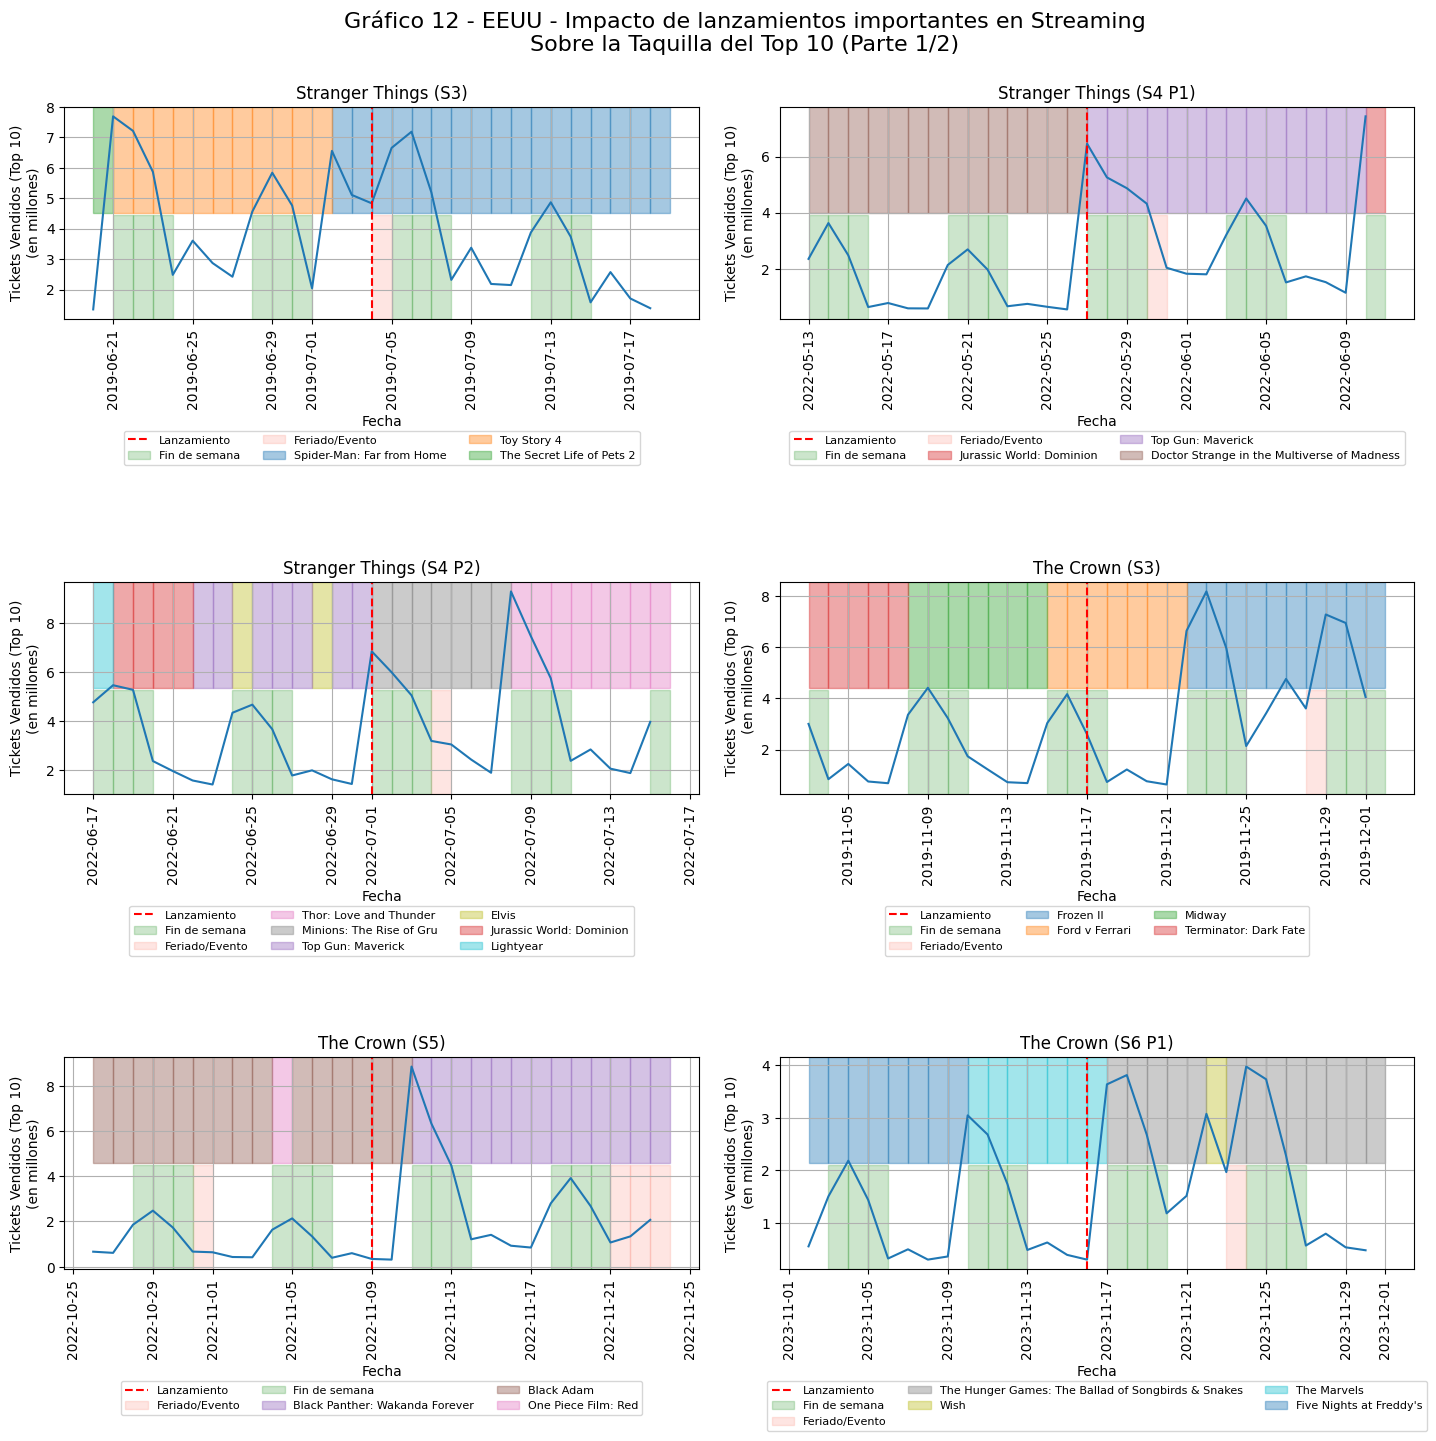

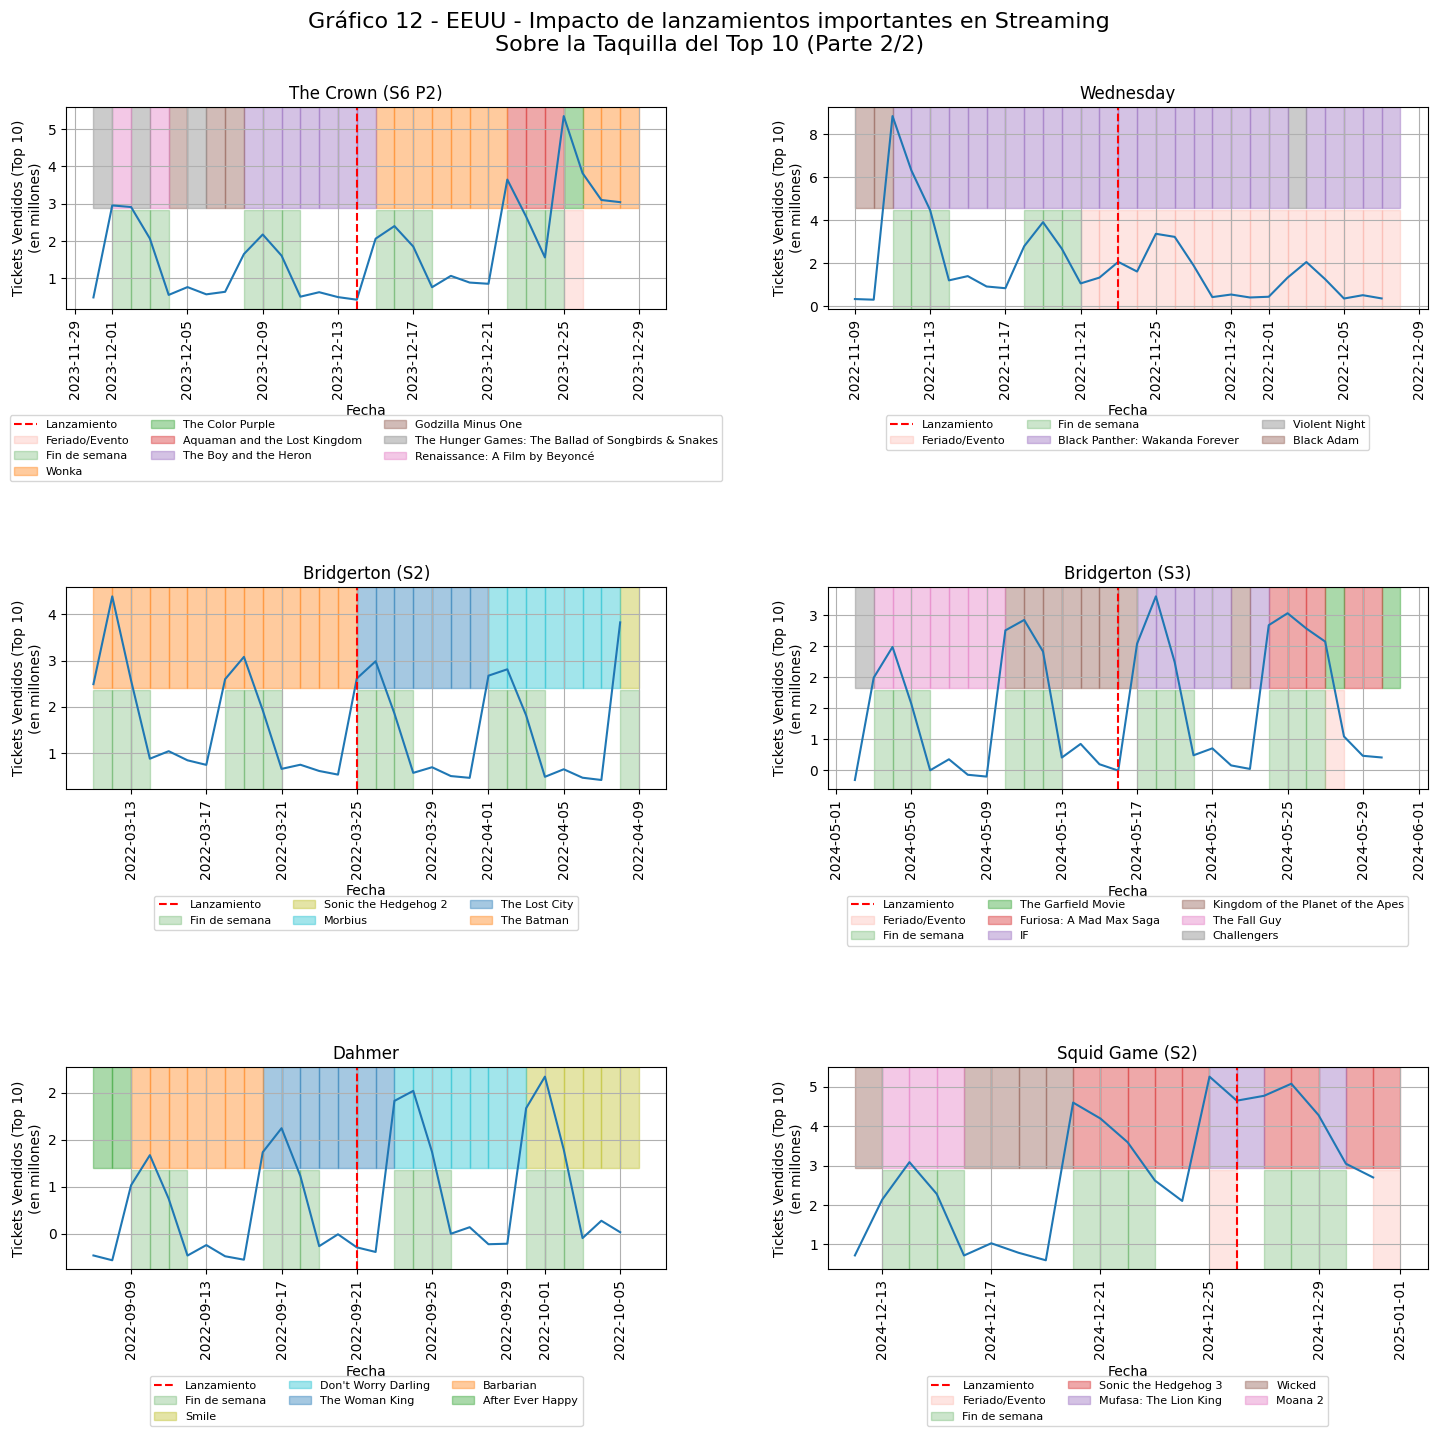

In [58]:
# ========================================
# Separar en bloques de 3 filas (máx 6 plots por página)
# ========================================

n = len(dfestrenosStreaming)
plots_per_page = 6   # (3 filas × 2 columnas)
num_pages = (n + plots_per_page - 1) // plots_per_page

palette = sns.color_palette("tab10", 10)
color_map = {}

for page in range(num_pages):
    start_idx = page * plots_per_page
    end_idx = min((page + 1) * plots_per_page, n)
    subset = dfestrenosStreaming.iloc[start_idx:end_idx]

    # Cantidad de filas para esta página
    rows = math.ceil(len(subset) / 2)

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, (idx, row) in enumerate(subset.iterrows()):
        nombre = row['Nombre']             # Columna con nombre
        release_date = row.iloc[3]         # Fecha de estreno
        start_date = release_date - pd.Timedelta(days=14)
        end_date = release_date + pd.Timedelta(days=14)

        # Filtra data de taquilla
        dfimpacto = dfTaquillaDiariaTop10_1989_2024[
            (dfTaquillaDiariaTop10_1989_2024['Date_Normalized'] >= start_date) &
            (dfTaquillaDiariaTop10_1989_2024['Date_Normalized'] <= end_date)
        ].copy()

        ax = axes[i]

        # Plot línea principal
        sns.lineplot(data=dfimpacto, x='Date_Normalized', y='Top_10_tickets_sold', ax=ax)

        # Línea vertical de estreno
        ax.axvline(x=release_date, color='red', linestyle='--', label="Lanzamiento")

        # ==============================
        # Sombreado fines de semana/feriados
        # ==============================
        for _, r in dfimpacto.iterrows():
            if r['Event_Primary'] == "Weekend":
                ax.axvspan(r['Date_Normalized'].normalize(),
                           r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                           color='green', alpha=0.2, ymin=0, ymax=0.49, label='Fin de semana')
            elif r['Event_Primary'] != "Normal":
                ax.axvspan(r['Date_Normalized'].normalize(),
                           r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                           color='salmon', alpha=0.2, ymin=0, ymax=0.49, label='Feriado/Evento')

        # ==============================
        # Sombreado #1 Release (mitad sup.)
        # ==============================
        for _, r in dfimpacto.iterrows():
            if pd.notna(r.get('#1_Release', None)):
                peli = r['#1_Release']
                if peli not in color_map:
                    color_map[peli] = palette[len(color_map) % len(palette)]
                ax.axvspan(r['Date_Normalized'].normalize(),
                           r['Date_Normalized'].normalize() + pd.Timedelta(days=1),
                           color=color_map[peli], alpha=0.4, ymin=0.5, ymax=1, label=peli)

        # ==============================
        # Ajustes de formato
        # ==============================
        handles, labels = ax.get_legend_handles_labels()
        unique = dict(zip(labels, handles))
        ax.legend(unique.values(), unique.keys(), fontsize=8,
                  loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

        ax.set_title(nombre, fontsize=12)
        ax.set_xlabel("Fecha")
        ax.set_ylabel("Tickets Vendidos (Top 10)\n(en millones)")
        ax.tick_params(axis='x', rotation=90)

        formatter = mticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6))
        ax.yaxis.set_major_formatter(formatter)
        ax.grid(True)

    # Eliminar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # ==============================
    # Título general por página
    # ==============================
    fig.suptitle(f"Gráfico 12 - EEUU - Impacto de lanzamientos importantes en Streaming\n"
                 f"Sobre la Taquilla del Top 10 (Parte {page+1}/{num_pages})",
                 fontsize=16, y=1.0)

    plt.tight_layout()
    plt.show()


#### Analisis del Impacto de los mundiales en la Taquilla del Top 10

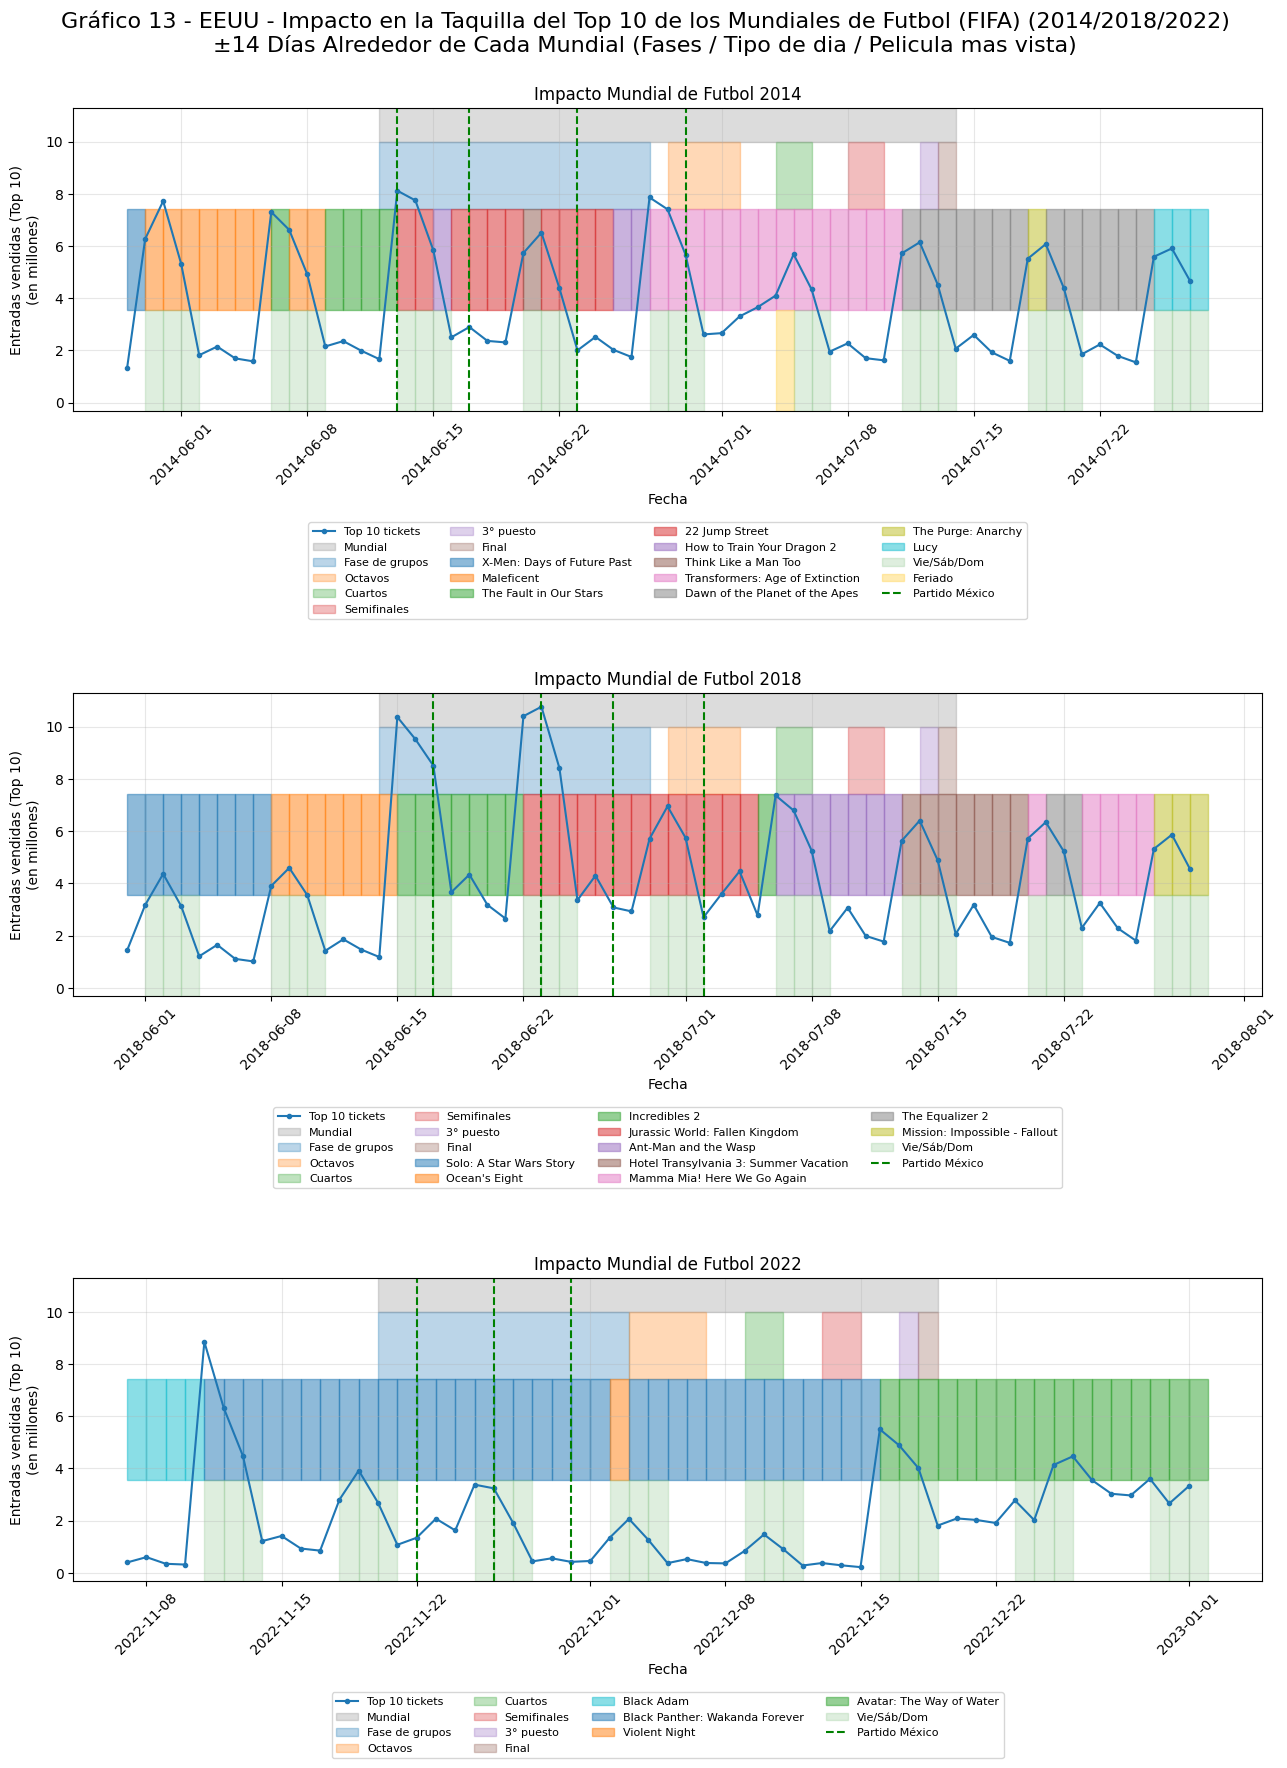

In [59]:
# ==========================================
# Fechas oficiales de Mundiales y fases
# ==========================================
wc_periods = {
    2014: {
        "start": pd.Timestamp("2014-06-12"),
        "end": pd.Timestamp("2014-07-13"),
        "groups": (pd.Timestamp("2014-06-12"), pd.Timestamp("2014-06-26")),
        "round16": (pd.Timestamp("2014-06-28"), pd.Timestamp("2014-07-01")),
        "quarters": (pd.Timestamp("2014-07-04"), pd.Timestamp("2014-07-05")),
        "semis": (pd.Timestamp("2014-07-08"), pd.Timestamp("2014-07-09")),
        "third": (pd.Timestamp("2014-07-12"), pd.Timestamp("2014-07-12")),
        "final": (pd.Timestamp("2014-07-13"), pd.Timestamp("2014-07-13")),
    },
    2018: {
        "start": pd.Timestamp("2018-06-14"),
        "end": pd.Timestamp("2018-07-15"),
        "groups": (pd.Timestamp("2018-06-14"), pd.Timestamp("2018-06-28")),
        "round16": (pd.Timestamp("2018-06-30"), pd.Timestamp("2018-07-03")),
        "quarters": (pd.Timestamp("2018-07-06"), pd.Timestamp("2018-07-07")),
        "semis": (pd.Timestamp("2018-07-10"), pd.Timestamp("2018-07-11")),
        "third": (pd.Timestamp("2018-07-14"), pd.Timestamp("2018-07-14")),
        "final": (pd.Timestamp("2018-07-15"), pd.Timestamp("2018-07-15")),
    },
    2022: {
        "start": pd.Timestamp("2022-11-20"),
        "end": pd.Timestamp("2022-12-18"),
        "groups": (pd.Timestamp("2022-11-20"), pd.Timestamp("2022-12-02")),
        "round16": (pd.Timestamp("2022-12-03"), pd.Timestamp("2022-12-06")),
        "quarters": (pd.Timestamp("2022-12-09"), pd.Timestamp("2022-12-10")),
        "semis": (pd.Timestamp("2022-12-13"), pd.Timestamp("2022-12-14")),
        "third": (pd.Timestamp("2022-12-17"), pd.Timestamp("2022-12-17")),
        "final": (pd.Timestamp("2022-12-18"), pd.Timestamp("2022-12-18")),
    },
}

phase_names = {
    "groups": "Fase de grupos",
    "round16": "Octavos",
    "quarters": "Cuartos",
    "semis": "Semifinales",
    "third": "3° puesto",
    "final": "Final",
}

phase_colors = {
    "groups": "#1f77b4",
    "round16": "#ff7f0e",
    "quarters": "#2ca02c",
    "semis": "#d62728",
    "third": "#9467bd",
    "final": "#8c564b",
}

# ==========================================
# Lista de partidos de México
# ==========================================
mexico_games = [
    pd.Timestamp("2014-06-13"),
    pd.Timestamp("2014-06-17"),
    pd.Timestamp("2014-06-23"),
    pd.Timestamp("2014-06-29"),
    pd.Timestamp("2018-06-17"),
    pd.Timestamp("2018-06-23"),
    pd.Timestamp("2018-06-27"),
    pd.Timestamp("2018-07-02"),
    pd.Timestamp("2022-11-22"),
    pd.Timestamp("2022-11-26"),
    pd.Timestamp("2022-11-30"),
]

# ==========================================
# Filtro base 2014–2023
# ==========================================
df = dfTaquillaDiariaTop10_1989_2024.copy()
df["Date_Normalized"] = pd.to_datetime(df["Date_Normalized"])
df = df[(df["Date_Normalized"] >= "2014-01-01") & (df["Date_Normalized"] <= "2023-12-31")]

# ==========================================
# Detecta bloques de 'World Cup'
# ==========================================
wc = df[df["Event_Primary"].str.contains("World Cup", case=False, na=False)].copy()
wc = wc.sort_values("Date_Normalized")
wc["block_id"] = wc["Date_Normalized"].diff().dt.days.fillna(0).gt(1).cumsum()
groups = [g for _, g in wc.groupby("block_id")]
n = len(groups)
if n == 0:
    raise ValueError("No se encontraron bloques con 'World Cup'.")

# ==========================================
# Subplots
# ==========================================
rows = len(groups)
fig, axes = plt.subplots(rows, 1, figsize=(13, 6*rows), sharey=True)
axes = np.atleast_1d(axes).flatten()

weekend_color = "#7fbf7f"   # verde suave
feriado_color = "#ffd966"   # amarillo suave
palette = sns.color_palette("tab10", 10)
color_map = {}

# ==========================================
# Grafica cada bloque
# ==========================================
for idx, group in enumerate(groups):
    ax = axes[idx]
    year = int(group["Date_Normalized"].min().year)

    start_range = group["Date_Normalized"].min() - pd.Timedelta(days=14)
    end_range = group["Date_Normalized"].max() + pd.Timedelta(days=14)
    sub = df[(df["Date_Normalized"] >= start_range) & (df["Date_Normalized"] <= end_range)].copy()
    sub = sub.sort_values("Date_Normalized")
    sub["gap"] = sub["Date_Normalized"].diff().dt.days
    sub.loc[sub["gap"] > 1, "Top_10_tickets_sold"] = np.nan

    # Serie Top 10 tickets
    ax.plot(sub["Date_Normalized"], sub["Top_10_tickets_sold"], marker=".", linestyle="-", label="Top 10 tickets")

    # --- Tercio superior: Mundial ---
    if year in wc_periods:
        p = wc_periods[year]
        ax.axvspan(p["start"], p["end"]+pd.Timedelta(days=1), ymin=8/9, ymax=1.0,
                   color="#777777", alpha=0.25, label="Mundial")

        # --- Tercio medio: fases ---
        for key in ["groups","round16","quarters","semis","third","final"]:
            s,e = p[key]
            s_clip = max(s,start_range)
            e_clip = min(e+pd.Timedelta(days=1), end_range+pd.Timedelta(days=1))
            if s_clip <= e_clip:
                ax.axvspan(s_clip, e_clip, ymin=6/9, ymax=8/9,
                           color=phase_colors[key], alpha=0.3, label=phase_names[key])

    # --- Tercio medio adicional: Película #1 ---
    if "#1_Release" in sub.columns:
        for _, r in sub.iterrows():
            peli = r.get("#1_Release")
            if pd.notna(peli):
                if peli not in color_map:
                    color_map[peli] = palette[len(color_map)%len(palette)]
                ax.axvspan(r["Date_Normalized"], r["Date_Normalized"]+pd.Timedelta(days=1),
                           ymin=3/9, ymax=6/9, color=color_map[peli], alpha=0.5, label=peli)

    # --- Tercio inferior: fines de semana/feriados ---
    if "Day" in sub.columns:
        sub["Date_day"] = sub["Date_Normalized"].dt.normalize()
        unique_days = sub["Date_day"].unique()
        for d in unique_days:
            rows_on_day = sub[sub["Date_day"]==d]
            if any(rows_on_day["Day"].isin(["Friday","Saturday","Sunday"])):
                if rows_on_day["Event_Secondary"].notna().any():
                    ax.axvspan(d,d+pd.Timedelta(days=1), ymin=0.0, ymax=1/3,
                               color=feriado_color, alpha=0.5, label="Feriado")
                else:
                    ax.axvspan(d,d+pd.Timedelta(days=1), ymin=0.0, ymax=1/3,
                               color=weekend_color, alpha=0.25, label="Vie/Sáb/Dom")

    # ---Línea vertical partidos México ---
    mexico_this_year = [d for d in mexico_games if d.year == year]
    for d in mexico_this_year:
        if start_range <= d <= end_range:
            ax.axvline(x=d, color="green", linestyle="--", linewidth=1.5, label="Partido México")

    # ---------- Formato ----------
    ax.set_title(f"Impacto Mundial de Futbol {year}", fontsize=12)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Entradas vendidas (Top 10)\n(en millones)")
    ax.tick_params(axis="x", rotation=45)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f"{x/1e6:.0f}"))
    ax.grid(True, alpha=0.3)

    # ---------- Leyenda debajo con 3 columnas ----------
    handles, labels = ax.get_legend_handles_labels()
    uniq = {}
    for h,l in zip(handles, labels):
        if l not in uniq:
            uniq[l] = h
    final_handles = list(uniq.values())
    final_labels = list(uniq.keys())
    ax.legend(final_handles, final_labels, fontsize=8, loc="upper center",
              bbox_to_anchor=(0.5, -0.35), ncol=4)

# Ocultar ejes sobrantes si rows>n
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Gráfico 13 - EEUU - Impacto en la Taquilla del Top 10 de los Mundiales de Futbol (FIFA) (2014/2018/2022)\n±14 Días Alrededor de Cada Mundial (Fases / Tipo de dia / Pelicula mas vista)",
             fontsize=16, y=1.)

plt.tight_layout()
plt.show()


#### Analisis de Taquilla Ajustada por Inflacion por Feriado


In [60]:
dfRecaudacionFeriados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_RecaudacionFeriados.csv')

In [61]:
# ============================================================================
# Creo el diccionario de mapeo
# Este diccionario asocia cada nombre de feriado con una categoría más amplia.
# ============================================================================
mapeo_feriados = {
    'Christmas Day': 'Navidad',
    'Christmas Weekend': 'Navidad',

    "New Year's Eve": 'Año Nuevo',
    "New Year's Day": 'Año Nuevo',
    'New Year Weekend': 'Año Nuevo',

    'Thanksgiving': 'Acción de Gracias',
    'Thanksgiving Weekend': 'Acción de Gracias',
    'Thanksgiving 4-Day Weekend': 'Acción de Gracias',
    'Thanksgiving 5-Day Weekend': 'Acción de Gracias',
    'Post-Thanksgiving Weekend': 'Acción de Gracias',

    'Easter': 'Pascua',
    'Easter Weekend': 'Pascua',

    'Independence Day': 'Día de la Independencia',
    'Independence Day Weekend': 'Día de la Independencia',

    'Halloween': 'Halloween',

    'Memorial Day': 'Día de los Caídos',
    'Memorial Day Weekend': 'Día de los Caídos',

    "President's Day": 'Día del Presidente',
    "President's Day Weekend": 'Día del Presidente',

    'MLK Day': 'Día de Martin Luther King Jr.',
    'MLK Day Weekend': 'Día de Martin Luther King Jr.',

    "Indigenous People's Day": 'Día de los Pueblos Indígenas',
    "Indigenous People's Day Weekend": 'Día de los Pueblos Indígenas',

    'Labor Day': 'Día del Trabajo',
    'Labor Day Weekend': 'Día del Trabajo'
}

# Creo una nueva columna con los feriados agrupados
# Utilizo la función .map() para aplicar el diccionario al DataFrame.
dfRecaudacionFeriados['Holiday_Group'] = dfRecaudacionFeriados['Holiday'].map(mapeo_feriados)


In [62]:
# Combino y Ajusto por inflacion las taquillas
dfRecaudacionFeriados = pd.merge(dfRecaudacionFeriados, dfIndicesAnuales1977_2024[['year', 'IPC Todos los ítemes (promedio 1982-1984=100)']], left_on='Year', right_on='year')
dfRecaudacionFeriados['coeficiente']=ipc2024/dfRecaudacionFeriados['IPC Todos los ítemes (promedio 1982-1984=100)']
dfRecaudacionFeriados['Cumulative_Gross_Inflac']=dfRecaudacionFeriados['Cumulative Gross']*dfRecaudacionFeriados['coeficiente']
dfRecaudacionFeriados['#1_Gross_Inflac']=dfRecaudacionFeriados['#1_Gross']*dfRecaudacionFeriados['coeficiente']
dfRecaudacionFeriados.drop(columns=['year', 'coeficiente','IPC Todos los ítemes (promedio 1982-1984=100)'], inplace=True)

In [63]:
# Combino los DF por la columna Year
dfRecaudacionFeriados = pd.merge(dfRecaudacionFeriados, dfPrecioEntradas1977_2025[['Year', 'Price']], on='Year', how='left')

# Calculo 'tickets_sold' para 'Cumulative Gross' y '#1_Gross'
dfRecaudacionFeriados['Cum_Gross_tickets_sold'] = (dfRecaudacionFeriados['Cumulative Gross'] / dfRecaudacionFeriados['Price']).astype(int)
dfRecaudacionFeriados['#1_tickets_sold'] = (dfRecaudacionFeriados['#1_Gross'] / dfRecaudacionFeriados['Price']).astype(int)

dfRecaudacionFeriados.drop(columns=['Price'], inplace=True)

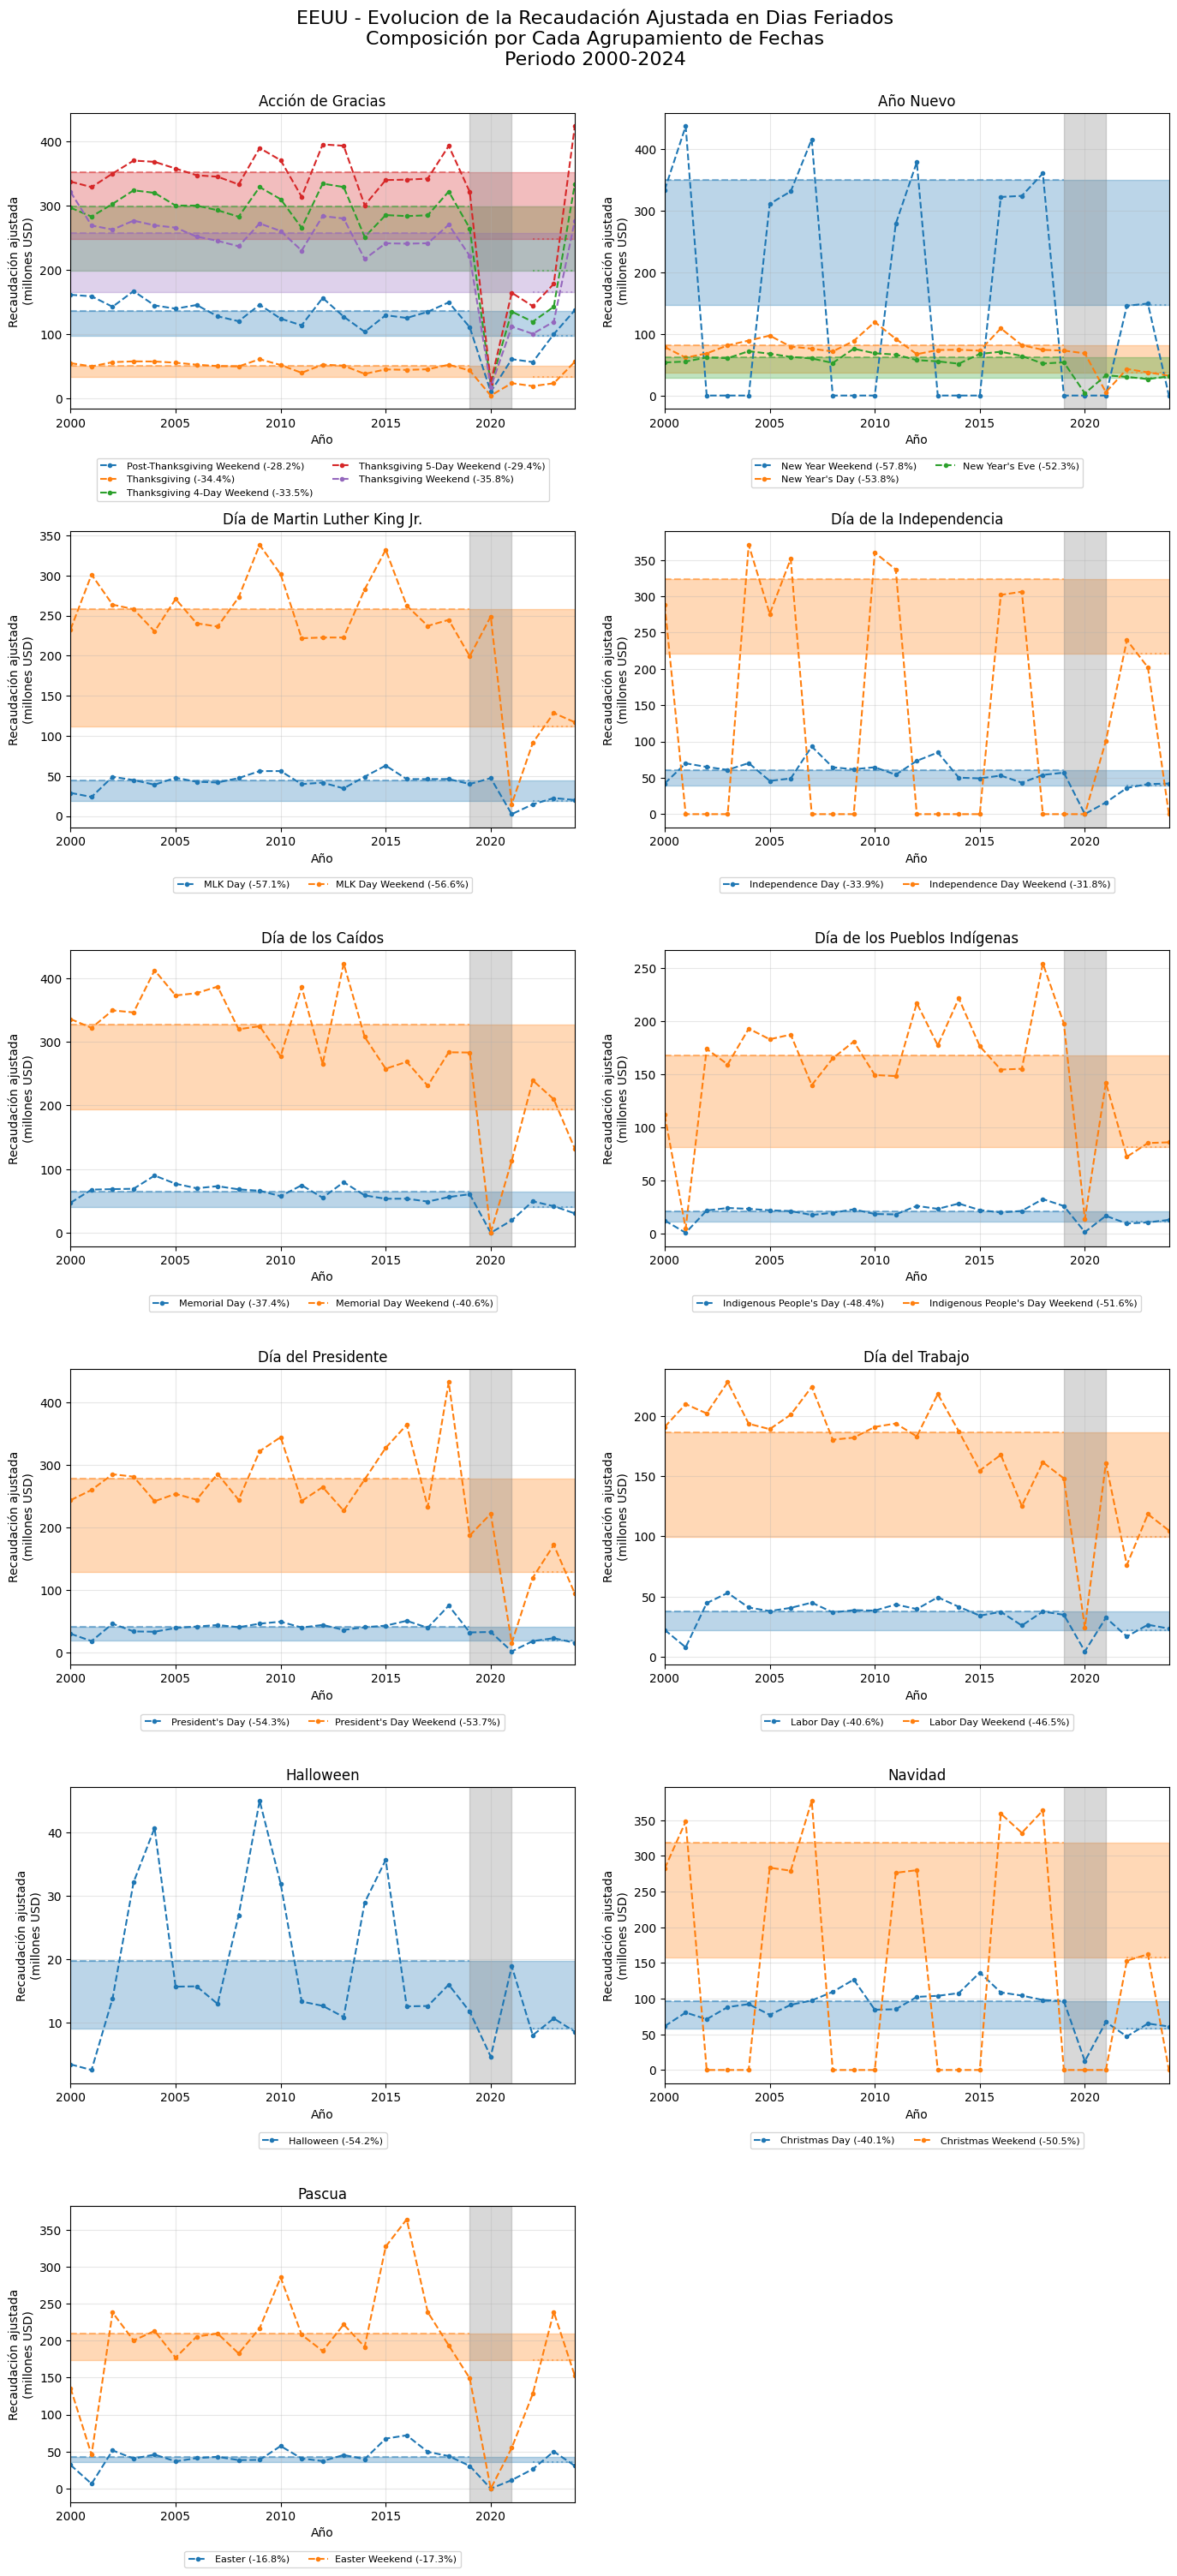

In [64]:
# ====================
# Filtro rango de años
# ====================
df = dfRecaudacionFeriados.copy()
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)]

# ===================================
# Agrupación por año, grupo y holiday
# ===================================
df_grouped = (
    df.groupby(["Year", "Holiday_Group", "Holiday"], as_index=False)["Cumulative_Gross_Inflac"]
    .sum()
)

# ============================
# Relleno años faltantes con 0
# ============================
years = list(range(2000, 2025))
all_groups = df_grouped["Holiday_Group"].unique()

filled = []
for group in all_groups:
    sub = df_grouped[df_grouped["Holiday_Group"] == group]
    holidays = sub["Holiday"].unique()

    # armo grilla Year × Holiday
    idx = pd.MultiIndex.from_product([years, [group], holidays], names=["Year", "Holiday_Group", "Holiday"])
    sub_full = sub.set_index(["Year", "Holiday_Group", "Holiday"]).reindex(idx, fill_value=0).reset_index()
    filled.append(sub_full)

df_filled = pd.concat(filled, ignore_index=True)

# Totales por grupo
df_totals = (
    df_filled.groupby(["Year", "Holiday_Group"], as_index=False)["Cumulative_Gross_Inflac"]
    .sum()
)

# ===============================
# Valores únicos de Holiday_Group
# ===============================
holiday_groups = df_filled["Holiday_Group"].unique()
n = len(holiday_groups)

# Layout: 2 gráficos por fila
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharey=False)
axes = axes.flatten()

# Lista para guardar resultados de variaciones
variation_data = []

# ==========================
# Grafico cada Holiday_Group
# ==========================
for i, group in enumerate(holiday_groups):
    ax = axes[i]

    # Sub-datos del grupo
    sub = df_filled[df_filled["Holiday_Group"] == group].sort_values("Year")

    # Leyendas personalizadas
    legend_handles = []

    # Graficar cada Holiday (sub-item)
    for holiday in sub["Holiday"].unique():
        sub_h = sub[sub["Holiday"] == holiday]

        # Línea principal
        line, = ax.plot(
            sub_h["Year"], sub_h["Cumulative_Gross_Inflac"],
            marker=".", linestyle="--"
        )
        color = line.get_color()

        # ===========================
        # Promedios (ignorando ceros)
        # ===========================
        avg_2000_2019 = sub_h[
            (sub_h["Year"] >= 2000) & (sub_h["Year"] <= 2019) &
            (sub_h["Cumulative_Gross_Inflac"] > 0)
        ]["Cumulative_Gross_Inflac"].mean()

        avg_2022_2024 = sub_h[
            (sub_h["Year"] >= 2022) & (sub_h["Year"] <= 2024) &
            (sub_h["Cumulative_Gross_Inflac"] > 0)
        ]["Cumulative_Gross_Inflac"].mean()

        if not pd.isna(avg_2000_2019):
            ax.hlines(avg_2000_2019, 2000, 2019, colors=color,
                      linestyles="--", alpha=0.5)
        if not pd.isna(avg_2022_2024):
            ax.hlines(avg_2022_2024, 2022, 2024, colors=color,
                      linestyles=":", alpha=0.5)

        # ========================
        # Sombrear entre promedios
        # ========================
        if not pd.isna(avg_2000_2019) and not pd.isna(avg_2022_2024):
            y_min, y_max = sorted([avg_2000_2019, avg_2022_2024])
            ax.fill_between(
                [2000, 2024],
                y_min, y_max,
                color=color, alpha=0.3
            )

            # Variación %
            variation = ((avg_2022_2024 - avg_2000_2019) / avg_2000_2019) * 100
            variation_data.append({
                "Holiday_Group": group,
                "Holiday": holiday,
                "Avg_2000_2019": avg_2000_2019,
                "Avg_2022_2024": avg_2022_2024,
                "Variation_%": variation
            })

            label = f"{holiday} ({variation:+.1f}%)"
        else:
            label = holiday

        # Guardar handle con label personalizado
        legend_handles.append(Line2D([0], [0], color=color, linestyle="--", marker=".", label=label))

    # Formato eje Y en millones
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}"))

    # Sombrear pandemia (2019–2021)
    ax.axvspan(2019, 2021, color="gray", alpha=0.3, label="Pandemia COVID-19")

    # Títulos y formato
    ax.set_title(f"{group}", fontsize=12)
    ax.set_xlabel("Año")
    ax.set_ylabel("Recaudación ajustada\n(millones USD)")
    ax.set_xlim(2000, 2024)
    ax.grid(True, alpha=0.3)

    # Leyenda personalizada
    ax.legend(
        handles=legend_handles,
        fontsize=8,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True
    )

# Elimino ejes sobrantes si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("EEUU - Evolucion de la Recaudación Ajustada en Dias Feriados\nComposición por Cada Agrupamiento de Fechas\nPeriodo 2000-2024",
             fontsize=16, y=1.0)

plt.tight_layout()
plt.show()

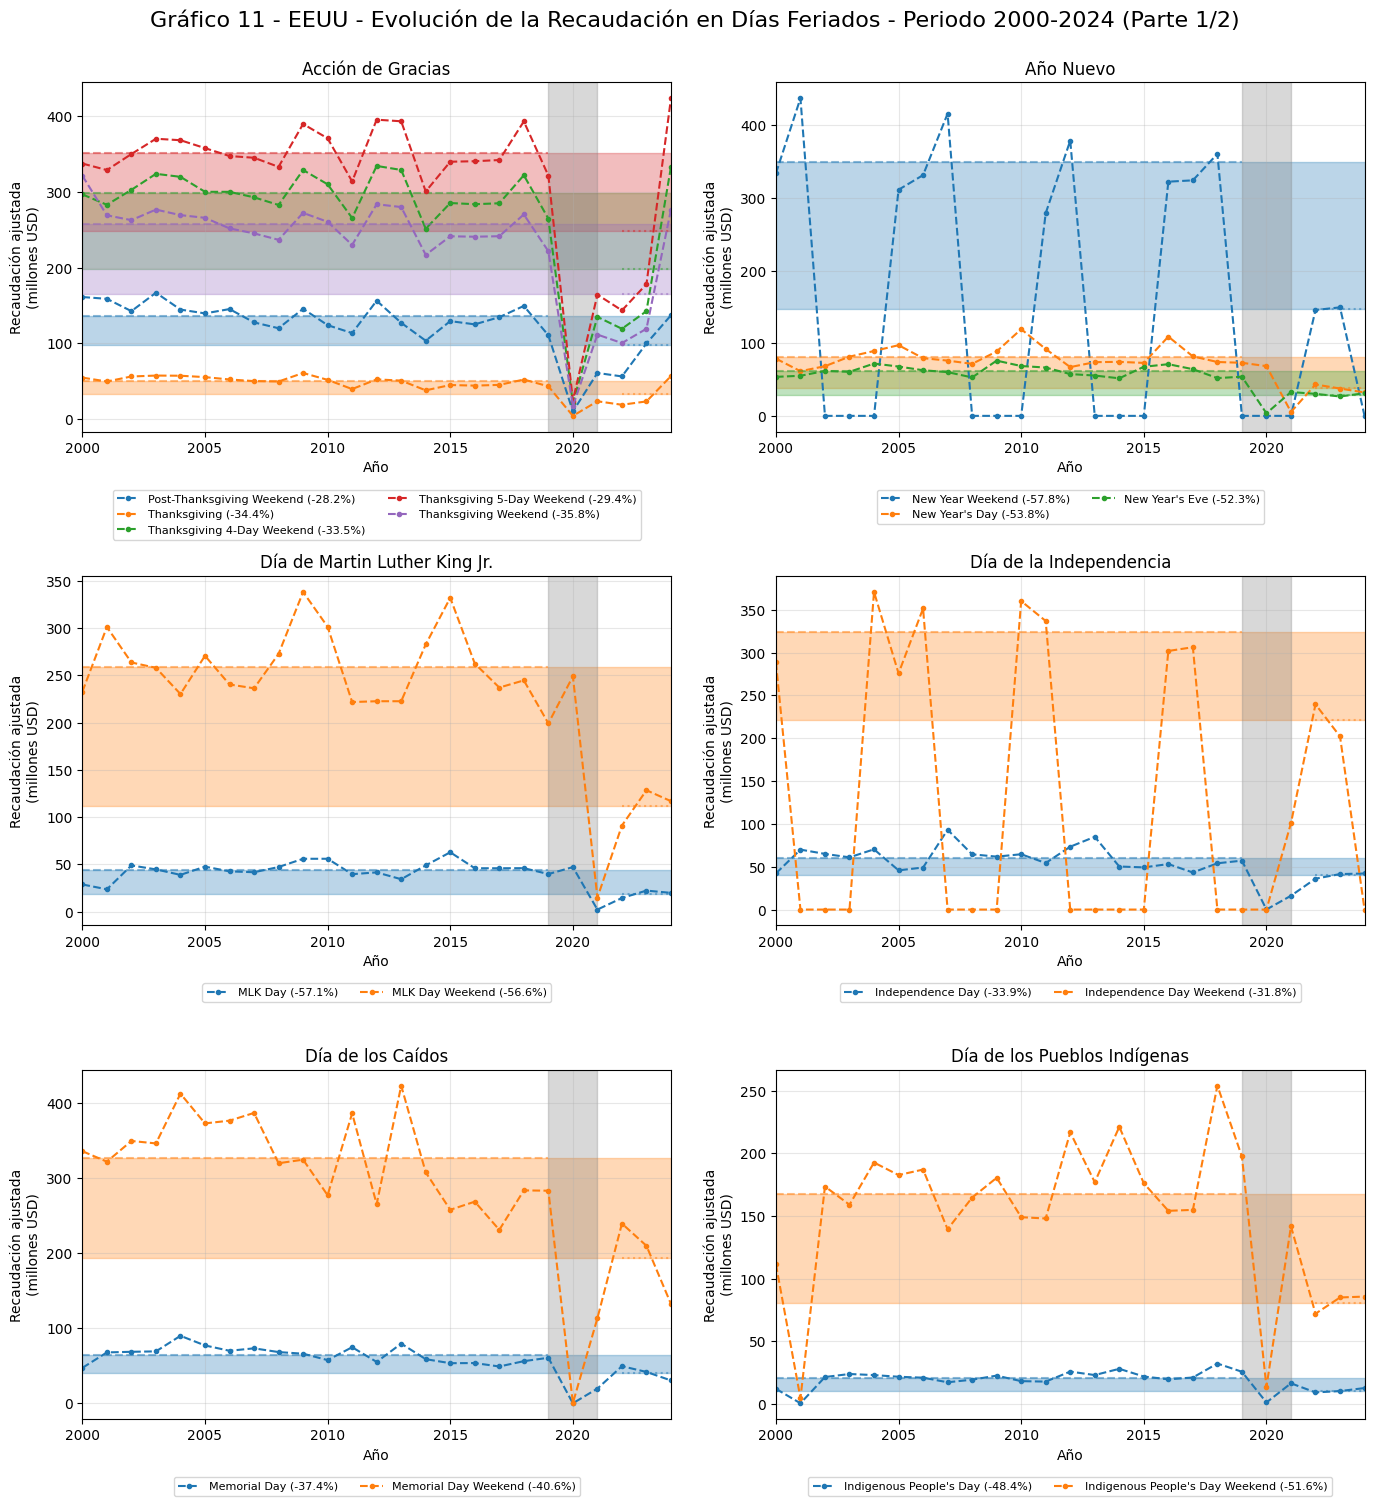

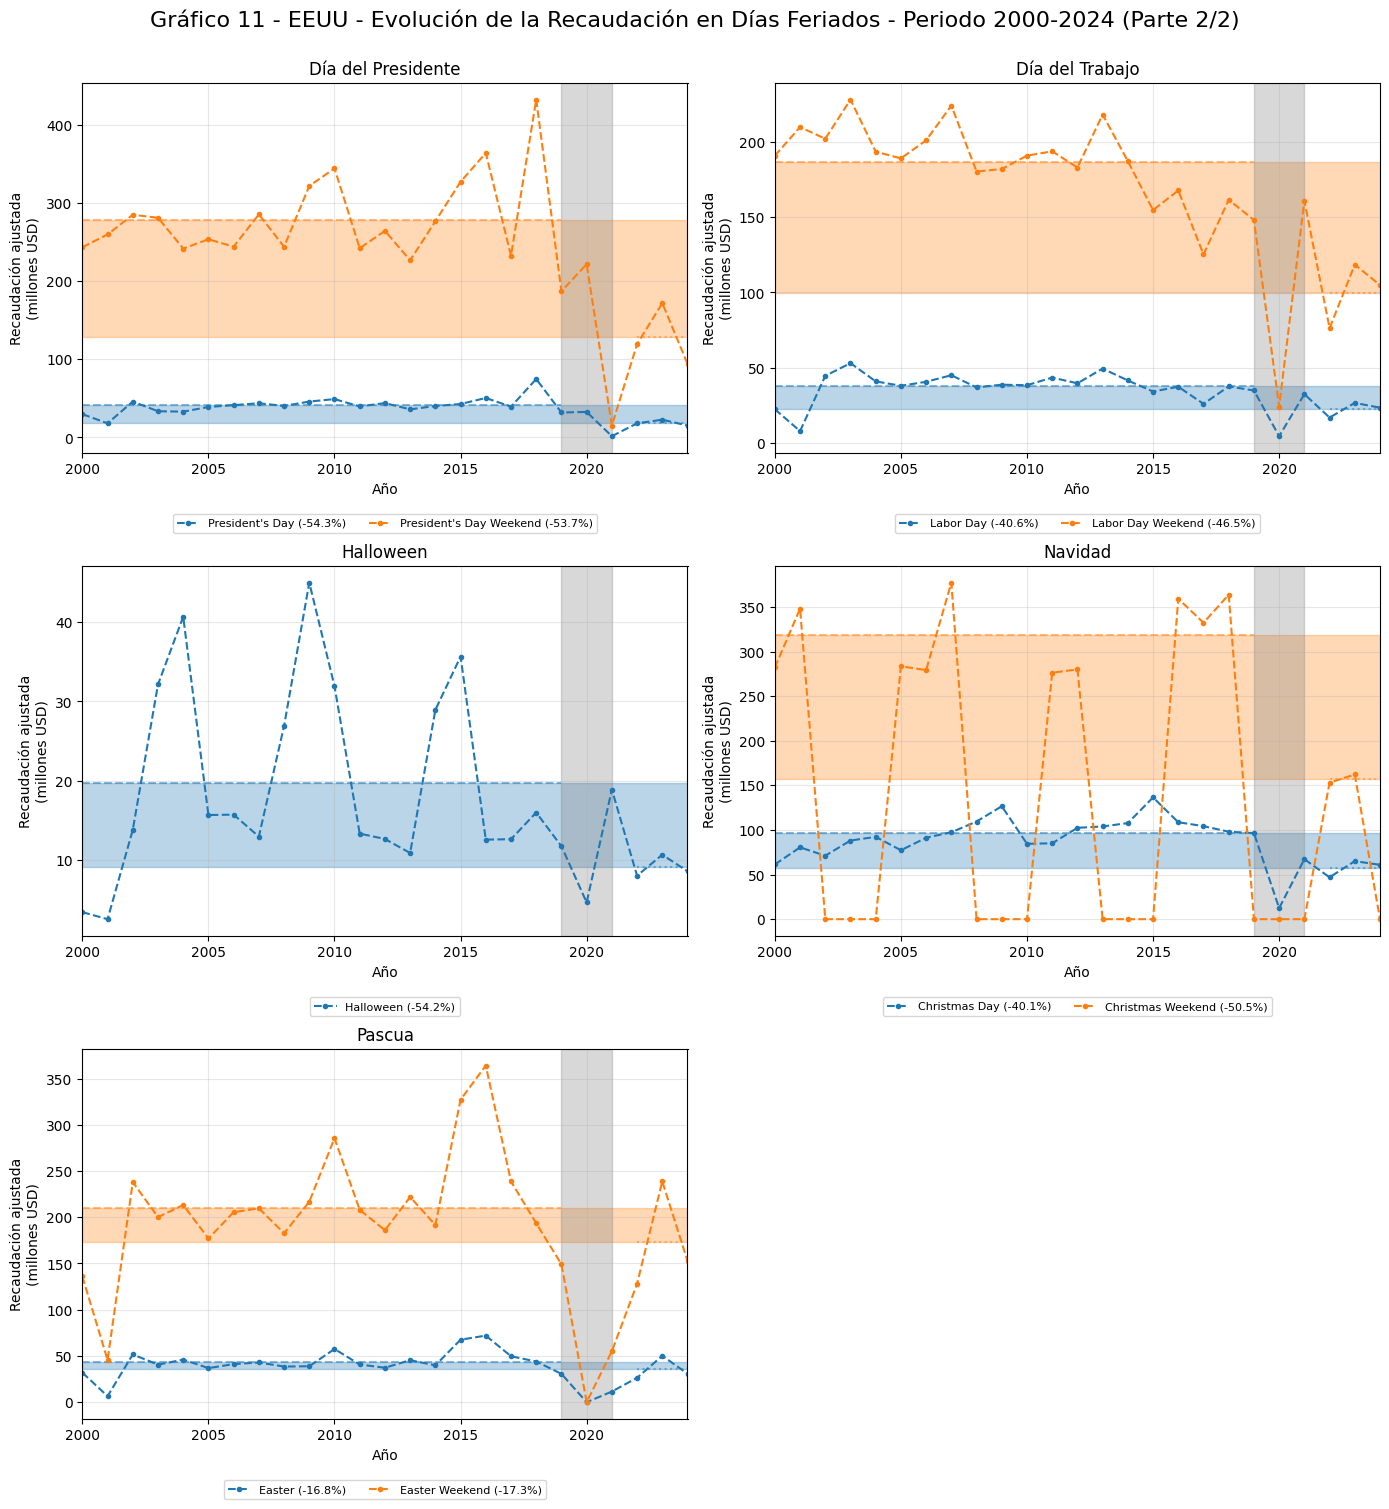

In [65]:
# ====================
# Filtro rango de años
# ====================
df = dfRecaudacionFeriados.copy()
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2024)]

# ===================================
# Agrupación por año, grupo y holiday
# ===================================
df_grouped = (
    df.groupby(["Year", "Holiday_Group", "Holiday"], as_index=False)["Cumulative_Gross_Inflac"]
    .sum()
)

# ============================
# Relleno años faltantes con 0
# ============================
years = list(range(2000, 2025))
all_groups = df_grouped["Holiday_Group"].unique()

filled = []
for group in all_groups:
    sub = df_grouped[df_grouped["Holiday_Group"] == group]
    holidays = sub["Holiday"].unique()

    idx = pd.MultiIndex.from_product([years, [group], holidays], names=["Year", "Holiday_Group", "Holiday"])
    sub_full = sub.set_index(["Year", "Holiday_Group", "Holiday"]).reindex(idx, fill_value=0).reset_index()
    filled.append(sub_full)

df_filled = pd.concat(filled, ignore_index=True)

# ===============================
# Valores únicos de Holiday_Group
# ===============================
holiday_groups = sorted(df_filled["Holiday_Group"].unique())
n = len(holiday_groups)

# ================================
# Función para graficar en bloques
# ================================
def plot_groups(groups, fig_title):
    cols = 2
    rows = math.ceil(len(groups) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), sharey=False)
    axes = axes.flatten()

    for i, group in enumerate(groups):
        ax = axes[i]
        sub = df_filled[df_filled["Holiday_Group"] == group].sort_values("Year")

        legend_handles = []
        for holiday in sub["Holiday"].unique():
            sub_h = sub[sub["Holiday"] == holiday]
            line, = ax.plot(sub_h["Year"], sub_h["Cumulative_Gross_Inflac"],
                            marker=".", linestyle="--")
            color = line.get_color()

            # Promedios
            avg_2000_2019 = sub_h[(sub_h["Year"] >= 2000) & (sub_h["Year"] <= 2019) &
                                  (sub_h["Cumulative_Gross_Inflac"] > 0)]["Cumulative_Gross_Inflac"].mean()
            avg_2022_2024 = sub_h[(sub_h["Year"] >= 2022) & (sub_h["Year"] <= 2024) &
                                  (sub_h["Cumulative_Gross_Inflac"] > 0)]["Cumulative_Gross_Inflac"].mean()

            if not pd.isna(avg_2000_2019):
                ax.hlines(avg_2000_2019, 2000, 2019, colors=color, linestyles="--", alpha=0.5)
            if not pd.isna(avg_2022_2024):
                ax.hlines(avg_2022_2024, 2022, 2024, colors=color, linestyles=":", alpha=0.5)

            if not pd.isna(avg_2000_2019) and not pd.isna(avg_2022_2024):
                y_min, y_max = sorted([avg_2000_2019, avg_2022_2024])
                ax.fill_between([2000, 2024], y_min, y_max, color=color, alpha=0.3)

                variation = ((avg_2022_2024 - avg_2000_2019) / avg_2000_2019) * 100
                label = f"{holiday} ({variation:+.1f}%)"
            else:
                label = holiday

            legend_handles.append(Line2D([0], [0], color=color, linestyle="--", marker=".", label=label))

        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}"))
        ax.axvspan(2019, 2021, color="gray", alpha=0.3, label="Pandemia COVID-19")

        ax.set_title(f"{group}", fontsize=12)
        ax.set_xlabel("Año")
        ax.set_ylabel("Recaudación ajustada\n(millones USD)")
        ax.set_xlim(2000, 2024)
        ax.grid(True, alpha=0.3)

        ax.legend(handles=legend_handles, fontsize=8, loc="upper center",
                  bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    # Eliminar ejes vacíos si hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(fig_title, fontsize=16, y=1.0)
    plt.tight_layout()
    plt.show()

# ============================
# Dividir en dos bloques de 6
# ============================
half = math.ceil(n / 2)

plot_groups(holiday_groups[:half],
            "Gráfico 11 - EEUU - Evolución de la Recaudación en Días Feriados - Periodo 2000-2024 (Parte 1/2)")
plot_groups(holiday_groups[half:],
            "Gráfico 11 - EEUU - Evolución de la Recaudación en Días Feriados - Periodo 2000-2024 (Parte 2/2)")


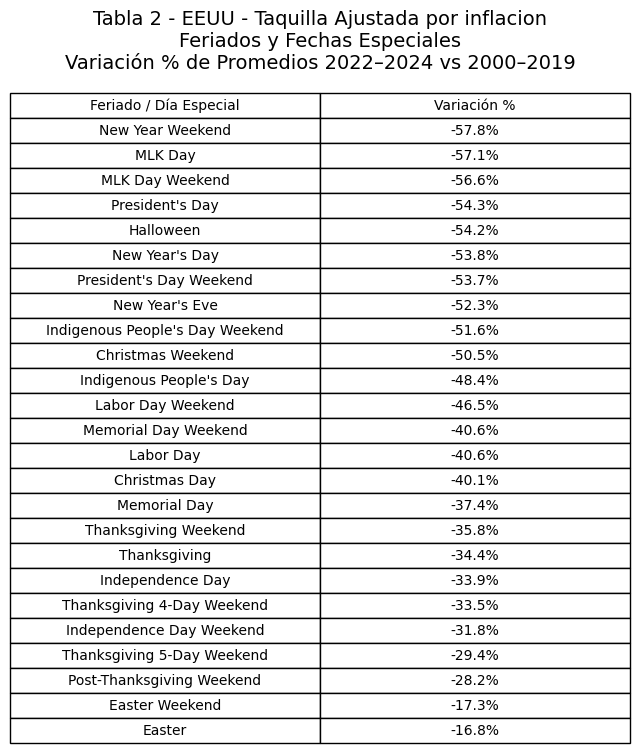

In [66]:
# ============================
# Tabla Variaciones Feriados
# ============================
df_variations = pd.DataFrame(variation_data)
df_variations = df_variations.sort_values("Variation_%")  # de mayor caída a menor

# Columnas requeridas
df_table = df_variations[["Holiday", "Variation_%"]].copy()
df_table["Variation_%"] = df_table["Variation_%"].map(lambda x: f"{x:+.1f}%")

# Crea figura para la tabla
fig, ax = plt.subplots(figsize=(8, 0.5 + 0.3 * len(df_table)))  # altura proporcional a filas
ax.axis("off")

table = ax.table(
    cellText=df_table.values,
    colLabels=["Feriado / Día Especial", "Variación %"],
    cellLoc="center",
    loc="center"
)

# Ajustes de estilo
table.auto_set_font_size(True)
table.set_fontsize(10)
table.scale(1, 1.5)

# Título con menos espacio respecto a la tabla
plt.title(
    "Tabla 2 - EEUU - Taquilla Ajustada por inflacion\nFeriados y Fechas Especiales\nVariación % de Promedios 2022–2024 vs 2000–2019",
    fontsize=14,
    pad=30
)

plt.show()


### Analisis por Franquicias

In [67]:
dfFranquicias = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_FranquiciasReleases.csv')

In [68]:
# Convierto la columna a formato datetime
dfFranquicias['Release_Date'] = pd.to_datetime(
    dfFranquicias['Release_Date']
)

In [69]:
dfFranquicias.info(),dfFranquicias['Franchise'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Franchise     508 non-null    object        
 1   Release       508 non-null    object        
 2   Release_Date  474 non-null    datetime64[ns]
 3   Distributor   504 non-null    object        
 4   BOM_Link      508 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 20.0+ KB


(None,
 array(['Marvel Cinematic Universe', 'Star Wars',
        'Disney Live Action Reimaginings', 'Mission: Impossible',
        'The Hunger Games', 'Transformers', 'Pirates of the Caribbean',
        'Star Trek', 'The Fast and the Furious', 'Jurassic Park',
        'DC Extended Universe', 'Batman', 'Spider-Man', 'X-Men',
        'Superman', 'Bourne', 'Kung Fu Panda', 'Sonic the Hedgehog',
        'John Wick', 'The Matrix', 'Alien', 'Teenage Mutant Ninja Turtles',
        'Men in Black', 'Monsterverse', 'Rocky', 'The Lord of the Rings',
        'The Hobbit', 'Despicable Me', 'James Bond', 'Terminator',
        'Predator', 'Resident Evil', 'The Purge', 'Mad Max', 'The Muppets',
        'Taken', 'Friday the 13th', 'Back to the Future', 'Lethal Weapon',
        'Die Hard', 'Venom', 'LEGO', 'Indiana Jones', 'Toy Story', 'Shrek',
        'Avatar', 'Joker', 'Fantastic Four', 'Blade'], dtype=object))

In [70]:
dfFranquiciasRecaudacionDiaria = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos/BoxOfficeMojo/Data/scrapping_CBM_RecaudacionDiaria.csv')

In [71]:
# Convierto las columna 'Release_Cinema' y 'Release_Digital_Streaming' a formato datetime
dfFranquiciasRecaudacionDiaria['Release_Cinema'] = pd.to_datetime(
    dfFranquiciasRecaudacionDiaria['Release_Cinema']
)

dfFranquiciasRecaudacionDiaria['Release_Digital_Streaming'] = pd.to_datetime(
    dfFranquiciasRecaudacionDiaria['Release_Digital_Streaming']
)

dfFranquiciasRecaudacionDiaria['Year']=dfFranquiciasRecaudacionDiaria['Release_Cinema'].dt.year

In [72]:
# Combino y Ajusto por inflacion las taquillas
dfFranquiciasRecaudacionDiaria = pd.merge(dfFranquiciasRecaudacionDiaria, dfIndicesAnuales1977_2024[['year', 'IPC Todos los ítemes (promedio 1982-1984=100)']], left_on='Year', right_on='year')
dfFranquiciasRecaudacionDiaria['coeficiente']=ipc2024/dfFranquiciasRecaudacionDiaria['IPC Todos los ítemes (promedio 1982-1984=100)']
dfFranquiciasRecaudacionDiaria['Daily_Inflac']=dfFranquiciasRecaudacionDiaria['Daily']*dfFranquiciasRecaudacionDiaria['coeficiente']
dfFranquiciasRecaudacionDiaria.drop(columns=['year', 'coeficiente','IPC Todos los ítemes (promedio 1982-1984=100)'], inplace=True)

In [73]:
dfFranquiciasRecaudacionDiaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810 entries, 0 to 8809
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Release                    8810 non-null   object        
 1   Studio                     8810 non-null   object        
 2   Release_Cinema             8810 non-null   datetime64[ns]
 3   Release_Digital_Streaming  8810 non-null   datetime64[ns]
 4   DOW                        8810 non-null   object        
 5   Rank                       8810 non-null   int64         
 6   Daily                      8810 non-null   float64       
 7   Theaters                   8810 non-null   int64         
 8   Day                        8810 non-null   int64         
 9   Year                       8810 non-null   int32         
 10  Daily_Inflac               8810 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(3), object(3)
memor

In [74]:
dfFranquiciasRecaudacionDiaria["Release"].unique()

array(['Iron Man', 'The Incredible Hulk', 'Iron Man 2', 'Thor',
       'Captain America: The First Avenger', 'The Avengers', 'Iron Man 3',
       'Thor: The Dark World', 'Captain America: The Winter Soldier',
       'Guardians of the Galaxy', 'Avengers: Age of Ultron', 'Ant-Man',
       'Captain America: Civil War', 'Doctor Strange',
       'Guardians of the Galaxy Vol. 2', 'Thor: Ragnarok',
       'Black Panther', 'Avengers: Infinity War', 'Ant-Man and the Wasp',
       'Captain Marvel', 'Avengers: Endgame', 'Black Widow',
       'Shang-Chi and the Legend of the Ten Rings', 'Eternals',
       'Doctor Strange in the Multiverse of Madness',
       'Thor: Love and Thunder', 'Black Panther: Wakanda Forever',
       'Ant-Man and the Wasp: Quantumania',
       'Guardians of the Galaxy Vol. 3', 'The Marvels',
       'Deadpool & Wolverine', 'Spider-Man: Homecoming', 'Venom',
       'Spider-Man: Into the Spider-Verse', 'Spider-Man: Far from Home',
       'Venom: Let There Be Carnage', 'Spider-

In [75]:
dfFranquicias["Franchise"].unique()

array(['Marvel Cinematic Universe', 'Star Wars',
       'Disney Live Action Reimaginings', 'Mission: Impossible',
       'The Hunger Games', 'Transformers', 'Pirates of the Caribbean',
       'Star Trek', 'The Fast and the Furious', 'Jurassic Park',
       'DC Extended Universe', 'Batman', 'Spider-Man', 'X-Men',
       'Superman', 'Bourne', 'Kung Fu Panda', 'Sonic the Hedgehog',
       'John Wick', 'The Matrix', 'Alien', 'Teenage Mutant Ninja Turtles',
       'Men in Black', 'Monsterverse', 'Rocky', 'The Lord of the Rings',
       'The Hobbit', 'Despicable Me', 'James Bond', 'Terminator',
       'Predator', 'Resident Evil', 'The Purge', 'Mad Max', 'The Muppets',
       'Taken', 'Friday the 13th', 'Back to the Future', 'Lethal Weapon',
       'Die Hard', 'Venom', 'LEGO', 'Indiana Jones', 'Toy Story', 'Shrek',
       'Avatar', 'Joker', 'Fantastic Four', 'Blade'], dtype=object)

Ideas

* merge de dfFranquiciasRecaudacionDiaria con dfFranquicias, agregarle Franchise, unir por Release
* Rendimiento en taquilla desde el lanzamiento hasta el ultimo dia, por pelicura, marcando la fecha de lanzamiento en digital - Impacto en la taquilla
* Evolucion de los tiempos de proyeccion exclusiva en cine
- Usar tambien boxplots
* Top Franquicias mas taquilleras
* Top Promedio por franquicia







### EEUU - Analisis Particular MCU (Marvel Cinematic Universe)


#### Evolucion de la taquilla

In [76]:
dfFranquiciasRecaudacionDiariaMCU = dfFranquiciasRecaudacionDiaria[dfFranquiciasRecaudacionDiaria['Studio']=='MCU']

In [77]:
#==========================
# Asigno columna a la fase
#==========================
def fase(year):
    if year >= 2008 and year <= 2012:
        return 'Fase 1'
    elif year >= 2013 and year <= 2015:
        return 'Fase 2'
    elif year >= 2016 and year <= 2019:
        return 'Fase 3'
    elif year >= 2020 and year <= 2022:
        return 'Fase 4'
    else:
        return 'Fase 5'

dfFranquiciasRecaudacionDiariaMCU['Phase'] = dfFranquiciasRecaudacionDiariaMCU['Year'].apply(fase)

/tmp/ipython-input-3968380596.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFranquiciasRecaudacionDiariaMCU['Phase'] = dfFranquiciasRecaudacionDiariaMCU['Year'].apply(fase)


/tmp/ipython-input-1730886624.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


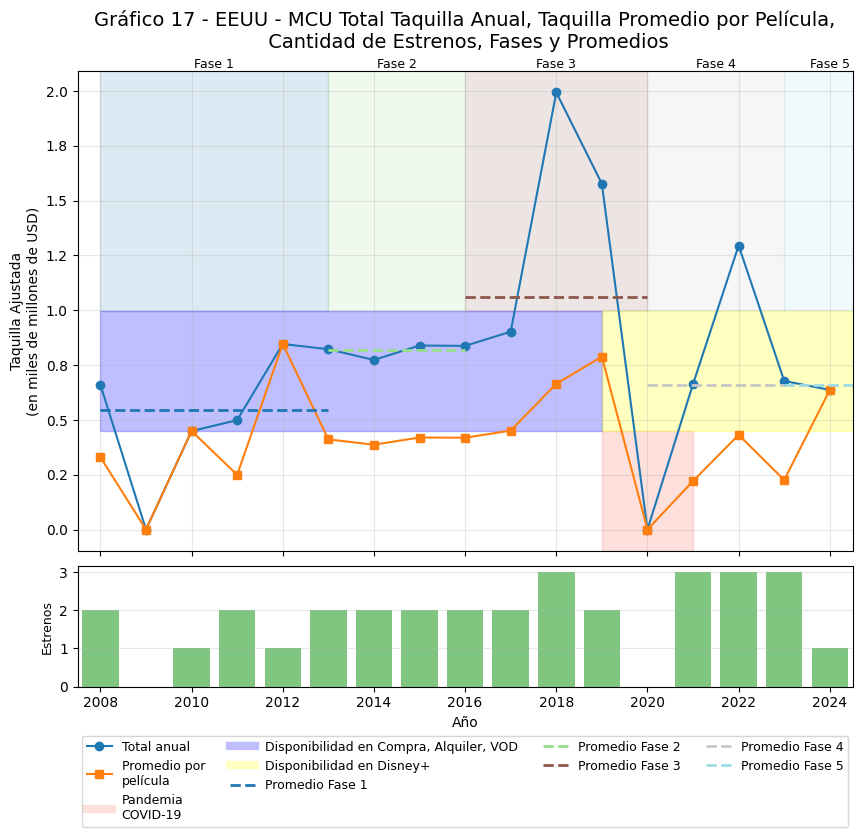

In [78]:
# ===================================================
# Preparo datos anuales (con años faltantes = 0)
# ===================================================
df = dfFranquiciasRecaudacionDiariaMCU.copy()

df_yearly = (
    df.groupby("Year", as_index=False)
      .agg(Total_Daily_Inflac=("Daily_Inflac", "sum"),
           Unique_Releases=("Release", "nunique"))
)

# Generar rango completo de años entre min y max
years = pd.Series(range(df["Year"].min(), df["Year"].max() + 1), name="Year")

# Reindexar para que todos los años existan, los faltantes se llenan con 0
df_yearly = years.to_frame().merge(df_yearly, on="Year", how="left").fillna(0)

# Calcular promedio por película (evita división por 0)
df_yearly["Avg_Per_Movie"] = df_yearly.apply(
    lambda row: row["Total_Daily_Inflac"] / row["Unique_Releases"] if row["Unique_Releases"] > 0 else 0,
    axis=1
)

# ===================================================
# Calculo rango (min,max) por Phase
# ===================================================
phase_ranges = (
    df.groupby("Phase")["Year"]
      .agg(["min", "max"])
      .reset_index()
      .rename(columns={"min": "year_min", "max": "year_max"})
)

# ===================================================
# Preparo figura con 2 filas (gráfico de líneas + barras)
# ===================================================
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[4, 1], hspace=0.05)

ax1 = fig.add_subplot(gs[0])  # gráfico de líneas
ax_bar = fig.add_subplot(gs[1], sharex=ax1)  # gráfico de barras pequeño

# ===================================================
# Gráfico superior (líneas)
# ===================================================
ln_total, = ax1.plot(df_yearly["Year"], df_yearly["Total_Daily_Inflac"],
                     marker="o", linestyle="-", color="tab:blue", label="Total anual (Daily_Inflac)")
ln_avg, = ax1.plot(df_yearly["Year"], df_yearly["Avg_Per_Movie"],
                   marker="s", linestyle="-", color="tab:orange", label="Promedio por película (año)")

# ===================================================
# Sombreado de fases (50% superior) y promedios
# ===================================================
colors = plt.cm.tab20(np.linspace(0, 1, len(phase_ranges)))
phase_handles, phase_labels = [], []

y_min, y_max = ax1.get_ylim()
half_height = (y_max - y_min) / 2
y_split = y_min + half_height

for i, row in phase_ranges.iterrows():
    phase, y0, y1 = row["Phase"], int(row["year_min"]), int(row["year_max"]+1)

    if phase == "Fase 4":
        y0 = 2020

    # sombrear solo la mitad superior
    ax1.axvspan(y0, y1, ymin=0.5, ymax=1.0, color=colors[i % len(colors)], alpha=0.15)

    # calcular promedio de Total_Daily_Inflac en la fase
    sel = df_yearly[(df_yearly["Year"] >= y0) & (df_yearly["Year"] <= y1)]
    if not sel.empty:
        avg_total_phase = sel["Total_Daily_Inflac"].mean()
        ax1.hlines(avg_total_phase, y0, y1, colors=[colors[i % len(colors)]],
                   linestyles="--", linewidth=2)
        phase_handles.append(Line2D([0], [0], color=colors[i % len(colors)], linestyle="--", linewidth=2))
        phase_labels.append(f"Promedio {phase}")
        x_center = (y0 + y1) / 2

    ax1.text(x_center, y_max, phase,
             ha="center", va="bottom", fontsize=9)

# ===================================================
# Pandemia
# ===================================================
ax1.axvspan(2019, 2021, ymin=0.0, ymax=0.25, color="salmon", alpha=0.25)
pand_handle = Line2D([0], [0], color="salmon", linewidth=6, alpha=0.25)

# ===================================================
# Disponibilidad
# ===================================================
ax1.axvspan(2008, 2019, ymin=0.25, ymax=0.5, color="blue", alpha=0.25)
preDplus = Line2D([0], [0], color="blue", linewidth=6, alpha=0.25)
ax1.axvspan(2019, 2025, ymin=0.25, ymax=0.5, color="yellow", alpha=0.25)
postDplus = Line2D([0], [0], color="yellow", linewidth=6, alpha=0.25)

# ===================================================
# Gráfico inferior (barras de estrenos)
# ===================================================
ax_bar.bar(df_yearly["Year"], df_yearly["Unique_Releases"],
           color="tab:green", alpha=0.6)

ax_bar.set_ylabel("Estrenos", fontsize=9)
ax_bar.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x)}"))
ax_bar.grid(alpha=0.3, axis="y")
ax_bar.set_xlabel("Año")

# Reducir ticks Y porque es gráfico pequeño
ax_bar.set_yticks(range(0, int(df_yearly["Unique_Releases"].max())+1, 1))


# ===================================================
# Formato de ejes
# ===================================================
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f}"))
ax1.set_xlim(2008, 2024)
ax1.set_ylabel("Taquilla Ajustada\n(en miles de millones de USD)")
ax1.grid(alpha=0.3)
ax1.set_title("Gráfico 17 - EEUU - MCU Total Taquilla Anual, Taquilla Promedio por Película,\n Cantidad de Estrenos, Fases y Promedios", fontsize=14, y=1.03)

# Ocultar etiquetas X del gráfico superior (se ven solo abajo)
plt.setp(ax1.get_xticklabels(), visible=False)

# ===================================================
# Leyenda
# ===================================================
base_handles = [ln_total, ln_avg, pand_handle,preDplus,postDplus]
base_labels = ["Total anual", "Promedio por\npelícula", "Pandemia\nCOVID-19", "Disponibilidad en Compra, Alquiler, VOD", "Disponibilidad en Disney+"]

all_handles = base_handles + phase_handles
all_labels = base_labels + phase_labels

#ax1.legend(all_handles, all_labels, fontsize=9, loc="upper left", bbox_to_anchor=(1.01, 1.0))

ax1.legend(
    all_handles, all_labels,
    fontsize=9,
    loc="upper center",
    bbox_to_anchor=(0.5, -.37),
    ncol=4,
    frameon=True
)

# ===================================================
# Extremos del eje X
# ===================================================
xmin, xmax = df_yearly["Year"].min(), df_yearly["Year"].max()
ax1.set_xlim(xmin - 0.5, xmax + 0.5)

plt.tight_layout()
plt.show()

* Revisar que los promedios no computen los años con 0
Sumar promedio por pelicula por fase
* Top 10 peliculas mas taquilleras / año de estreno / Fase

#### Analisis de los Dias en Cartel

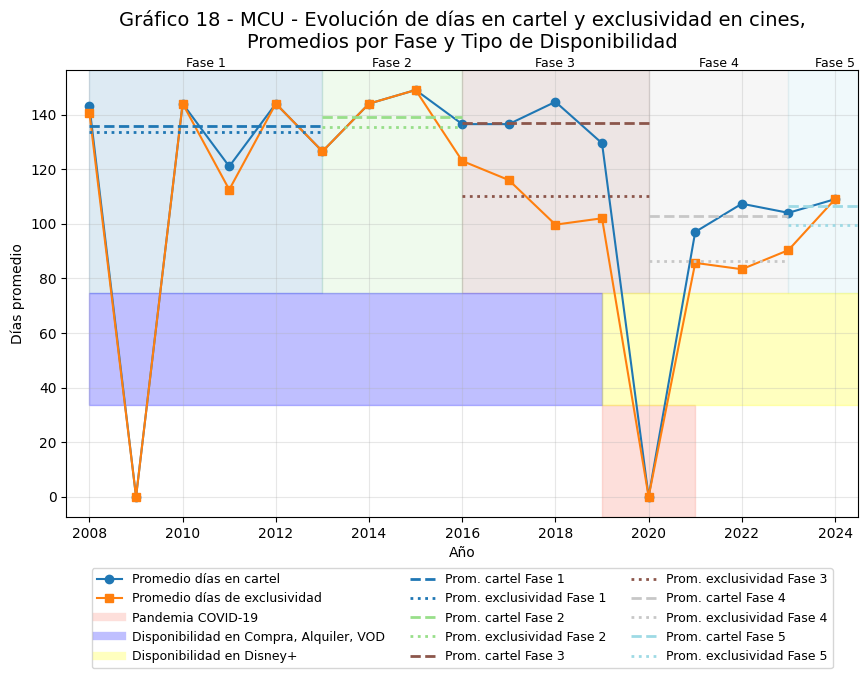

In [79]:
# ===================================================
# Calcular métricas por película
# ===================================================
df = dfFranquiciasRecaudacionDiariaMCU.copy()

df_days = (
    df.groupby(["Release", "Year", "Phase"], as_index=False)
      .agg(Days_in_cinema=("Day", "count"),
           Revenue_total=("Daily_Inflac", "sum"))
)

df_stream = df.drop_duplicates("Release").copy()
df_stream["Days_exclusive"] = (
    (df_stream["Release_Digital_Streaming"] - df_stream["Release_Cinema"]).dt.days
)

df_rev_exclusive = []
for movie, subdf in df.groupby("Release"):
    digital_date = subdf["Release_Digital_Streaming"].iloc[0]
    if pd.isna(digital_date):
        rev_excl = subdf["Daily_Inflac"].sum()
    else:
        rev_excl = subdf.loc[
            subdf["Release_Cinema"] + pd.to_timedelta(subdf["Day"], "D") <= digital_date,
            "Daily_Inflac"
        ].sum()
    df_rev_exclusive.append({"Release": movie, "Revenue_exclusive": rev_excl})

df_rev_exclusive = pd.DataFrame(df_rev_exclusive)

df_merge = (
    df_days
    .merge(df_stream[["Release", "Days_exclusive"]], on="Release", how="left")
    .merge(df_rev_exclusive, on="Release", how="left")
)

df_merge["Days_in_cinema"] = df_merge[["Days_in_cinema", "Days_exclusive"]].max(axis=1)
df_merge["Pct_revenue_exclusive"] = (
    df_merge["Revenue_exclusive"] / df_merge["Revenue_total"] * 100
).fillna(0)

# ===================================================
# Métricas anuales
# ===================================================
df_yearly_real = (
    df_merge.groupby("Year", as_index=False)
    .agg(
        Avg_days_in_cinema=("Days_in_cinema", "mean"),
        Avg_days_exclusive=("Days_exclusive", "mean"),
        Avg_pct_revenue_exclusive=("Pct_revenue_exclusive", "mean")
    )
)

years = pd.Series(range(df["Year"].min(), df["Year"].max() + 1), name="Year")
df_yearly = years.to_frame().merge(df_yearly_real, on="Year", how="left").fillna(0)

# ===================================================
# Rango de fases
# ===================================================
phase_ranges = (
    df.groupby("Phase")["Year"]
      .agg(["min", "max"])
      .reset_index()
      .rename(columns={"min": "year_min", "max": "year_max"})
)

# ===================================================
# Gráfico
# ===================================================
fig, ax1 = plt.subplots(figsize=(9, 7))

ln1, = ax1.plot(df_yearly["Year"], df_yearly["Avg_days_in_cinema"],
                marker="o", linestyle="-", color="tab:blue", label="Promedio días en cartel")
ln2, = ax1.plot(df_yearly["Year"], df_yearly["Avg_days_exclusive"],
                marker="s", linestyle="-", color="tab:orange", label="Promedio días de exclusividad")

ax1.set_ylabel("Días promedio")
ax1.grid(alpha=0.3)

# ===================================================
# Promedios por fase
# ===================================================
colors = plt.cm.tab20(np.linspace(0, 1, len(phase_ranges)))
phase_handles, phase_labels = [], []

y_min, y_max = ax1.get_ylim()

for i, row in phase_ranges.iterrows():
    phase, y0, y1 = row["Phase"], int(row["year_min"]), int(row["year_max"]+1)

    sel = df_yearly_real[(df_yearly_real["Year"] >= y0) & (df_yearly_real["Year"] <= y1)]
    if not sel.empty:
        # --- Promedio cartel ---
        avg_cartel = sel["Avg_days_in_cinema"].mean()
        if phase == "Fase 4":
            y0 = 2020
        ax1.hlines(avg_cartel, y0, y1,
                   colors=[colors[i % len(colors)]], linestyles="--", linewidth=2)
        phase_handles.append(Line2D([0], [0], color=colors[i % len(colors)],
                                    linestyle="--", linewidth=2))
        phase_labels.append(f"Prom. cartel {phase}")

        # --- Promedio exclusividad ---
        avg_exclus = sel["Avg_days_exclusive"].mean()
        ax1.hlines(avg_exclus, y0, y1,
                   colors=[colors[i % len(colors)]], linestyles=":", linewidth=2)
        phase_handles.append(Line2D([0], [0], color=colors[i % len(colors)],
                                    linestyle=":", linewidth=2))
        phase_labels.append(f"Prom. exclusividad {phase}")

    # sombreado mitad superior
    if phase == "Fase 4":
        y0 = 2020
    ax1.axvspan(y0, y1, ymin=0.5, ymax=1.0,
                color=colors[i % len(colors)], alpha=0.15)

    x_center = (y0 + y1) / 2
    ax1.text(x_center, y_max, phase,
             ha="center", va="bottom", fontsize=9)

#ax1.text(0.5, -0.5, '* Los promedios no toman en cuenta los años sin lanzamientos.',ha="center", va="bottom", fontsize=9)
# ===================================================
# Pandemia
# ===================================================
ax1.axvspan(2019, 2021, ymin=0.0, ymax=0.25, color="salmon", alpha=0.25)
pand_handle = Line2D([0], [0], color="salmon", linewidth=6, alpha=0.25)

# ===================================================
# Disponibilidad
# ===================================================
ax1.axvspan(2008, 2019, ymin=0.25, ymax=0.5, color="blue", alpha=0.25)
preDplus = Line2D([0], [0], color="blue", linewidth=6, alpha=0.25)
ax1.axvspan(2019, 2025, ymin=0.25, ymax=0.5, color="yellow", alpha=0.25)
postDplus = Line2D([0], [0], color="yellow", linewidth=6, alpha=0.25)

# ===================================================
# Formato
# ===================================================
ax1.set_xlim(df_yearly["Year"].min() - 0.5, df_yearly["Year"].max() + 0.5)
ax1.set_xlabel("Año")
ax1.set_title("Gráfico 18 - MCU - Evolución de días en cartel y exclusividad en cines,\nPromedios por Fase y Tipo de Disponibilidad",
              fontsize=14, y=1.03)

# ===================================================
# Referencias
# ===================================================

base_handles = [ln1, ln2, pand_handle, preDplus, postDplus]
base_labels = ["Promedio días en cartel",
               "Promedio días de exclusividad",
               "Pandemia COVID-19",
               "Disponibilidad en Compra, Alquiler, VOD",
               "Disponibilidad en Disney+"]

all_handles = base_handles + phase_handles
all_labels = base_labels + phase_labels

ax1.legend(
    all_handles, all_labels,
    fontsize=9,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=3,
    frameon=True
)

plt.tight_layout()
plt.show()


#### Desagregado de la Taquilla Total en Funcion del Tiempo de Exposicion en Cartel

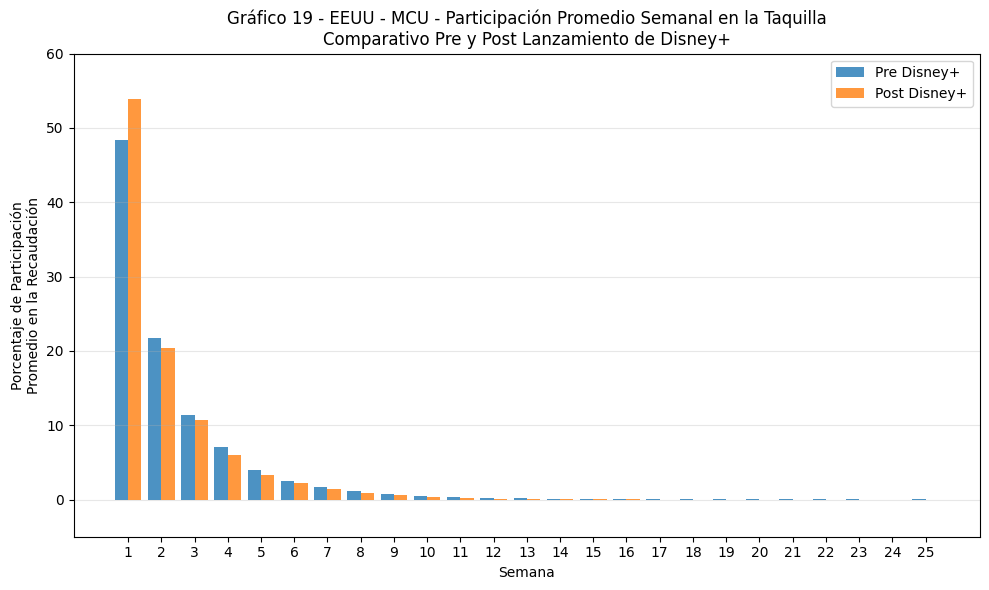

In [80]:
# ===================
# Preparo datos base
# ===================
df = dfFranquiciasRecaudacionDiariaMCU.copy()

dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_map = {day: i for i, day in enumerate(dow_order)}
df["DOW_num"] = df["DOW"].map(dow_map)

df = df.sort_values(["Release", "Day"])
df["Week_number"] = df.groupby("Release").cumcount() // 7 + 1

df_weekly = (
    df.groupby(["Release", "Year", "Week_number"], as_index=False)
      .agg(Weekly_Revenue=("Daily_Inflac", "sum"))
)

df_weekly["Total_Revenue"] = df_weekly.groupby("Release")["Weekly_Revenue"].transform("sum")
df_weekly["Pct_week"] = df_weekly["Weekly_Revenue"] / df_weekly["Total_Revenue"] * 100

# =================================================
# Clasificar en Pre D+ (<=2019) y Post D+ (>=2020)
# =================================================
df_weekly["Periodo"] = np.where(df_weekly["Year"] <= 2019, "Pre D+", "Post D+")

# ===================================
# Promedio de % por semana y período
# ===================================
df_periodo = (
    df_weekly.groupby(["Periodo", "Week_number"], as_index=False)
             .agg(Avg_pct_week=("Pct_week", "mean"))
)

# ====================================
# Reorganizar para barras lado a lado
# ====================================
pivot = df_periodo.pivot(index="Week_number", columns="Periodo", values="Avg_pct_week").fillna(0)

# ==============================
# Gráfico de barras comparativo
# ==============================
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(pivot.index))  # semanas
width = 0.4

ax.bar(x - width/2, pivot["Pre D+"], width=width, label="Pre Disney+", alpha=0.8)
ax.bar(x + width/2, pivot["Post D+"], width=width, label="Post Disney+", alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(pivot.index)
ax.set_xlabel("Semana")
ax.set_ylabel("Porcentaje de Participación\nPromedio en la Recaudación")
ax.set_title("Gráfico 19 - EEUU - MCU - Participación Promedio Semanal en la Taquilla\nComparativo Pre y Post Lanzamiento de Disney+")
ax.legend()
ax.grid(axis="y", alpha=0.3)

ax.set_ylim(-5,60)

plt.tight_layout()
plt.show()


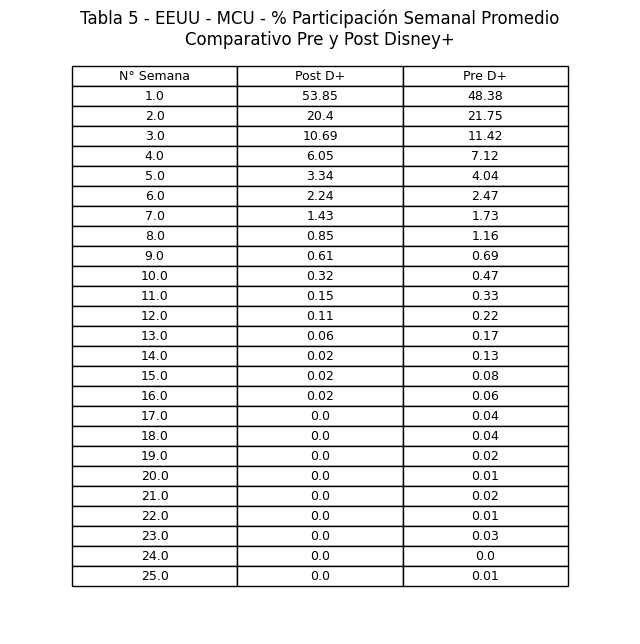

In [81]:
# ==============================
# Se usa la tabla pivot generada
# ==============================

df_tabla = pivot.copy()
df_tabla = df_tabla.round(2)  # redondeo a 2 decimales

fig, ax = plt.subplots(figsize=(8, 0.5 + 0.3 * len(df_tabla)))
ax.axis("off")

table = ax.table(
    cellText=df_tabla.reset_index().values,
    colLabels=["N° Semana"] + list(df_tabla.columns),
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(True)
table.set_fontsize(9)
table.scale(0.8, 1.2)

plt.title("Tabla 5 - EEUU - MCU - % Participación Semanal Promedio\nComparativo Pre y Post Disney+", fontsize=12, y=.95, pad=3)
plt.show()

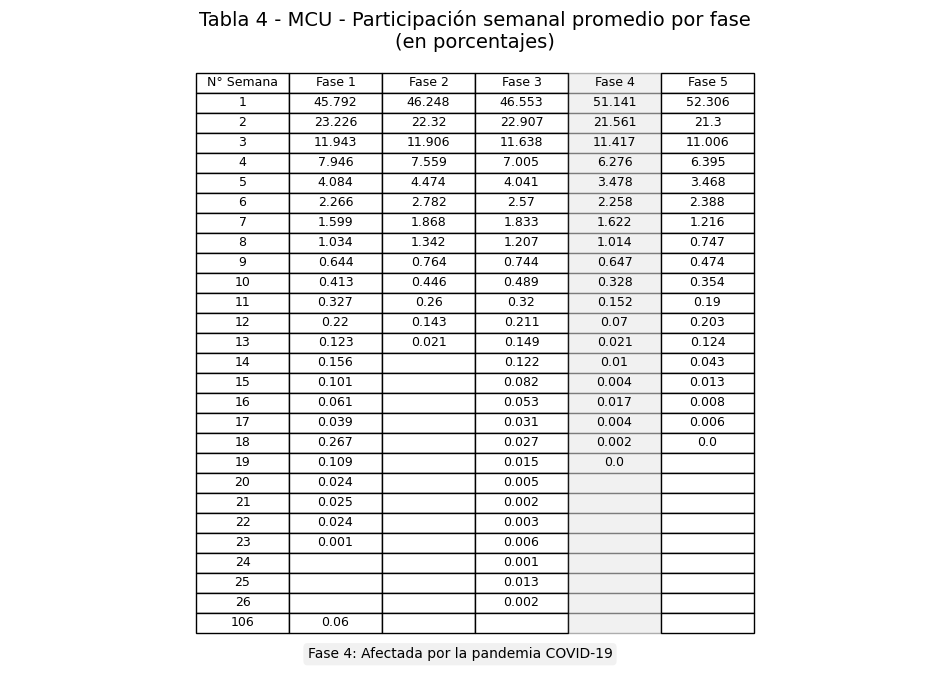

In [82]:
# ======================
# Generar fechas reales
# ======================
df = dfFranquiciasRecaudacionDiariaMCU.copy()
df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Fecha"] = df["Release_Cinema"] + pd.to_timedelta(df["Day"], unit="D")

# ==================================================
# Agrupamiento semanal por película (Monday–Sunday)
# ==================================================
# Definimos semana relativa a cada película
df["Week_number"] = (
    (df["Fecha"] - df["Release_Cinema"]).dt.days // 7 + 1
)

df_weekly = (
    df.groupby(["Phase", "Release", "Week_number"], as_index=False)
      .agg(Revenue_week=("Daily_Inflac", "sum"))
)

# =====================================================
# Calcular % de participación semanal en cada película
# =====================================================
totals = df_weekly.groupby("Release")["Revenue_week"].transform("sum")
df_weekly["Pct_week"] = df_weekly["Revenue_week"] / totals * 100

# ============================
# Promedio por fase y semana
# ============================
df_phase = (
    df_weekly.groupby(["Week_number", "Phase"], as_index=False)
             .agg(Avg_pct_week=("Pct_week", "mean"))
)

# =============================
# Pivotear a tabla comparativa
# =============================
df_tabla_phase = df_phase.pivot(
    index="Week_number", columns="Phase", values="Avg_pct_week"
).sort_index()

# Formato más limpio (opcional: reemplazar NaN por vacío)
df_tabla_phase = df_tabla_phase.round(3)
df_tabla_phase = df_tabla_phase.fillna("")

# ==============
# Mostrar tabla
# ==============
fig, ax = plt.subplots(figsize=(12, 0.5 + 0.3 * len(df_tabla_phase)))
ax.axis("off")

col_labels = ["N° Semana"] + list(df_tabla_phase.columns)
cell_text = df_tabla_phase.reset_index().values

table = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(True)
table.set_fontsize(9)
table.scale(0.6, 1.2)

# ======================
# Sombrear columna Fase 4
# ======================
if "Fase 4" in col_labels:
    col_idx = col_labels.index("Fase 4")  # índice columna
    n_rows = len(cell_text) + 1  # +1 cabecera
    for row_idx in range(n_rows):
        cell = table[(row_idx, col_idx)]
        cell.set_facecolor("lightgray")
        cell.set_alpha(0.3)

# ======================
# Título y nota al pie
# ======================
plt.title("Tabla 4 - MCU - Participación semanal promedio por fase\n(en porcentajes)", fontsize=14, pad=5, y=0.95)

# Estilo tipo "legend"
plt.figtext(0.5, 0.14,
    "Fase 4: Afectada por la pandemia COVID-19",
    ha="center", fontsize=10,
    bbox=dict(facecolor="lightgray", alpha=0.3, edgecolor="none", boxstyle="round,pad=0.3"))

plt.show()

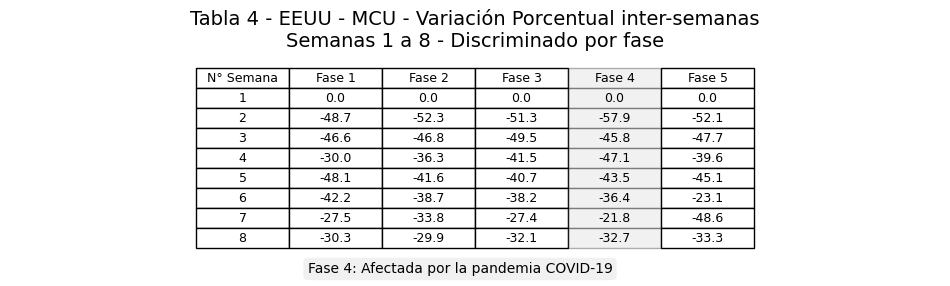

In [83]:
# ================
# Fuente de datos
# ================
df = dfFranquiciasRecaudacionDiariaMCU.copy()

df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Fecha"] = df["Release_Cinema"] + pd.to_timedelta(df["Day"], unit="D")

# Semana relativa por película
df["Week_number"] = ((df["Fecha"] - df["Release_Cinema"]).dt.days // 7 + 1)

# =============================
# Recaudación semanal por fase
# =============================
df_week_phase = (
    df.groupby(["Phase", "Week_number"], as_index=False)
      .agg(Revenue_week=("Daily_Inflac", "sum"))
)

# ============================================
# Cálculo variaciones intersemanales por fase
# ============================================
df_week_phase = df_week_phase.sort_values(["Phase", "Week_number"])

df_week_phase["Pct_var"] = (
    df_week_phase.groupby("Phase")["Revenue_week"]
    .pct_change() * 100
).fillna(0)

# ==========================
# Filtro solo semanas 1 a 8
# ==========================
df_week_phase = df_week_phase[df_week_phase["Week_number"] <= 8]

# ================
# Pivoteo a tabla
# ================
df_tabla_var = df_week_phase.pivot(
    index="Week_number", columns="Phase", values="Pct_var"
).round(1)

# Reemplazar NaN por vacío
df_tabla_var = df_tabla_var.fillna("")

# ================================
# Convierto número de semana a str (sin decimales)
# ================================
df_tabla_var = df_tabla_var.reset_index()
df_tabla_var["Week_number"] = df_tabla_var["Week_number"].astype(int).astype(str)

# ================
# Genero la tabla
# ================
fig, ax = plt.subplots(figsize=(12, 0.5 + 0.3 * len(df_tabla_var)))
ax.axis("off")

col_labels = ["N° Semana"] + list(df_tabla_var.columns[1:])
cell_text = df_tabla_var.values.tolist()  # <- convertir a lista conserva tipos

table = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    cellLoc="center",
    loc="center"
)

table.auto_set_font_size(True)
table.set_fontsize(9)
table.scale(0.6, 1.2)

# ======================
# Sombrear columna Fase 4
# ======================
if "Fase 4" in col_labels:
    col_idx = col_labels.index("Fase 4")  # columna correspondiente
    n_rows = len(cell_text) + 1  # +1 por la fila de cabecera
    for row_idx in range(n_rows):
        cell = table[(row_idx, col_idx)]
        cell.set_facecolor("lightgray")
        cell.set_alpha(0.3)

# ======================
# Título y nota al pie
# ======================
plt.title("Tabla 4 - EEUU - MCU - Variación Porcentual inter-semanas\nSemanas 1 a 8 - Discriminado por fase", fontsize=14, pad=8, y=0.95)

plt.figtext(
    0.5, 0.1,
    "Fase 4: Afectada por la pandemia COVID-19",
    ha="center", fontsize=10,
    bbox=dict(facecolor="lightgray", alpha=0.3, edgecolor="none", boxstyle="round,pad=0.3")
)

plt.show()


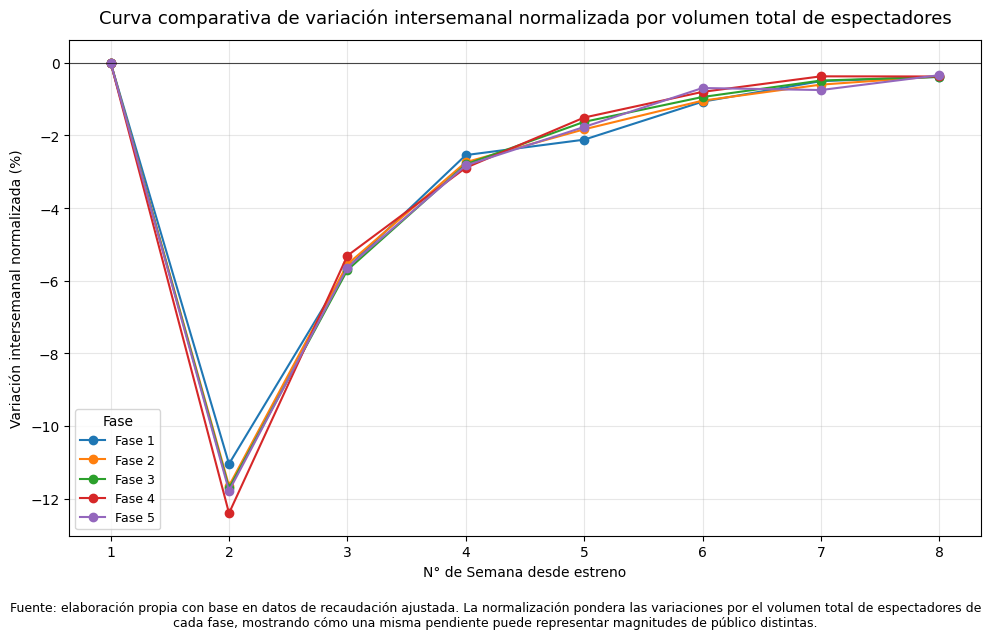

In [84]:
# ==========================================================
# BASE DE DATOS
# ==========================================================
df = dfFranquiciasRecaudacionDiariaMCU.copy()

df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Fecha"] = df["Release_Cinema"] + pd.to_timedelta(df["Day"], unit="D")

# Semana relativa por película
df["Week_number"] = ((df["Fecha"] - df["Release_Cinema"]).dt.days // 7 + 1)

# ==========================================================
# AGREGADO SEMANAL POR FASE
# ==========================================================
df_week_phase = (
    df.groupby(["Phase", "Week_number"], as_index=False)
      .agg(Revenue_week=("Daily_Inflac", "sum"))
)

# ==========================================================
# CÁLCULO DE VARIACIÓN INTERSEMANAL
# ==========================================================
df_week_phase = df_week_phase.sort_values(["Phase", "Week_number"])
df_week_phase["Pct_var"] = (
    df_week_phase.groupby("Phase")["Revenue_week"]
    .pct_change() * 100
).fillna(0)

# ==========================================================
# NORMALIZACIÓN POR VOLUMEN TOTAL DE ESPECTADORES POR FASE
# ==========================================================
# La idea es ponderar cada variación por la magnitud total de público en esa fase
df_total = (
    df_week_phase.groupby("Phase")["Revenue_week"]
    .sum()
    .rename("Total_revenue_phase")
    .reset_index()
)

df_norm = pd.merge(df_week_phase, df_total, on="Phase", how="left")
df_norm["Pct_var_norm"] = df_norm["Pct_var"] * (df_norm["Revenue_week"] / df_norm["Total_revenue_phase"])

# ==========================================================
# FILTRAR SEMANAS RELEVANTES (1 A 8)
# ==========================================================
df_norm = df_norm[df_norm["Week_number"] <= 8]

# ==========================================================
# GRAFICAR CURVA COMPARATIVA NORMALIZADA
# ==========================================================
plt.figure(figsize=(10, 6))

for phase, dfp in df_norm.groupby("Phase"):
    plt.plot(
        dfp["Week_number"],
        dfp["Pct_var_norm"],
        marker="o",
        label=phase
    )

plt.title("Curva comparativa de variación intersemanal normalizada por volumen total de espectadores", fontsize=13, pad=12)
plt.xlabel("N° de Semana desde estreno")
plt.ylabel("Variación intersemanal normalizada (%)")
plt.grid(alpha=0.3)
plt.legend(title="Fase", fontsize=9)
plt.axhline(0, color="black", lw=0.8, alpha=0.7)

# ==========================================================
# NOTA AL PIE EXPLICATIVA
# ==========================================================
plt.figtext(
    0.5, -0.05,
    "Fuente: elaboración propia con base en datos de recaudación ajustada. "
    "La normalización pondera las variaciones por el volumen total de espectadores de cada fase, "
    "mostrando cómo una misma pendiente puede representar magnitudes de público distintas.",
    ha="center", fontsize=9, wrap=True
)

plt.tight_layout()
plt.show()


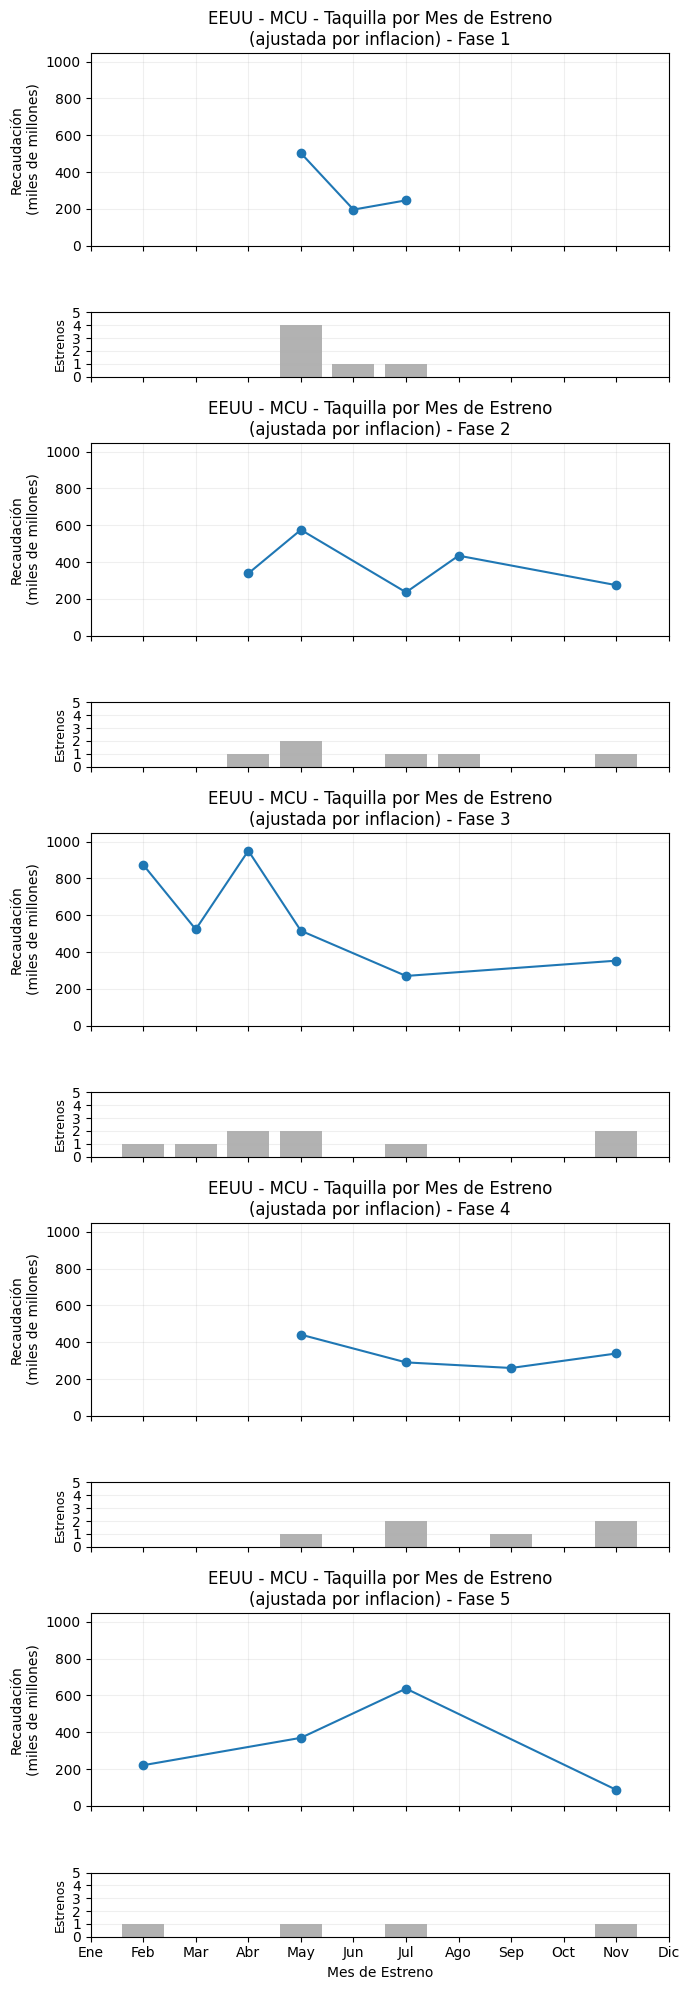

In [85]:
# =======================
# Datos base
# =======================
df = dfFranquiciasRecaudacionDiariaMCU.copy()
df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Mes"] = df["Release_Cinema"].dt.month

# =======================
# Recaudación total por película
# =======================
df_total = df.groupby(["Phase", "Release", "Mes"], as_index=False).agg(
    Total_Revenue=("Daily_Inflac", "sum")
)

# =======================
# Promedio por mes y fase
# =======================
df_mes = df_total.groupby(["Phase", "Mes"], as_index=False).agg(
    Avg_Revenue=("Total_Revenue", "mean"),
    Count=("Release", "count")
)

# Escalar recaudación a miles de millones
df_mes["Avg_Revenue_BM"] = df_mes["Avg_Revenue"] / 1_000_000

# =======================
# Gráfico en subplots
# =======================
phases = sorted(df_mes["Phase"].unique())
n_phases = len(phases)

fig, axes = plt.subplots(
    nrows=n_phases*2, ncols=1,
    figsize=(7, 4*n_phases),
    sharex=True,
    gridspec_kw={"height_ratios": [3,1]*n_phases}
)

# Determinar límites Y globales para todas las fases
y_max_line = df_mes["Avg_Revenue_BM"].max() * 1.1
y_max_bar = df_mes["Count"].max() + 1

if n_phases == 1:
    axes = [axes]

for i, phase in enumerate(phases):
    ax_line = axes[i*2]
    ax_bar = axes[i*2+1]

    data_phase = df_mes[df_mes["Phase"] == phase]

    # --- Gráfico de línea ---
    ax_line.plot(
        data_phase["Mes"],
        data_phase["Avg_Revenue_BM"],
        marker="o",
        color="tab:blue"
    )
    ax_line.set_ylabel("Recaudación\n(miles de millones)")
    ax_line.set_ylim(0, y_max_line)
    ax_line.grid(alpha=0.2)
    ax_line.set_title(f"EEUU - MCU - Taquilla por Mes de Estreno\n(ajustada por inflacion) - {phase}")

    # --- Gráfico de barras ---
    ax_bar.bar(
        data_phase["Mes"],
        data_phase["Count"],
        color="gray",
        alpha=0.6
    )
    ax_bar.set_ylabel("Estrenos", fontsize=9)
    ax_bar.set_ylim(0, y_max_bar)
    ax_bar.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax_bar.grid(axis="y", alpha=0.2)


# Eje X global (meses)
axes[-1].set_xticks(range(1,13))
axes[-1].set_xticklabels(
    ["Ene","Feb","Mar","Abr","May","Jun",
     "Jul","Ago","Sep","Oct","Nov","Dic"],
    rotation=0
)
axes[-1].set_xlabel("Mes de Estreno")

plt.tight_layout()
plt.show()


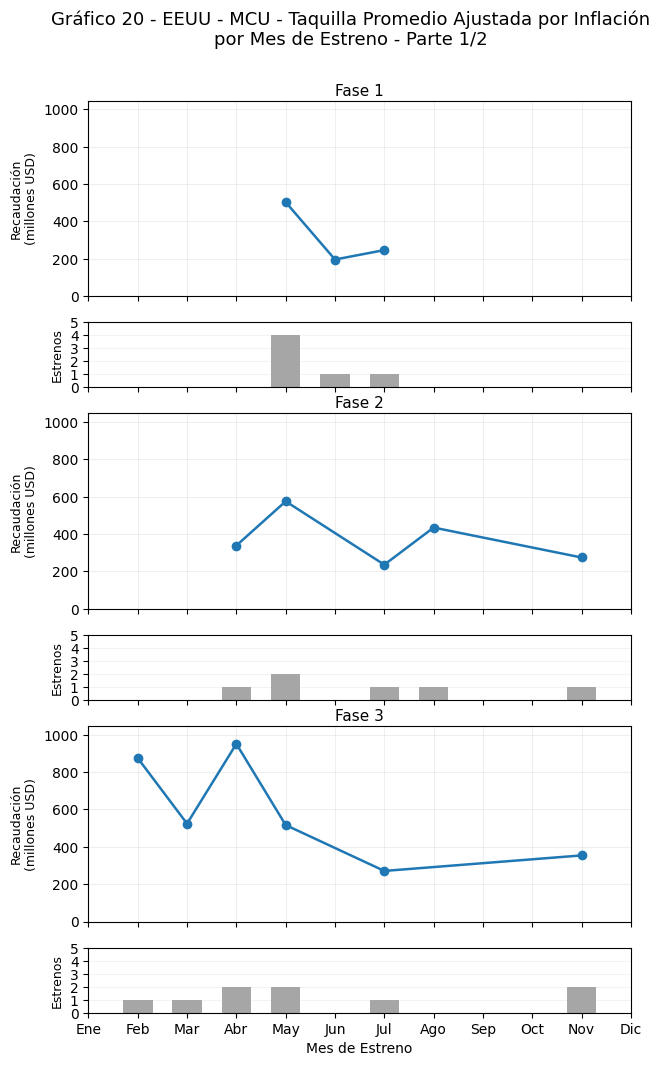

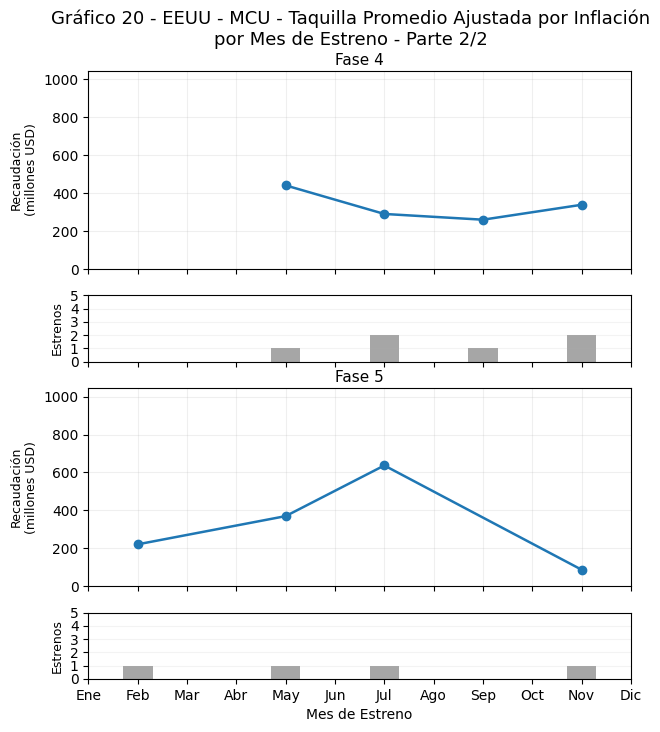

In [86]:
# =======================
# Datos base
# =======================
df = dfFranquiciasRecaudacionDiariaMCU.copy()
df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Mes"] = df["Release_Cinema"].dt.month

# =======================
# Recaudación total por película
# =======================
df_total = df.groupby(["Phase", "Release", "Mes"], as_index=False).agg(
    Total_Revenue=("Daily_Inflac", "sum")
)

# =======================
# Promedio por mes y fase
# =======================
df_mes = df_total.groupby(["Phase", "Mes"], as_index=False).agg(
    Avg_Revenue=("Total_Revenue", "mean"),
    Count=("Release", "count")
)

# Escalar recaudación a millones
df_mes["Avg_Revenue_BM"] = df_mes["Avg_Revenue"] / 1_000_000

# =======================
# Parámetros globales
# =======================
y_max_line = df_mes["Avg_Revenue_BM"].max() * 1.1
y_max_bar = df_mes["Count"].max() + 1
meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

# =======================
# Función para graficar grupo de fases
# =======================
def plot_phases_group(phases, titulo_general, parte):
    df_sub = df_mes[df_mes["Phase"].isin(phases)]
    n_phases = len(phases)

    fig, axes = plt.subplots(
        nrows=n_phases * 2, ncols=1,
        figsize=(7, 3.8 * n_phases),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1] * n_phases}
    )

    if isinstance(axes, plt.Axes):
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, phase in enumerate(phases):
        ax_line = axes[i * 2]
        ax_bar = axes[i * 2 + 1]

        data_phase = df_sub[df_sub["Phase"] == phase].sort_values("Mes")

        # --- Línea: recaudación promedio ---
        ax_line.plot(
            data_phase["Mes"],
            data_phase["Avg_Revenue_BM"],
            marker="o",
            color="tab:blue",
            linewidth=1.8
        )
        ax_line.set_ylabel("Recaudación\n(millones USD)", fontsize=9)
        ax_line.set_ylim(0, y_max_line)
        ax_line.grid(alpha=0.2)
        ax_line.set_title(f"{phase}", fontsize=11, pad=4)

        # --- Barras: cantidad de estrenos ---
        ax_bar.bar(
            data_phase["Mes"],
            data_phase["Count"],
            color="gray",
            alpha=0.7,
            width=0.6
        )
        ax_bar.set_ylabel("Estrenos", fontsize=9)
        ax_bar.set_ylim(0, y_max_bar)
        ax_bar.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax_bar.grid(axis="y", alpha=0.15)

    # Eje X global
    axes[-1].set_xticks(range(1, 13))
    axes[-1].set_xticklabels(meses, rotation=0)
    axes[-1].set_xlabel("Mes de Estreno", fontsize=10)

    # =======================
    # Títulos generales
    # =======================
    fig.suptitle(
        f"Gráfico 20 - EEUU - MCU - Taquilla Promedio Ajustada por Inflación\npor Mes de Estreno - Parte {parte}/2",
        fontsize=13, y=0.96
    )
    #fig.text(0.5, 0.96, f"Fases incluidas: {', '.join(phases)}", ha="center", fontsize=11, color="dimgray")

    fig.subplots_adjust(hspace=0.2, top=0.88, bottom=0.08)
    plt.show()

# =======================
# Ejecutar ambas figuras
# =======================
plot_phases_group(["Fase 1", "Fase 2", "Fase 3"],
                  "EEUU - MCU - Taquilla Promedio Ajustada por Inflación por Mes de Estreno", parte=1)

plot_phases_group(["Fase 4", "Fase 5"],
                  "EEUU - MCU - Taquilla Promedio Ajustada por Inflación por Mes de Estreno", parte=2)


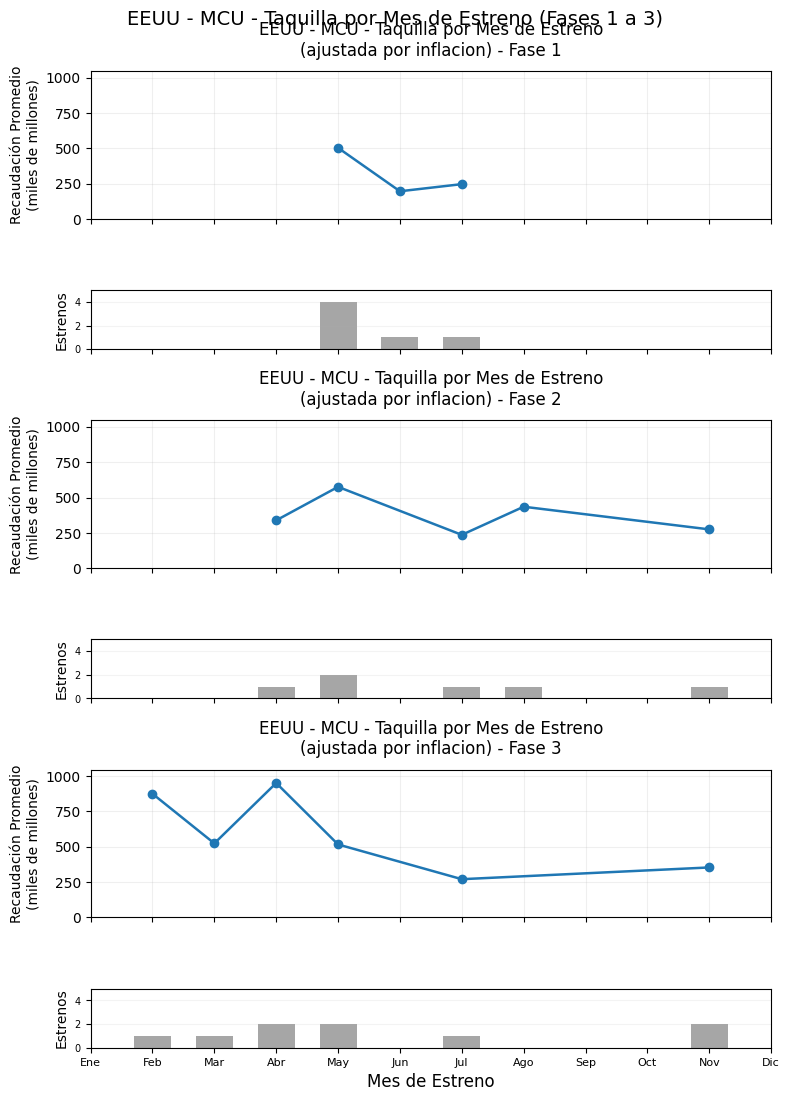

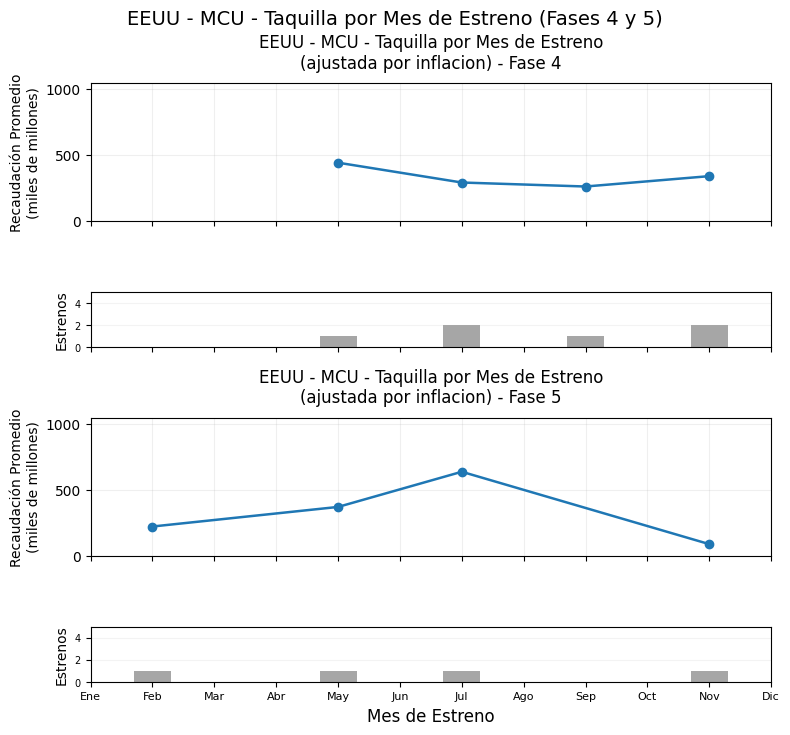

In [87]:
# =======================
# Datos base (tal como los diste)
# =======================
df = dfFranquiciasRecaudacionDiariaMCU.copy()
df["Release_Cinema"] = pd.to_datetime(df["Release_Cinema"])
df["Mes"] = df["Release_Cinema"].dt.month

# =======================
# Recaudación total por película
# =======================
df_total = df.groupby(["Phase", "Release", "Mes"], as_index=False).agg(
    Total_Revenue=("Daily_Inflac", "sum")
)

# =======================
# Promedio por mes y fase
# =======================
df_mes = df_total.groupby(["Phase", "Mes"], as_index=False).agg(
    Avg_Revenue=("Total_Revenue", "mean"),
    Count=("Release", "count")
)

# Escalar recaudación a miles de millones
df_mes["Avg_Revenue_BM"] = df_mes["Avg_Revenue"] / 1_000_000

# =======================
# Límites globales (para consistencia entre figuras)
# =======================
y_max_line = df_mes["Avg_Revenue_BM"].max() * 1.1
y_max_bar  = int(df_mes["Count"].max()) + 1

# nombres de meses
meses_nombre = ["Ene","Feb","Mar","Abr","May","Jun",
                "Jul","Ago","Sep","Oct","Nov","Dic"]


# =======================
# Función que grafica un grupo de fases en una figura separada
# =======================
def plot_phases_group(phases, figure_title):
    phases_present = [p for p in phases if p in df_mes["Phase"].unique()]
    if len(phases_present) == 0:
        print(f"No hay datos para las fases: {phases}")
        return

    n_phases = len(phases_present)

    # 🔹 Barras 20% más altas respecto a las líneas
    fig, axes = plt.subplots(
        nrows=n_phases * 2, ncols=1,
        figsize=(8, 4.2 * n_phases),
        sharex=True,
        gridspec_kw={"height_ratios": [3, 1.2] * n_phases}
    )

    axes = np.array(axes).flatten()

    for i, phase in enumerate(phases_present):
        ax_line = axes[i*2]
        ax_bar  = axes[i*2 + 1]

        data_phase = df_mes[df_mes["Phase"] == phase].sort_values("Mes")

        # --- Línea: recaudación promedio ---
        ax_line.plot(
            data_phase["Mes"],
            data_phase["Avg_Revenue_BM"],
            marker="o",
            color="tab:blue",
            linewidth=1.8
        )
        ax_line.set_ylabel("Recaudación Promedio\n(miles de millones)", fontsize=10)
        ax_line.set_ylim(0, y_max_line)
        ax_line.grid(alpha=0.2)
        ax_line.set_title(
            f"EEUU - MCU - Taquilla por Mes de Estreno\n(ajustada por inflacion) - {phase}",
            fontsize=12, pad=11
        )
        ax_line.tick_params(axis='both', labelsize=10)

        # --- Barras: cantidad de estrenos ---
        ax_bar.bar(
            data_phase["Mes"],
            data_phase["Count"],
            color="gray",
            alpha=0.7,
            width=0.6
        )
        ax_bar.set_ylabel("Estrenos", fontsize=10)
        ax_bar.set_ylim(0, y_max_bar)
        ax_bar.set_yticks(range(0, y_max_bar,2))
        ax_bar.grid(axis="y", alpha=0.15)
        ax_bar.tick_params(axis='both', labelsize=7)

    # Eje X global (solo último eje)
    axes[-1].set_xticks(range(1,13))
    axes[-1].set_xticklabels(meses_nombre, rotation=0, fontsize=8)
    axes[-1].set_xlabel("Mes de Estreno", fontsize=12)

    # Espaciado general
    fig.suptitle(figure_title, fontsize=14, y=0.9)
    fig.subplots_adjust(hspace=0.38, top=0.98, bottom=0.08)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()


# =======================
# Llamadas: dos figuras separadas
# =======================
plot_phases_group(["Fase 1", "Fase 2", "Fase 3"], "EEUU - MCU - Taquilla por Mes de Estreno (Fases 1 a 3)")
plot_phases_group(["Fase 4", "Fase 5"], "EEUU - MCU - Taquilla por Mes de Estreno (Fases 4 y 5)")

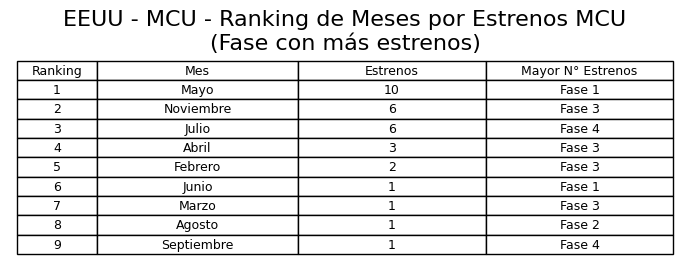

In [88]:
# =========================
# Prepara datos de ranking
# =========================
df_mes_fase = df_mes.groupby(["Mes", "Phase"]).agg(Total_Estrenos=("Count", "sum")).reset_index()
df_ranking = df_mes_fase.groupby("Mes").agg(Total_Estrenos=("Total_Estrenos", "sum")).reset_index()
fase_max = df_mes_fase.loc[df_mes_fase.groupby("Mes")["Total_Estrenos"].idxmax()]
df_ranking["Fase_Max_Estrenos"] = fase_max["Phase"].values

meses_nombre = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
                "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
df_ranking["Mes_Nombre"] = df_ranking["Mes"].apply(lambda x: meses_nombre[x-1])
df_ranking = df_ranking[["Mes_Nombre", "Total_Estrenos", "Fase_Max_Estrenos"]]
df_ranking = df_ranking.sort_values("Total_Estrenos", ascending=False).reset_index(drop=True)

# =========================
# Agregar columna de ranking como dato
# =========================
df_ranking.insert(0, "Ranking", df_ranking.index + 1)

# =========================
# Crea figura y tabla
# =========================
fig, ax = plt.subplots(figsize=(7, 0.5 + 0.25 * len(df_ranking)))
ax.axis("off")

cell_data = df_ranking.values.tolist()
col_labels = ["Ranking", "Mes", "Estrenos", "Mayor N° Estrenos"]

table = ax.table(
    cellText=cell_data,
    colLabels=col_labels,
    cellLoc='center',
    loc='center'
)

# Ajusta tamaño de la fuente y escala
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.3)  # ↑ aumenta ancho global

# Ajustar ancho de cada columna manualmente
for key, cell in table.get_celld().items():
    row, col = key
    if col == 0:   # columna Ranking
        cell.set_width(0.12)
    elif col == 1: # columna Mes
        cell.set_width(0.3)
    else:          # demás columnas
        cell.set_width(0.28)

# Título
plt.title("EEUU - MCU - Ranking de Meses por Estrenos MCU\n(Fase con más estrenos)", fontsize=16, pad=10)
plt.tight_layout()
plt.show()



#### Outliers y resiliencia en el MCU

Qué representa cada punto:
* Cada punto corresponde a una película del MCU.

  * Eje X: Número de semanas en cartel (duración total de la proyección).

  * Eje Y: Proporción de la recaudación obtenida en las primeras 3 semanas respecto al total de la película.

* Referencia visual:

  * Línea gris horizontal: Mediana de la fase para la proporción de recaudación de las primeras 3 semanas.

  * Puntos verdes: Película mas taquillera de la fase.

  * Puntos azules: Resto de las peliculas.

  * Tamaño de los puntos: Referencia volumen de la taquilla obtenida

**Ubicación de los puntos y su significado:**

|Posición||Interpretación|

|Arriba de la mediana||Recaudación más rápida que la mediana de su fase (gran apertura inicial).|

|Abajo de la mediana||Recaudación más lenta que la mediana de su fase (apertura moderada o baja).|

|A la derecha||Mayor duración en cartel (persistencia/resiliencia).|

|A la izquierda||Menor duración en cartel (corto ciclo de proyección).|

* Cuadrantes clave:

  * Arriba izquierda: Picos iniciales fuertes pero corta duración (ej. Doctor Strange 2).

  * Abajo derecha: Recaudación lenta pero prolongada (resilientes, ej. Ant-Man).

  * Arriba derecha: Películas con gran apertura y duración prolongada (éxitos consistentes).

  * Abajo izquierda: Películas con baja apertura y corta duración (menos relevantes).

**Nota acerca del uso de la mediana para las comparaciones:**

Se utiliza la mediana en lugar de la media para evitar que películas con rendimientos extremos distorsionen la referencia, proporcionando así un punto de comparación más representativo del comportamiento típico de cada fase

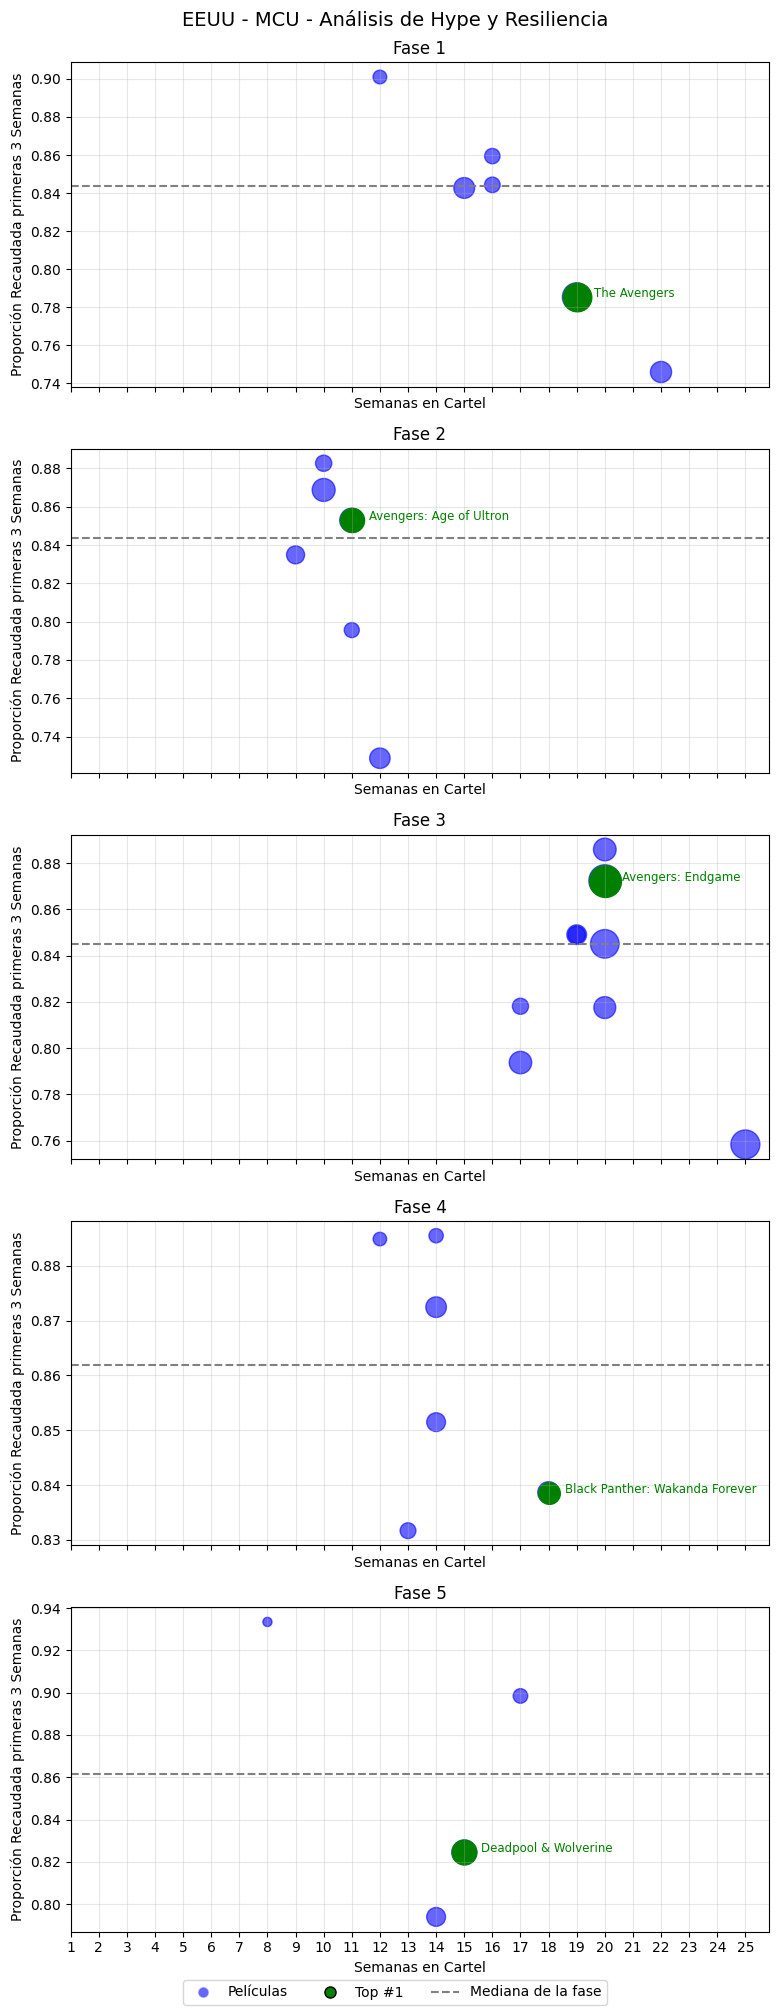

In [89]:
# ==========================
# Datos base
# ==========================
df = dfFranquiciasRecaudacionDiariaMCU.copy()
df["Fecha"] = df["Release_Cinema"] + pd.to_timedelta(df["Day"], unit="D")

# ==========================
# Corrección de Iron Man (reestreno)
# ==========================
mask_ironman = df["Release"] == "Iron Man"
if mask_ironman.any():
    max_day_run = 154  # corrida original
    df.loc[mask_ironman & (df["Day"] > max_day_run), "Day"] = (
        df.loc[mask_ironman & (df["Day"] > max_day_run), "Day"]
        .rank(method="first")
        .astype(int)
        + max_day_run
    )
    df.loc[mask_ironman, "Fecha"] = (
        df.loc[mask_ironman, "Release_Cinema"] +
        pd.to_timedelta(df.loc[mask_ironman, "Day"], unit="D")
    )

# ==========================
# Calcular semana relativa (cerrada domingo)
# ==========================
release_sunday = df["Release_Cinema"] + pd.to_timedelta(
    6 - df["Release_Cinema"].dt.dayofweek, unit="D"
)
df["Week_number"] = ((df["Fecha"] - release_sunday).dt.days // 7 + 1).clip(lower=1)

# ==========================
# Recaudación semanal
# ==========================
df_weekly = (
    df.groupby(["Release", "Phase", "Week_number"], as_index=False)
      .agg(Weekly_Gross=("Daily_Inflac", "sum"))
)

totals = df_weekly.groupby("Release")["Weekly_Gross"].transform("sum")
df_weekly["Pct_week"] = df_weekly["Weekly_Gross"] / totals

# ==========================
# Resumen por película
# ==========================
df_movie_stats = (
    df_weekly.groupby(["Release", "Phase"], as_index=False)
      .agg(
          Total_Gross=("Weekly_Gross", "sum"),
          Weeks=("Week_number", "max")
      )
)

week3 = (
    df_weekly[df_weekly["Week_number"] <= 3]
    .groupby("Release")["Weekly_Gross"].sum()
)

df_movie_stats = df_movie_stats.merge(
    week3.rename("Gross_3weeks"),
    on="Release",
    how="left"
)

df_movie_stats["Share_3weeks"] = (
    df_movie_stats["Gross_3weeks"] / df_movie_stats["Total_Gross"]
)

# ==========================
# Comparación con la mediana de cada fase
# ==========================
df_movie_stats["Median_phase"] = df_movie_stats.groupby("Phase")["Share_3weeks"].transform("median")
df_movie_stats["Diff_vs_median"] = df_movie_stats["Share_3weeks"] - df_movie_stats["Median_phase"]

outliers_hype = df_movie_stats[df_movie_stats["Diff_vs_median"] > 0.05]
resilientes = df_movie_stats[
    (df_movie_stats["Diff_vs_median"] < -0.05) & (df_movie_stats["Weeks"] >= 10)
]

# ==========================
# Graficar por fases (corregido)
# ==========================
phases = sorted(df_movie_stats["Phase"].unique())
n_phases = len(phases)

fig, axes = plt.subplots(n_phases, 1, figsize=(8, 4*n_phases), sharex=True)

if n_phases == 1:
    axes = [axes]

for ax, phase in zip(axes, phases):
    data_phase = df_movie_stats[df_movie_stats["Phase"] == phase].copy()

    # Tamaño de puntos proporcional a recaudación total
    size_scale = 5
    sizes = data_phase["Total_Gross"] / 1e7 * size_scale

    # Calcular semana máxima por película
    max_weeks = df_weekly.groupby("Release")["Week_number"].max().reindex(data_phase["Release"]).values

    # Graficar todos los puntos
    ax.scatter(
        max_weeks,
        data_phase["Share_3weeks"],
        s=sizes,
        alpha=0.6,
        color="blue",
        label="Películas"
    )

    # Mediana de la fase
    median_val = data_phase["Median_phase"].iloc[0]
    ax.axhline(y=median_val, color="gray", linestyle="--", label="Mediana de la Fase")

    # Resaltar película más taquillera de la fase
    top_movie = data_phase.loc[data_phase["Total_Gross"].idxmax()]
    top_max_week = df_weekly[df_weekly["Release"]==top_movie["Release"]]["Week_number"].max()
    top_size = top_movie["Total_Gross"] / 1e7 * size_scale

    ax.scatter(
        top_max_week,
        top_movie["Share_3weeks"],
        color="Green",
        s=top_size,
        label=f'Top #1: {top_movie["Release"]}'
    )

    ax.text(
        top_max_week+0.6,
        top_movie["Share_3weeks"],
        top_movie["Release"],
        fontsize=8.5,
        color="Green"
    )

    ax.set_title(f"{phase}")
    ax.set_ylabel("Proporción Recaudada primeras 3 Semanas")
    ax.set_xlabel("Semanas en Cartel")
    ax.set_xticks(range(1, int(df_weekly["Week_number"].max())+1))
    ax.grid(alpha=0.3)
    #ax.legend(fontsize=9)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Películas', markerfacecolor='blue', markersize=8, alpha=0.6),
    Line2D([0], [0], marker='o', color='w', label='Top #1', markerfacecolor='green', markeredgecolor='black', markersize=8),
    Line2D([0], [0], color='gray', linestyle='--', label='Mediana de la fase')
]

fig.legend(handles=legend_elements, loc="lower center", ncol=4, frameon=True,bbox_to_anchor=(0.5, -0.011))
fig.suptitle("EEUU - MCU - Análisis de Hype y Resiliencia", fontsize=14, y=0.99)



plt.tight_layout()
plt.show()

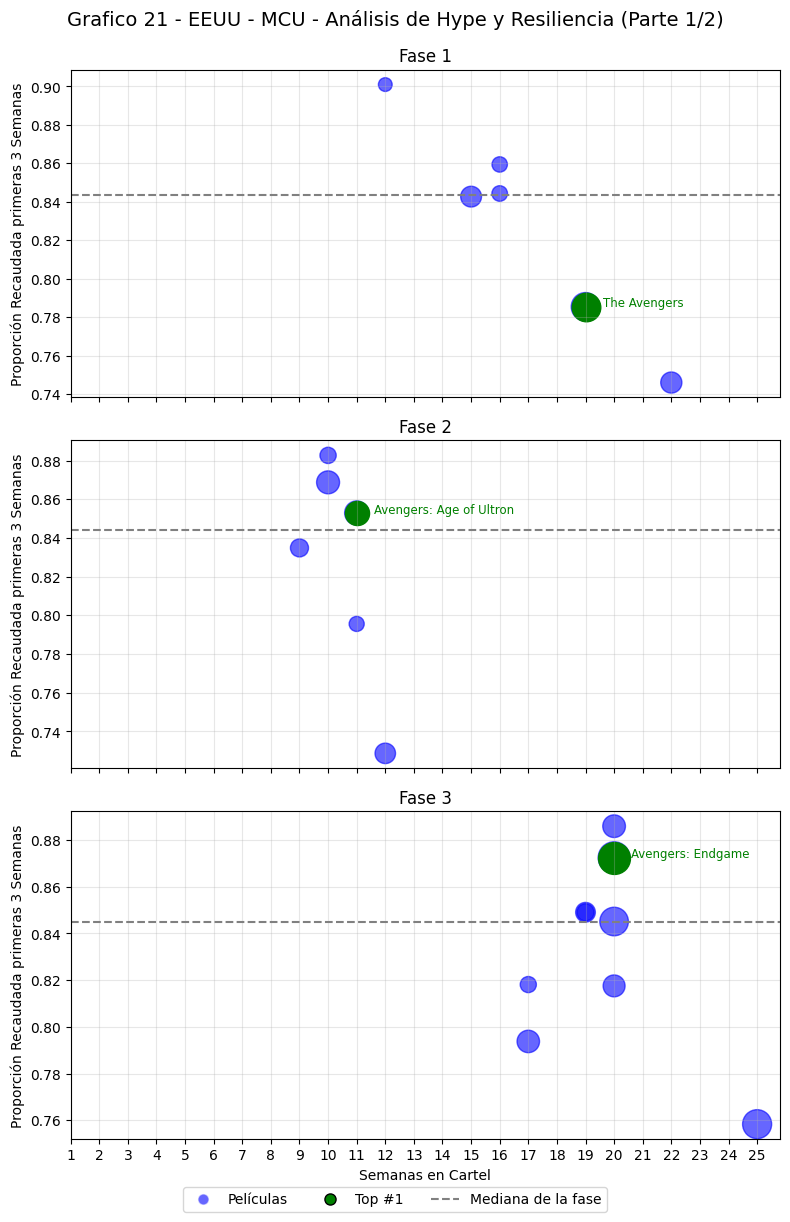

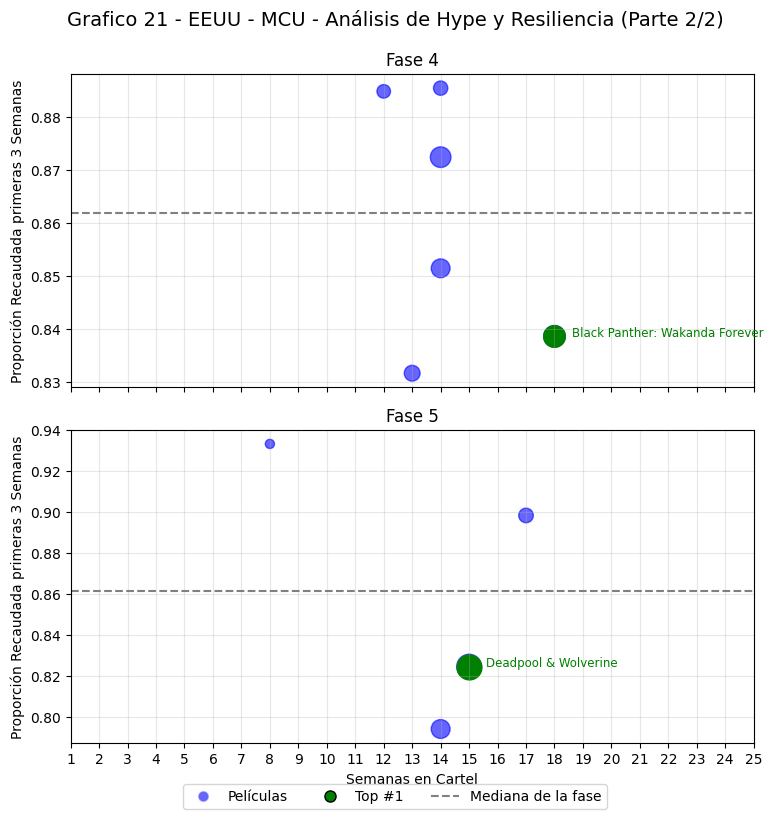

In [90]:
# ==========================
# Función para graficar un grupo de fases
# ==========================
def plot_hype_resilience(phases_subset, title):
    subset = df_movie_stats[df_movie_stats["Phase"].isin(phases_subset)]
    if subset.empty:
        print(f"No hay datos para las fases: {phases_subset}")
        return

    n_phases = len(phases_subset)
    fig, axes = plt.subplots(n_phases, 1, figsize=(8, 4 * n_phases), sharex=True)

    if n_phases == 1:
        axes = [axes]

    for ax, phase in zip(axes, phases_subset):
        data_phase = subset[subset["Phase"] == phase].copy()
        if data_phase.empty:
            continue

        # Tamaño proporcional a la recaudación total
        size_scale = 5
        sizes = data_phase["Total_Gross"] / 1e7 * size_scale

        # Semanas en cartel por película
        max_weeks = df_weekly.groupby("Release")["Week_number"].max().reindex(data_phase["Release"]).values

        # --- Puntos base (todas las películas)
        ax.scatter(
            max_weeks,
            data_phase["Share_3weeks"],
            s=sizes,
            alpha=0.6,
            color="blue",
            label="Películas"
        )

        # --- Mediana de la fase
        median_val = data_phase["Median_phase"].iloc[0]
        ax.axhline(y=median_val, color="gray", linestyle="--", label="Mediana de la fase")

        # --- Película top #1 ---
        top_movie = data_phase.loc[data_phase["Total_Gross"].idxmax()]
        top_max_week = df_weekly[df_weekly["Release"] == top_movie["Release"]]["Week_number"].max()
        top_size = top_movie["Total_Gross"] / 1e7 * size_scale

        ax.scatter(
            top_max_week,
            top_movie["Share_3weeks"],
            color="green",
            s=top_size,
            label=f'Top #1: {top_movie["Release"]}'
        )

        ax.text(
            top_max_week + 0.6,
            top_movie["Share_3weeks"],
            top_movie["Release"],
            fontsize=8.5,
            color="green"
        )

        ax.set_title(phase)
        ax.set_ylabel("Proporción Recaudada primeras 3 Semanas")
        ax.grid(alpha=0.3)

    axes[-1].set_xlabel("Semanas en Cartel")
    axes[-1].set_xticks(range(1, int(df_weekly["Week_number"].max()) + 1))

    # Leyenda común
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Películas', markerfacecolor='blue', markersize=8, alpha=0.6),
        Line2D([0], [0], marker='o', color='w', label='Top #1', markerfacecolor='green', markeredgecolor='black', markersize=8),
        Line2D([0], [0], color='gray', linestyle='--', label='Mediana de la fase')
    ]

    fig.legend(handles=legend_elements, loc="lower center", ncol=4, frameon=True, bbox_to_anchor=(0.5, -0.018))
    fig.suptitle(title, fontsize=14, y=0.99)
    plt.tight_layout()
    plt.show()


# ==========================
# Generar ambas figuras
# ==========================
plot_hype_resilience(["Fase 1", "Fase 2", "Fase 3"], "Grafico 21 - EEUU - MCU - Análisis de Hype y Resiliencia (Parte 1/2)")
plot_hype_resilience(["Fase 4", "Fase 5"], "Grafico 21 - EEUU - MCU - Análisis de Hype y Resiliencia (Parte 2/2)")
